In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import de data

In [43]:
data = pd.read_csv('dataset_test_2.csv', sep=';',encoding='ISO-8859-1')

In [44]:
print(data.head())
print(data.shape)

  ref_area.label                                source.label  \
0    Afghanistan  HIES - Households Living Conditions Survey   
1    Afghanistan  HIES - Households Living Conditions Survey   
2    Afghanistan  HIES - Households Living Conditions Survey   
3    Afghanistan  HIES - Households Living Conditions Survey   
4    Afghanistan  HIES - Households Living Conditions Survey   

                                     indicator.label sex.label  \
0  Children in employment by sex, age and school ...     Total   
1  Children in employment by sex, age and school ...     Total   
2  Children in employment by sex, age and school ...     Total   
3  Children in employment by sex, age and school ...     Total   
4  Children in employment by sex, age and school ...     Total   

                    classif1.label  \
0  Age (Child labour bands): '5-17   
1  Age (Child labour bands): '5-17   
2  Age (Child labour bands): '5-17   
3  Age (Child labour bands): '5-17   
4  Age (Child labour bands):

In [45]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ref_area.label        8745 non-null   object 
 1   source.label          8745 non-null   object 
 2   indicator.label       8745 non-null   object 
 3   sex.label             8745 non-null   object 
 4   classif1.label        8745 non-null   object 
 5   classif2.label        8745 non-null   object 
 6   time                  8745 non-null   int64  
 7   obs_value             8153 non-null   float64
 8   obs_status.label      1894 non-null   object 
 9   note_indicator.label  749 non-null    object 
 10  note_source.label     7665 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 751.7+ KB
None


# Nettoyage de donnees

In [46]:
df = data[['ref_area.label', 'sex.label', 'classif1.label','classif2.label', 'time', 'obs_value','obs_status.label']]

df.columns = ['Country', 'Sex', 'Age_group','Education_Status', 'Year', 'Value','Fiability_data']

# Supprime les lignes avec valeur manquante
df_clean = df.dropna(subset=['Value']).copy()

# Transforme l'année en format datetime
df_clean['Year'] = pd.to_datetime(df_clean['Year'], format='%Y')

# Supprime les doublons si existants
df_clean = df_clean.drop_duplicates()


df_clean['Age_group'] = df_clean['Age_group'].str.replace(
    "Age \(Child labour bands\): '?",
    "",
    regex=True
)

df_clean['Education_Status'] = df_clean['Education_Status'].str.replace(
    "Educational attendance: ",
    "",
    regex=True
)


# Aperçu
print("\nDonnées nettoyées :")
print(df_clean.head())

# Sauvegarde le résultat
df_clean.to_csv('cleaned_data.csv', index=False)

print("\nFichier nettoyé enregistré sous 'cleaned_child_labour_data.csv'.")


Données nettoyées :
       Country    Sex Age_group          Education_Status       Year  \
0  Afghanistan  Total      5-17                     Total 2014-01-01   
1  Afghanistan  Total      5-17                 Attending 2014-01-01   
2  Afghanistan  Total      5-17             Not attending 2014-01-01   
3  Afghanistan  Total      5-17  Not elsewhere classified 2014-01-01   
4  Afghanistan  Total      5-11                     Total 2014-01-01   

      Value Fiability_data  
0  3261.161            NaN  
1  1556.560            NaN  
2   185.107            NaN  
3  1519.494            NaN  
4  1254.495            NaN  

Fichier nettoyé enregistré sous 'cleaned_child_labour_data.csv'.


<>:16: SyntaxWarning: invalid escape sequence '\('
<>:16: SyntaxWarning: invalid escape sequence '\('
/tmp/ipython-input-950233263.py:16: SyntaxWarning: invalid escape sequence '\('
  "Age \(Child labour bands\): '?",


In [47]:
child=pd.read_csv(r'cleaned_data.csv')
print(child.head())
print(child.shape)

       Country    Sex Age_group          Education_Status        Year  \
0  Afghanistan  Total      5-17                     Total  2014-01-01   
1  Afghanistan  Total      5-17                 Attending  2014-01-01   
2  Afghanistan  Total      5-17             Not attending  2014-01-01   
3  Afghanistan  Total      5-17  Not elsewhere classified  2014-01-01   
4  Afghanistan  Total      5-11                     Total  2014-01-01   

      Value Fiability_data  
0  3261.161            NaN  
1  1556.560            NaN  
2   185.107            NaN  
3  1519.494            NaN  
4  1254.495            NaN  
(8153, 7)


In [48]:
# Filtre sur Age_group, Sex et Education_Status = "Total"
df_filtered = child[
    (child['Age_group'] == '5-17') &
    (child['Sex'] == 'Total') &
    (child['Education_Status'] == 'Total')
]

# Trie par Value décroissant et affiche les 10 premiers résultats
top_n = 20
top = df_filtered[['Country', 'Year', 'Age_group', 'Sex', 'Education_Status', 'Value']].sort_values(by='Value', ascending=False).head(top_n)

print("Top valeurs pour Age_group=Total, Sex=Total, Education_Status=Total :")
print(top)


Top valeurs pour Age_group=Total, Sex=Total, Education_Status=Total :
                                 Country        Year Age_group    Sex  \
6729                               World  2020-01-01      5-17  Total   
6765                              Africa  2020-01-01      5-17  Total   
6837                  Sub-Saharan Africa  2020-01-01      5-17  Total   
7269                Asia and the Pacific  2020-01-01      5-17  Total   
6909                      Eastern Africa  2020-01-01      5-17  Total   
6981                      Western Africa  2020-01-01      5-17  Total   
7449                       Southern Asia  2020-01-01      5-17  Total   
7341  South-Eastern Asia and the Pacific  2020-01-01      5-17  Total   
7377                  South-Eastern Asia  2020-01-01      5-17  Total   
2440                            Ethiopia  2015-01-01      5-17  Total   
6873                      Central Africa  2020-01-01      5-17  Total   
7017                            Americas  2020-01-01  

In [49]:


# Charge le fichier d'origine
df = pd.read_csv("cleaned_data.csv")

# Multiplie la colonne 'value' par 1000 et crée une nouvelle colonne
df['Value'] = df['Value'] * 1000

# Sauvegarde le DataFrame dans un nouveau fichier CSV
df.to_csv("cleaned_data_multiplied.csv", index=False)

print("Nouveau fichier 'cleaned_data_multiplied.csv' créé avec la colonne 'value_multiplied'.")


Nouveau fichier 'cleaned_data_multiplied.csv' créé avec la colonne 'value_multiplied'.


Nombre d'entrées après filtrage : 128
Années disponibles : ['2014-01-01' '2020-01-01' '2017-01-01' '2018-01-01' '2022-01-01'
 '2010-01-01' '2019-01-01' '2016-01-01' '2015-01-01' '2013-01-01'
 '2012-01-01' '2023-01-01' '2021-01-01' '2024-01-01' '2011-01-01']


/tmp/ipython-input-1895760942.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = pd.to_datetime(df_filtered['Year']).dt.year


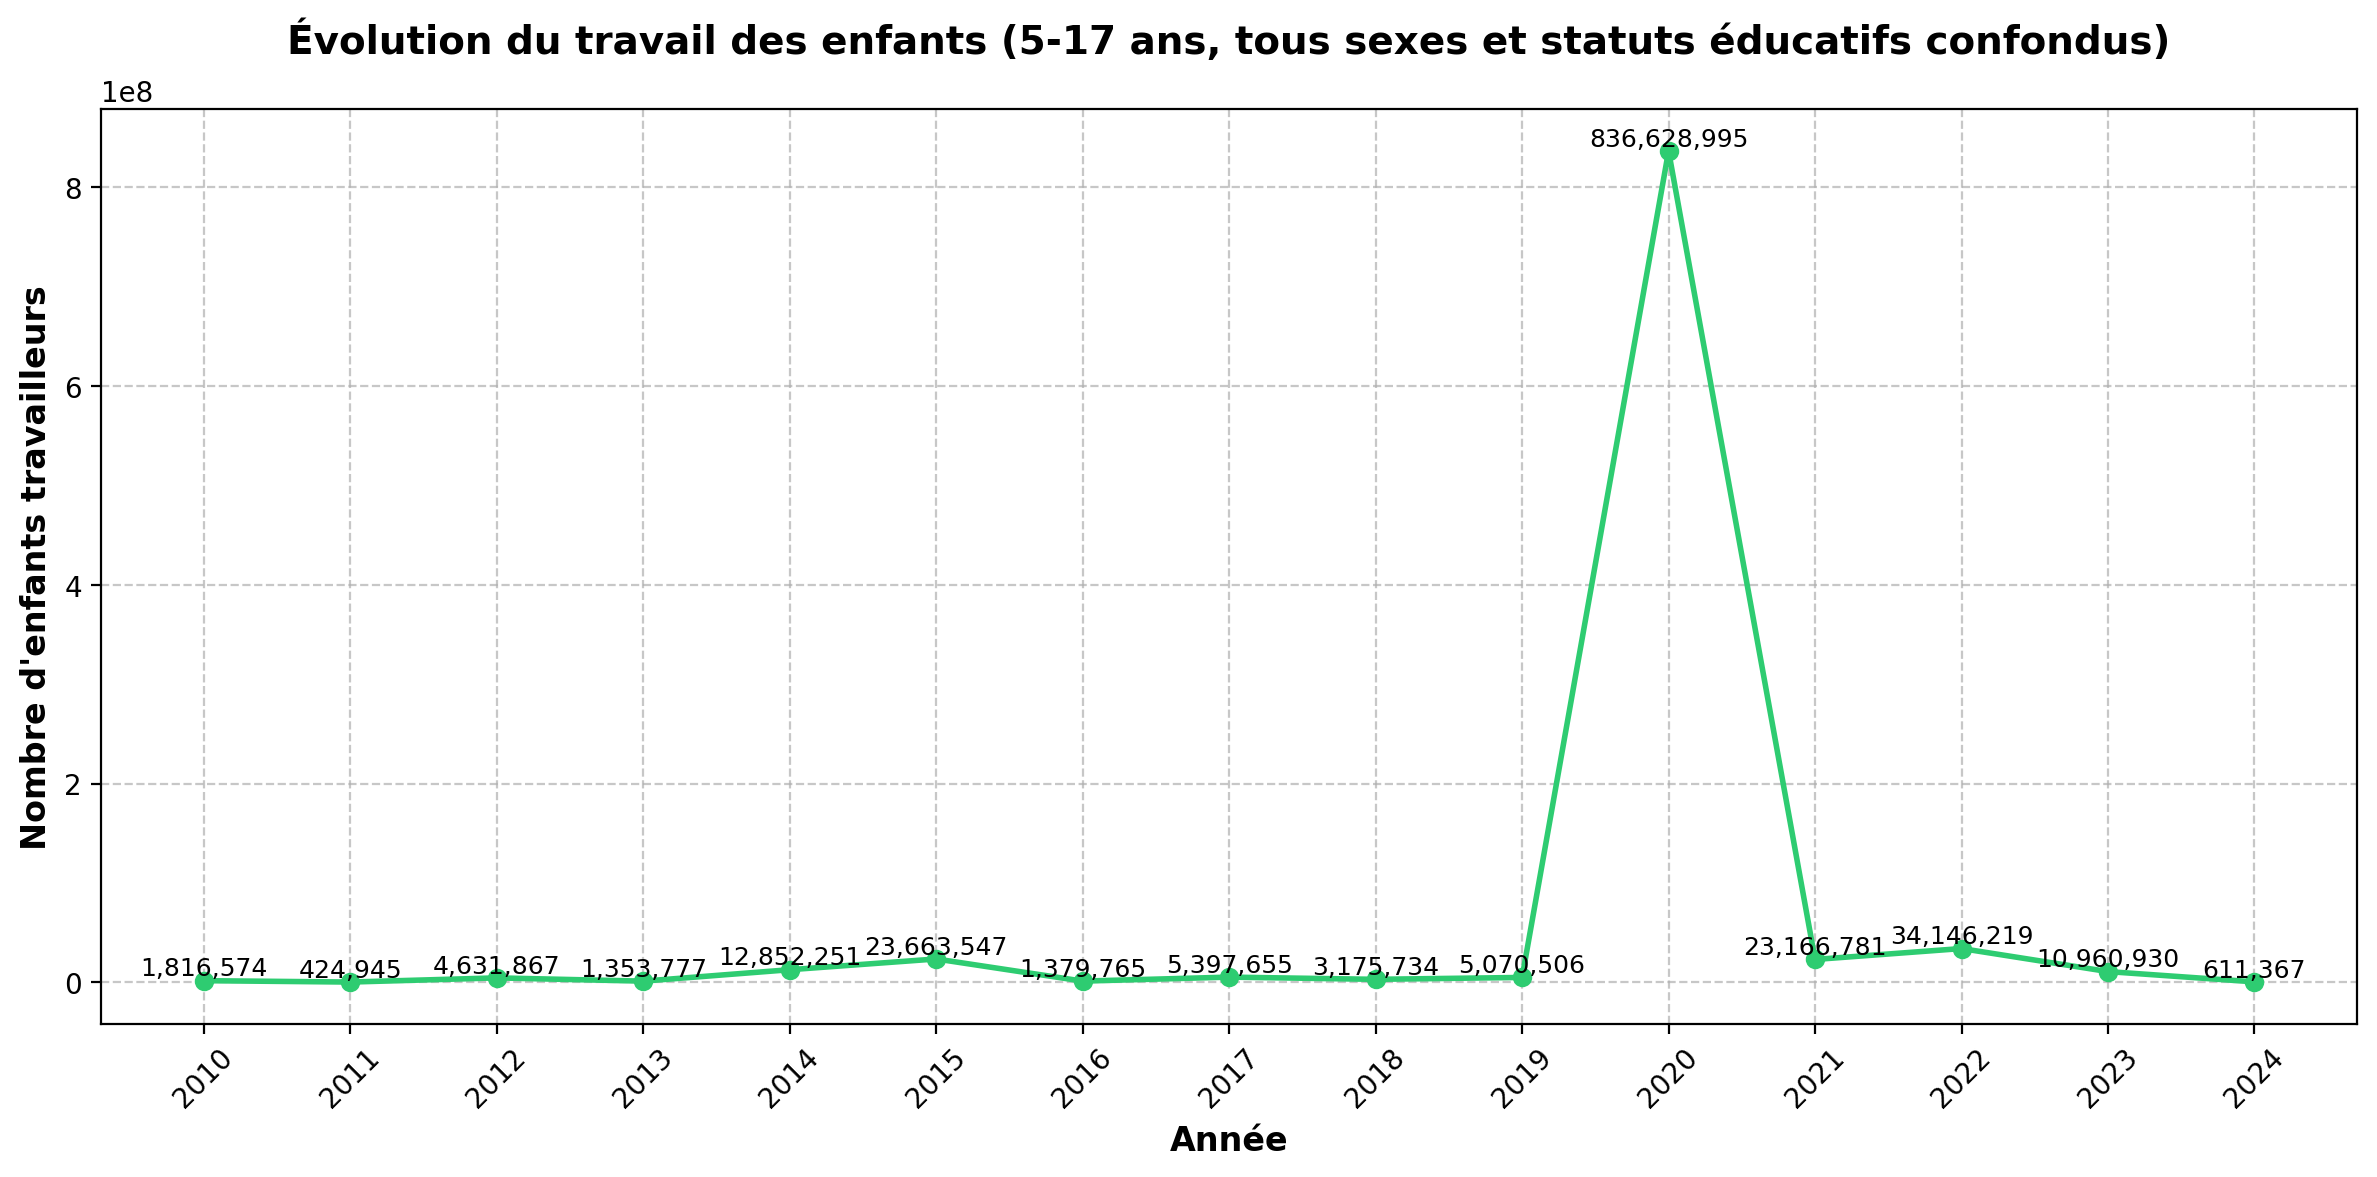

In [50]:

# Charge le fichier nettoyé
df = pd.read_csv("cleaned_data_multiplied.csv")

# Applique les filtres
condition = (
    (df['Age_group'] == '5-17') &
    (df['Sex'] == 'Total') &
    (df['Education_Status'] == 'Total')
)
df_filtered = df[condition]

# Vérification des données filtrées
print("Nombre d'entrées après filtrage :", len(df_filtered))
print("Années disponibles :", df_filtered['Year'].unique())

# Conversion de l'année et agrégation
df_filtered['Year'] = pd.to_datetime(df_filtered['Year']).dt.year
df_grouped = df_filtered.groupby('Year', as_index=False)['Value'].sum()

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Year'],
         df_grouped['Value'],
         marker='o',
         linestyle='-',
         color='#2ecc71',
         linewidth=2)

plt.title("Évolution du travail des enfants (5-17 ans, tous sexes et statuts éducatifs confondus)",
          fontsize=14,
          pad=20)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'enfants travailleurs", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_grouped['Year'], rotation=45)
plt.tight_layout()

# Ajoute les valeurs sur les points
for x, y in zip(df_grouped['Year'], df_grouped['Value']):
    plt.text(x, y, f'{int(y):,}',
             ha='center',
             va='bottom',
             fontsize=9)

plt.show()


In [51]:


# Liste des régions à exclure
regions = [
    'World', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Africa', 'Eastern Africa',
    'Southern Africa', 'Western Africa', 'Americas', 'Latin America and the Caribbean', 'Caribbean',
    'Central America', 'South America', 'Northern America', 'Arab States', 'Asia and the Pacific',
    'Eastern Asia', 'South-Eastern Asia and the Pacific', 'South-Eastern Asia', 'Pacific Islands',
    'Southern Asia', 'Europe and Central Asia', 'Northern Southern and Western Europe', 'Northern Europe',
    'Southern Europe', 'Western Europe', 'Eastern Europe', 'Central Asia', 'Central and Western Asia',
    'Western Asia'
]


df = pd.read_csv("cleaned_data_multiplied.csv")

# Filtre pour ne garder que les pays (pas les régions) et les totaux pertinents
df_pays = df[
    (df['Sex'] == 'Total') &
    (df['Age_group'] == '5-17') &
    (df['Education_Status'] == 'Total') &
    (~df['Country'].isin(regions))
]

# Trie par Value décroissant
top_n = 10
top_countries = df_pays[['Country', 'Year', 'Value']].sort_values(by='Value', ascending=False).head(top_n)

print("Pays et années avec les plus grandes valeurs de travail des enfants :")
print(top_countries)


Pays et années avec les plus grandes valeurs de travail des enfants :
                               Country        Year       Value
2440                          Ethiopia  2015-01-01  19044691.0
2404                          Ethiopia  2021-01-01   9603262.0
4694                           Nigeria  2022-01-01   9015391.0
3278                             India  2023-01-01   6904617.0
1082  Democratic Republic of the congo  2020-01-01   6373050.0
6280                            Uganda  2021-01-01   5491148.0
6196       United Republic of Tanzania  2020-01-01   5128527.0
3309                             India  2022-01-01   5123563.0
6244       United Republic of Tanzania  2014-01-01   5066889.0
3340                             India  2021-01-01   4642897.0


In [52]:



df = pd.read_csv("cleaned_data_multiplied.csv")

# Affiche toutes les valeurs uniques de la colonne 'Country'
print(df['Country'].unique())


['Afghanistan' 'Angola' 'Albania' 'United Arab Emirates' 'Argentina'
 'Armenia' 'Austria' 'Burundi' 'Benin' 'Burkina Faso' 'Bangladesh'
 'Belarus' 'Belize' 'Bolivia (Plurinational State of)' 'Brazil'
 'Brunei Darussalam' 'Bhutan' 'Botswana' 'Switzerland' 'Chile'
 "Côte d'Ivoire" 'Democratic Republic of the congo' 'Cook Islands'
 'Colombia' 'Comoros' 'Costa Rica' 'Czechia' 'Dominican Republic'
 'Ecuador' 'Egypt' 'Estonia' 'Ethiopia' 'France' 'Gabon'
 'United Kingdom of Great Britain and Northern Ireland' 'Georgia' 'Ghana'
 'Gambia' 'Guinea-Bissau' 'Greece' 'Guatemala' 'Honduras' 'Haiti'
 'Hungary' 'Indonesia' 'India' 'Iran (Islamic Republic of)' 'Iraq' 'Italy'
 'Jamaica' 'Jordan' 'Kenya' 'Cambodia' "Lao People's Democratic Republic"
 'Lebanon' 'Liberia' 'Sri Lanka' 'Republic of Moldova' 'Madagascar'
 'Maldives' 'Mexico' 'Marshall Islands' 'Mali' 'Myanmar' 'Mongolia'
 'Mauritania' 'Mauritius' 'Malawi' 'Niger' 'Nigeria' 'Niue' 'Pakistan'
 'Panama' 'Peru' 'Philippines' 'Palau' 'Poland' 'Po

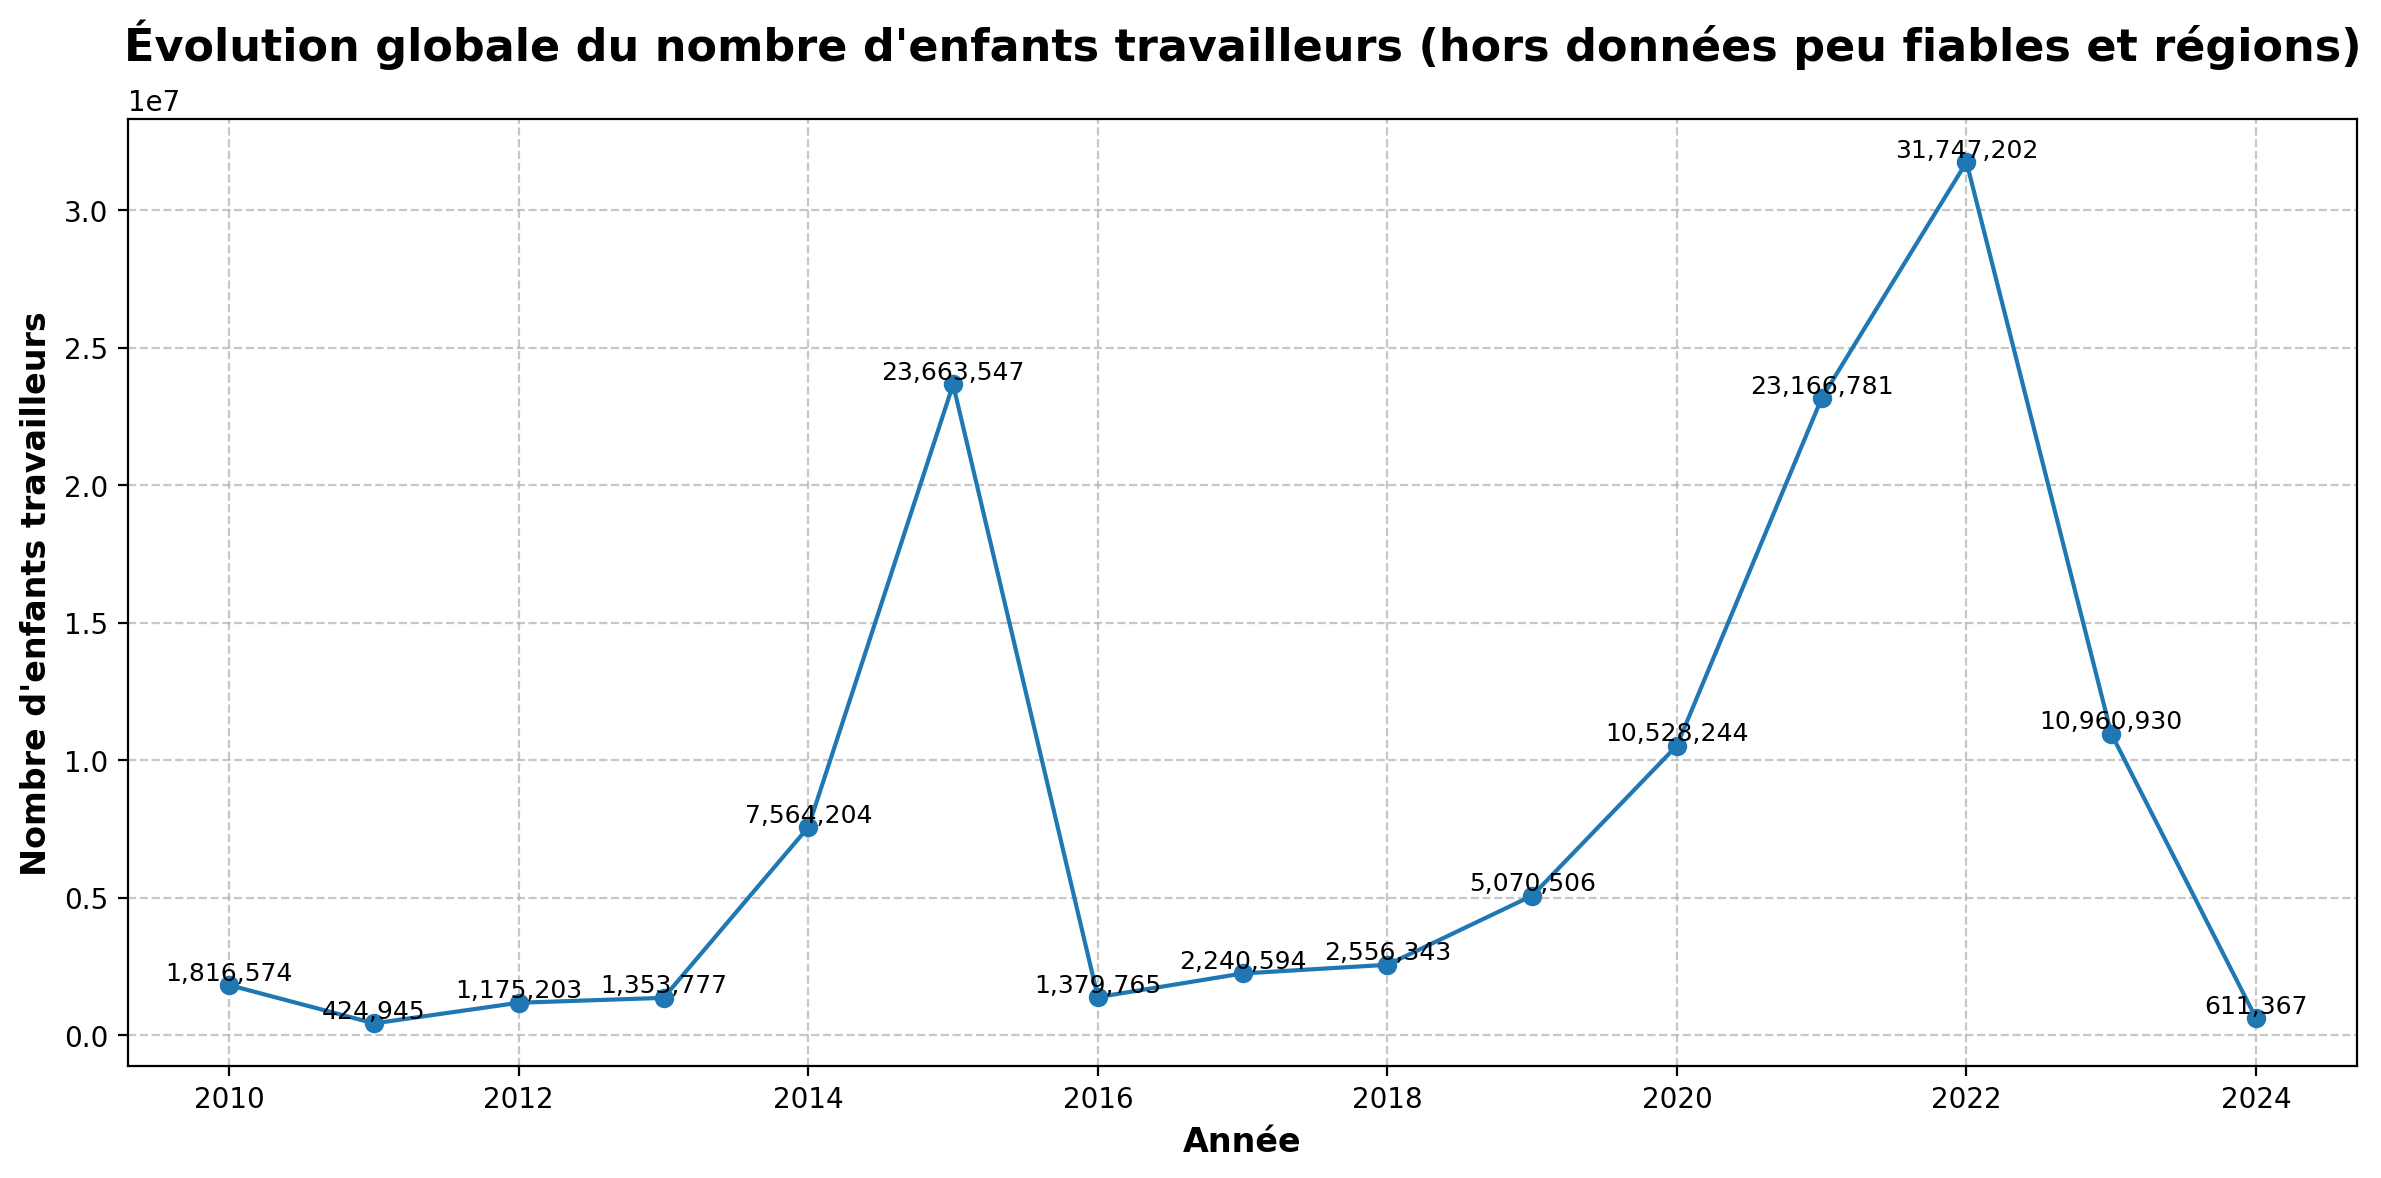

In [53]:


# Liste des régions à exclure
regions = [
    'World', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Africa', 'Eastern Africa',
    'Southern Africa', 'Western Africa', 'Americas', 'Latin America and the Caribbean', 'Caribbean',
    'Central America', 'South America', 'Northern America', 'Arab States', 'Asia and the Pacific',
    'Eastern Asia', 'South-Eastern Asia and the Pacific', 'South-Eastern Asia', 'Pacific Islands',
    'Southern Asia', 'Europe and Central Asia', 'Northern Southern and Western Europe', 'Northern Europe',
    'Southern Europe', 'Western Europe', 'Eastern Europe', 'Central Asia', 'Central and Western Asia',
    'Western Asia'
]


df = pd.read_csv("cleaned_data_multiplied.csv")

# Exclure les lignes peu fiables
df = df[~df['Fiability_data'].str.contains("Unreliable|Break in series", na=False)]

# Exclure les régions et ne garder que les totaux pertinents
df = df[
    (df['Sex'] == 'Total') &
    (df['Age_group'] == '5-17') &
    (df['Education_Status'] == 'Total') &
    (~df['Country'].isin(regions))
]

# S'assurer que Year est bien au format année
df['Year'] = pd.to_datetime(df['Year']).dt.year

# Grouper par année et sommer les Value
df_yearly = df.groupby('Year', as_index=False)['Value'].sum()

# Visualisation
plt.figure(figsize=(12,6))
plt.plot(df_yearly['Year'], df_yearly['Value'], marker='o')
plt.title("Évolution globale du nombre d'enfants travailleurs (hors données peu fiables et régions)")
plt.xlabel("Année")
plt.ylabel("Nombre d'enfants travailleurs")
plt.grid(True, linestyle='--', alpha=0.7)

# Affiche la valeur sur chaque point
for x, y in zip(df_yearly['Year'], df_yearly['Value']):
    plt.text(x, y, f"{int(y):,}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


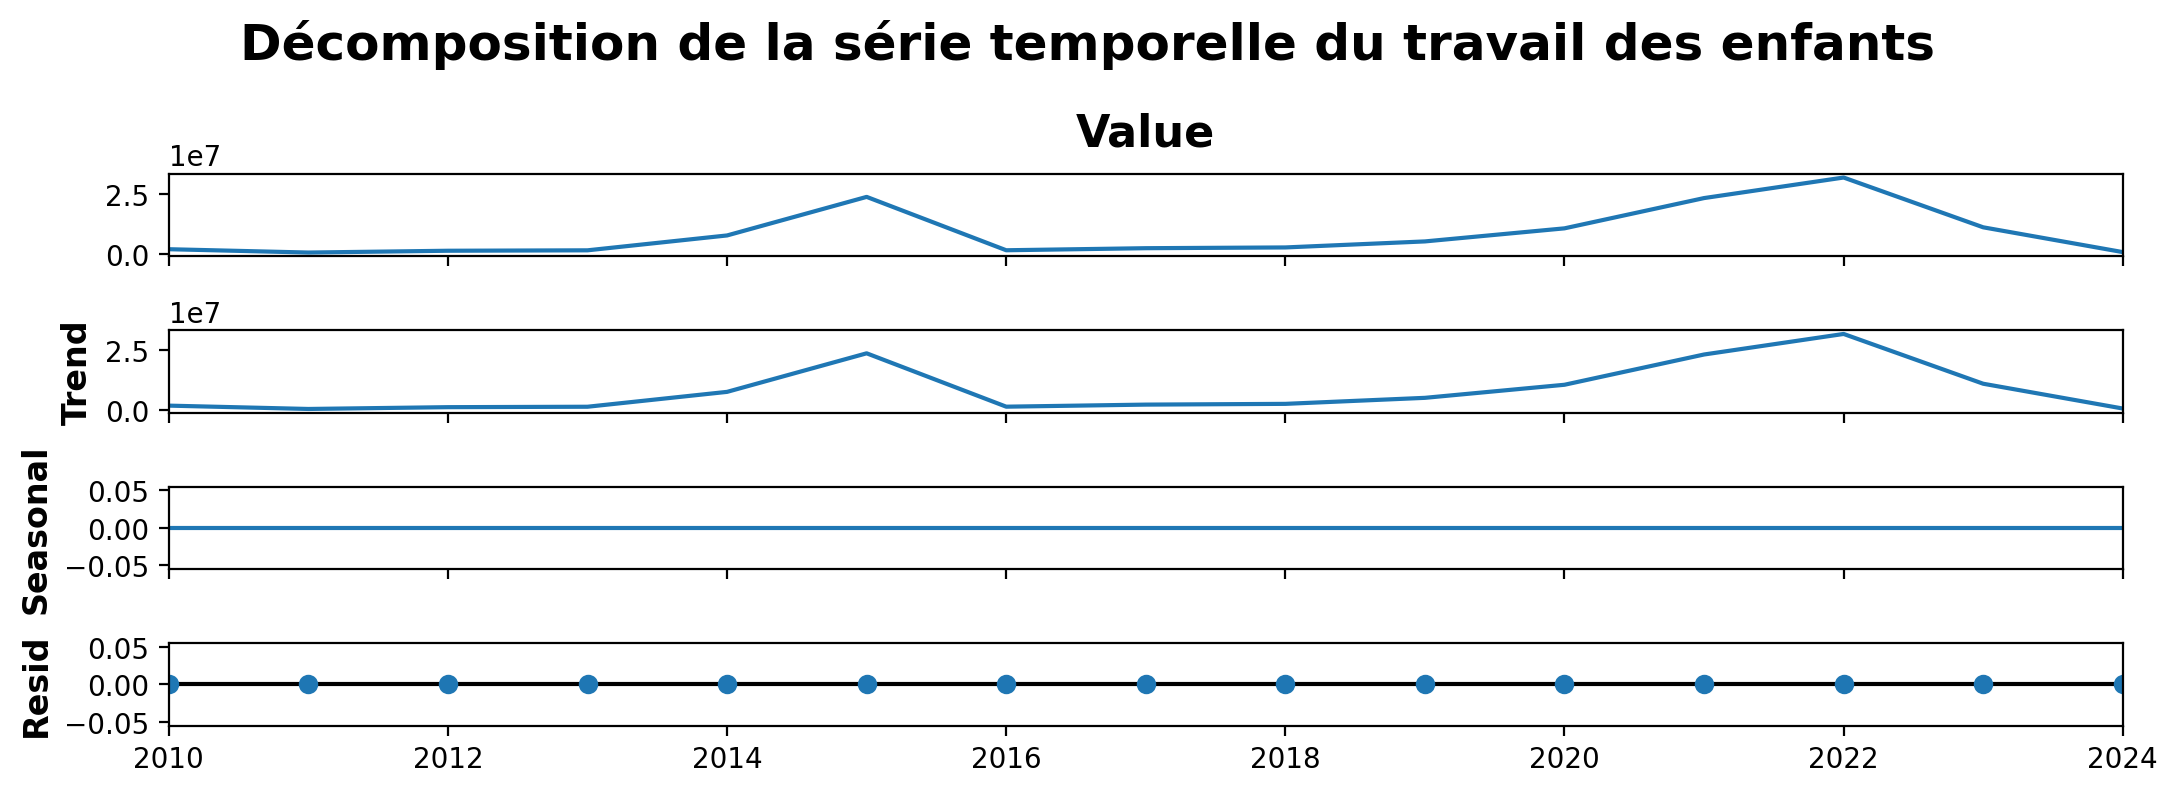

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose


df = pd.read_csv("cleaned_data_multiplied.csv")

# Filtre pour exclure les données peu fiables et les régions
regions = ['World', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Africa',
           'Eastern Africa', 'Southern Africa', 'Western Africa', 'Americas', 'Latin America and the Caribbean',
           'Caribbean', 'Central America', 'South America', 'Northern America', 'Arab States',
           'Asia and the Pacific', 'Eastern Asia', 'South-Eastern Asia and the Pacific',
           'South-Eastern Asia', 'Pacific Islands', 'Southern Asia', 'Europe and Central Asia',
           'Northern Southern and Western Europe', 'Northern Europe', 'Southern Europe',
           'Western Europe', 'Eastern Europe', 'Central Asia', 'Central and Western Asia', 'Western Asia']

df = df[~df['Fiability_data'].str.contains("Unreliable|Break in series", na=False)]
df = df[
    (df['Sex'] == 'Total') &
    (df['Age_group'] == '5-17') &
    (df['Education_Status'] == 'Total') &
    (~df['Country'].isin(regions))
]

# Convertion en format datetime et extraction de l'année
df['Year'] = pd.to_datetime(df['Year']).dt.year

# Agréger par année
df_yearly = df.groupby('Year')['Value'].sum().reset_index()
df_yearly = df_yearly.set_index('Year')

# Décomposition
decomposition = seasonal_decompose(df_yearly['Value'], model='additive', period=1)

# Visualisation
fig = decomposition.plot()
plt.suptitle("Décomposition de la série temporelle du travail des enfants")
plt.tight_layout()
plt.show()


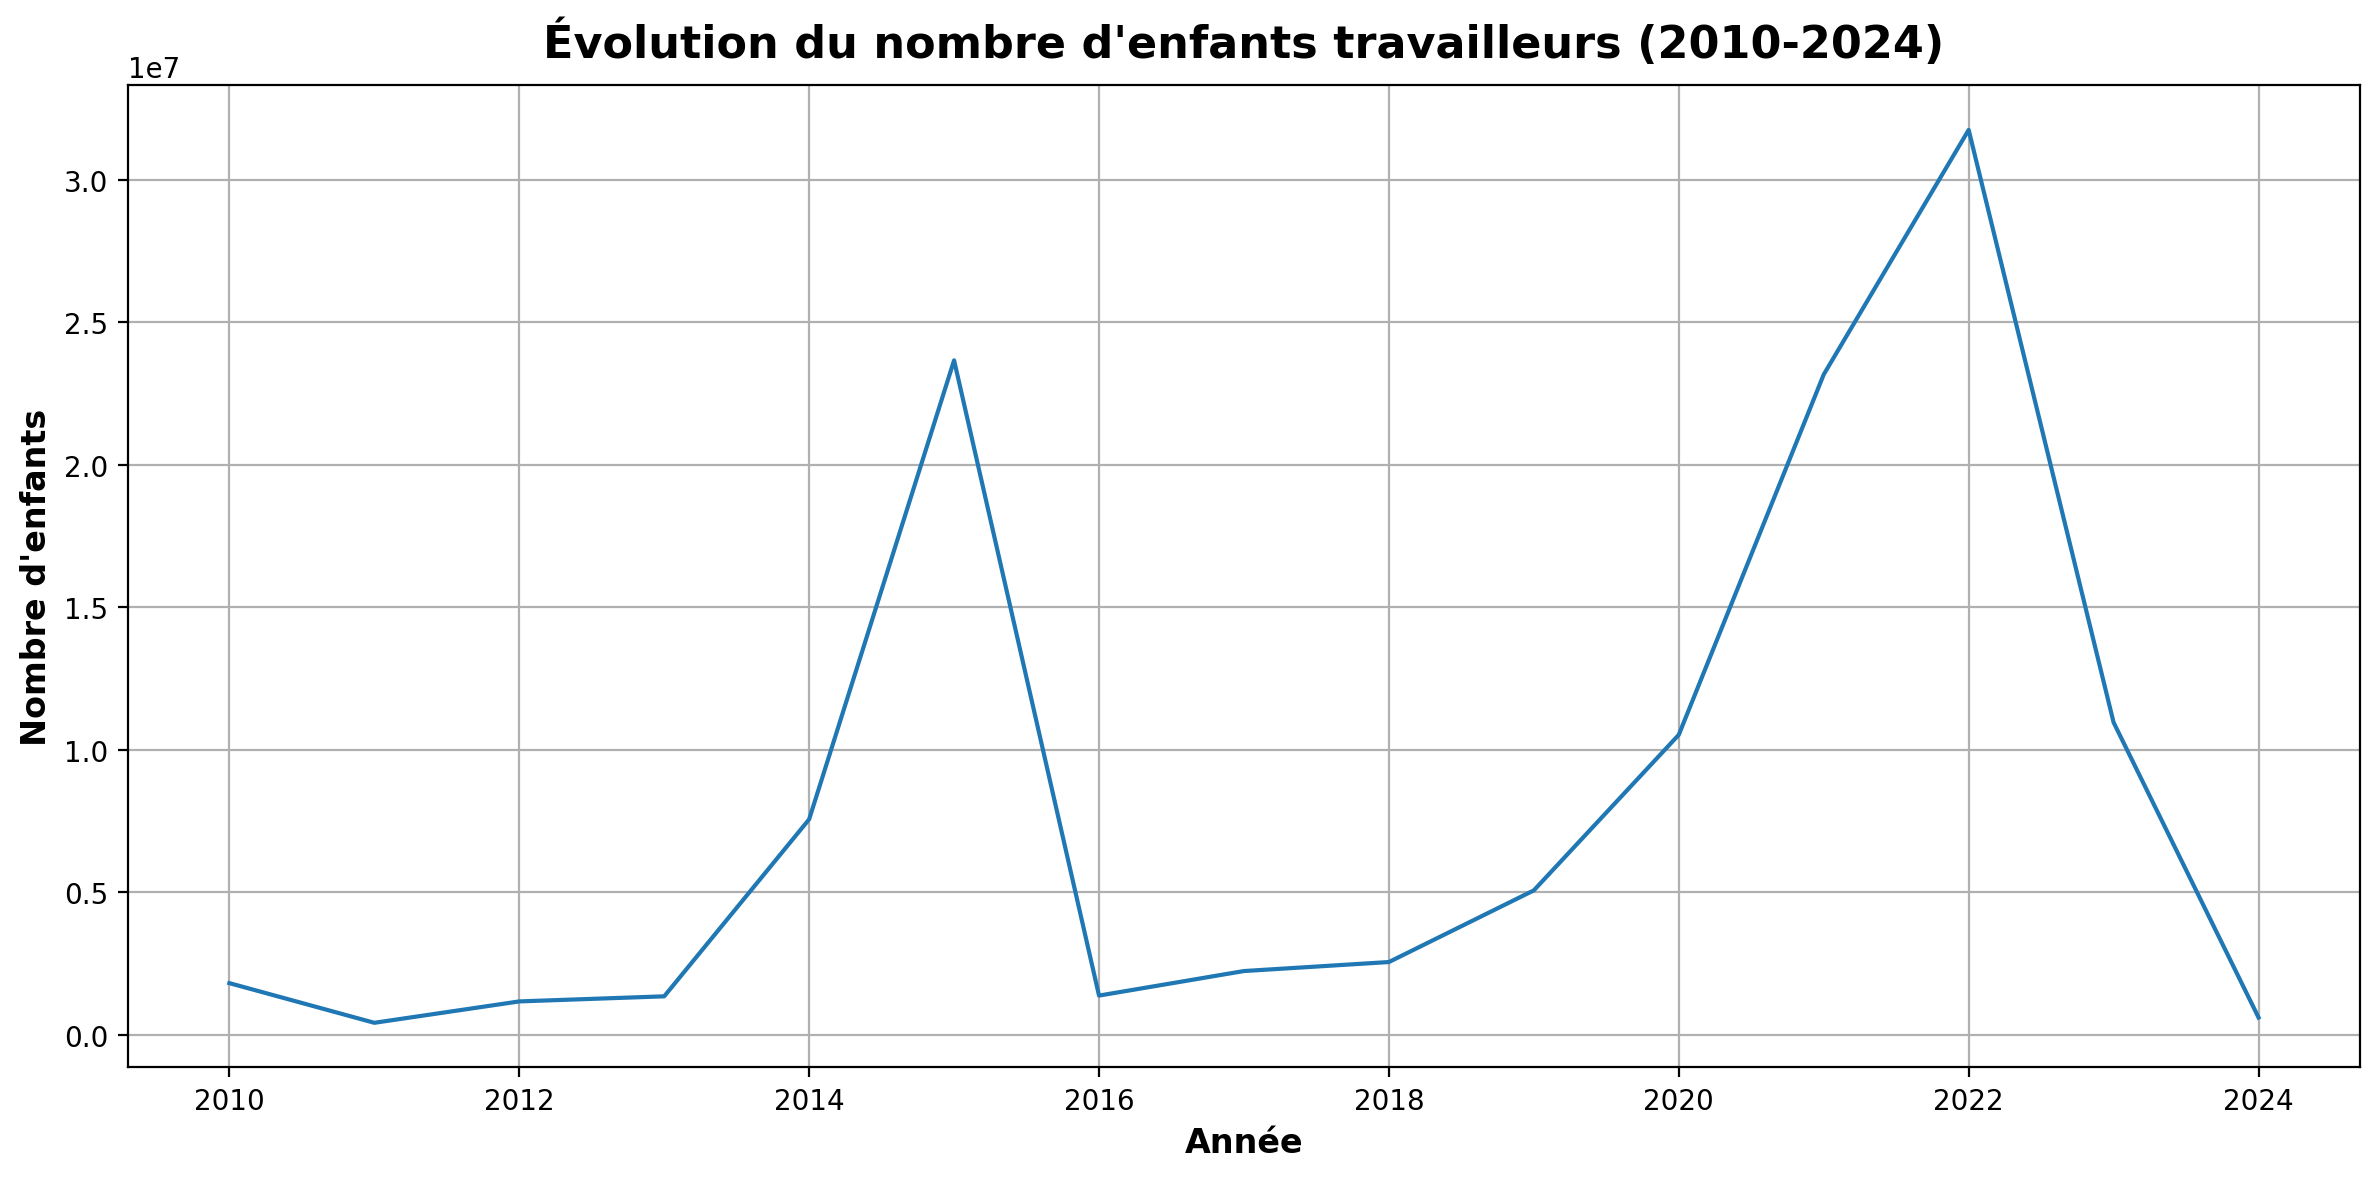

In [55]:
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("cleaned_data_multiplied.csv")

# Filtre les régions et les données non fiables
regions = ['World', 'Africa', 'Northern Africa', 'Sub-Saharan Africa', 'Central Africa', 'Eastern Africa',
           'Southern Africa', 'Western Africa', 'Americas', 'Latin America and the Caribbean', 'Caribbean',
           'Central America', 'South America', 'Northern America', 'Arab States', 'Asia and the Pacific',
           'Eastern Asia', 'South-Eastern Asia and the Pacific', 'South-Eastern Asia', 'Pacific Islands',
           'Southern Asia', 'Europe and Central Asia', 'Northern Southern and Western Europe', 'Northern Europe',
           'Southern Europe', 'Western Europe', 'Eastern Europe', 'Central Asia', 'Central and Western Asia',
           'Western Asia']

df = df[
    (df['Sex'] == 'Total') &
    (df['Age_group'] == '5-17') &
    (df['Education_Status'] == 'Total') &
    (~df['Country'].isin(regions))
]
df = df[~df['Fiability_data'].str.contains("Unreliable|Break in series", na=False)]

# Prépare les données temporelles
df['Year'] = pd.to_datetime(df['Year']).dt.year
df_yearly = df.groupby('Year')['Value'].sum().reset_index()
df_yearly = df_yearly.set_index('Year')

# Visualise la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(df_yearly.index, df_yearly['Value'])
plt.title('Évolution du nombre d\'enfants travailleurs (2010-2024)')
plt.ylabel('Nombre d\'enfants')
plt.xlabel('Année')
plt.grid(True)
plt.show()


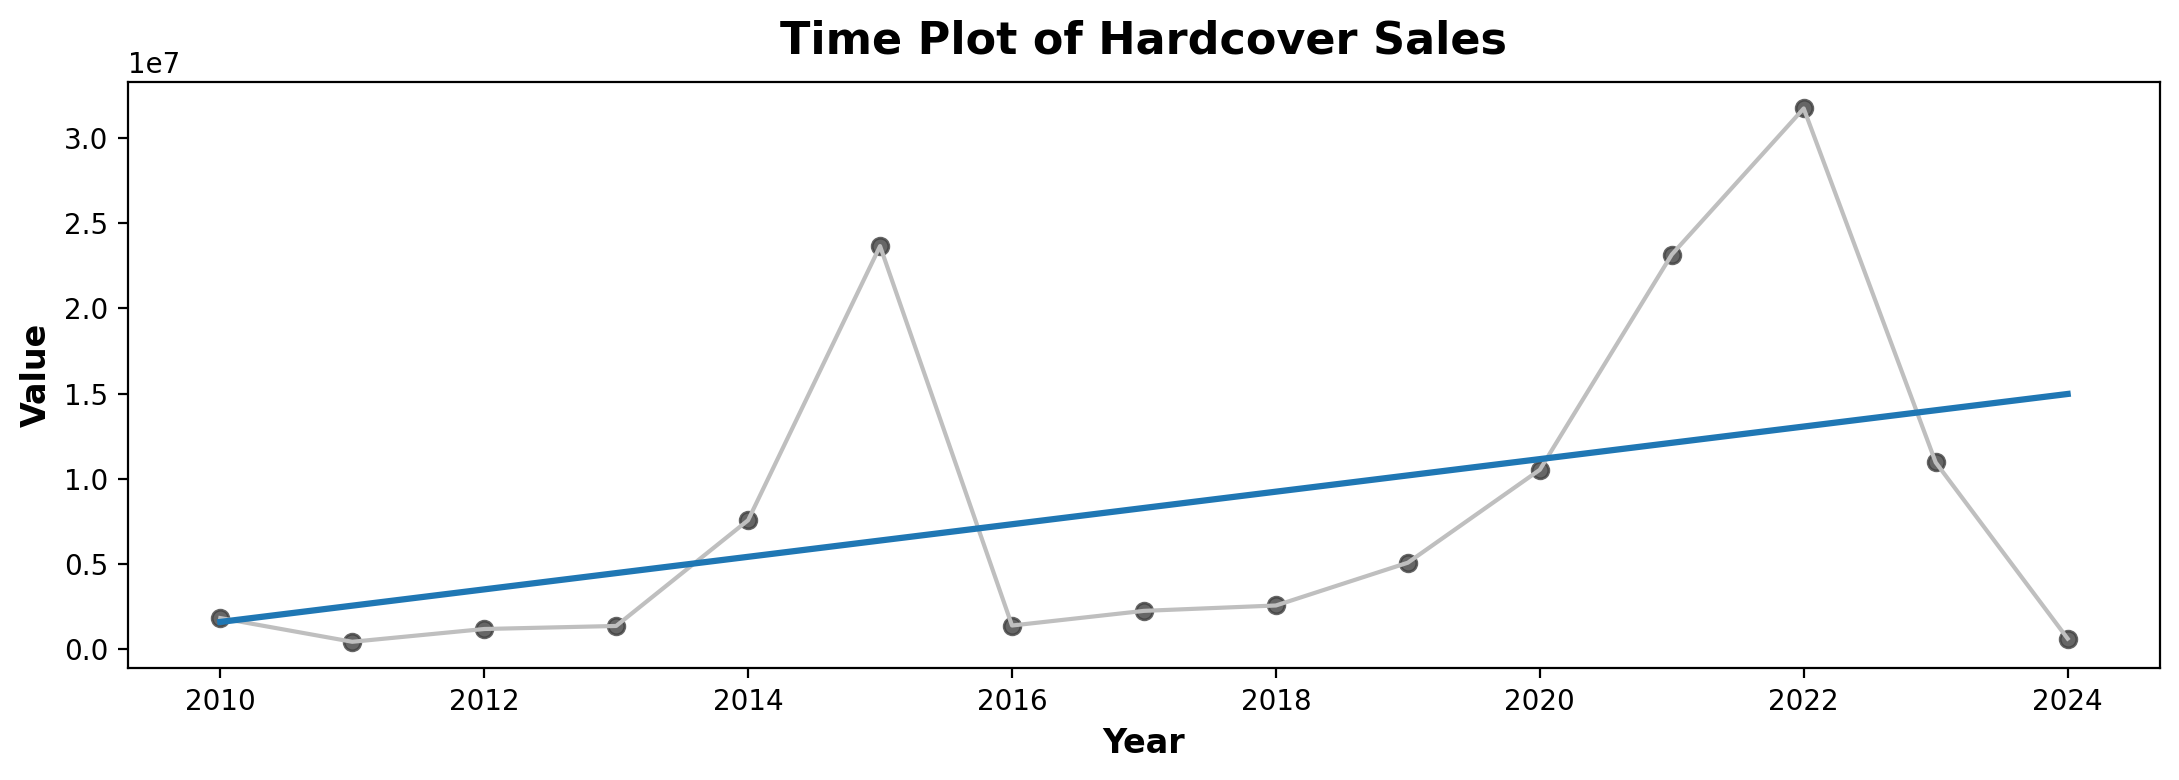

In [56]:
import seaborn as sns
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot(df_yearly.index, df_yearly['Value'], data=df_yearly, color='0.75')
ax = sns.regplot(x=df_yearly.index, y=df_yearly['Value'], data=df_yearly, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

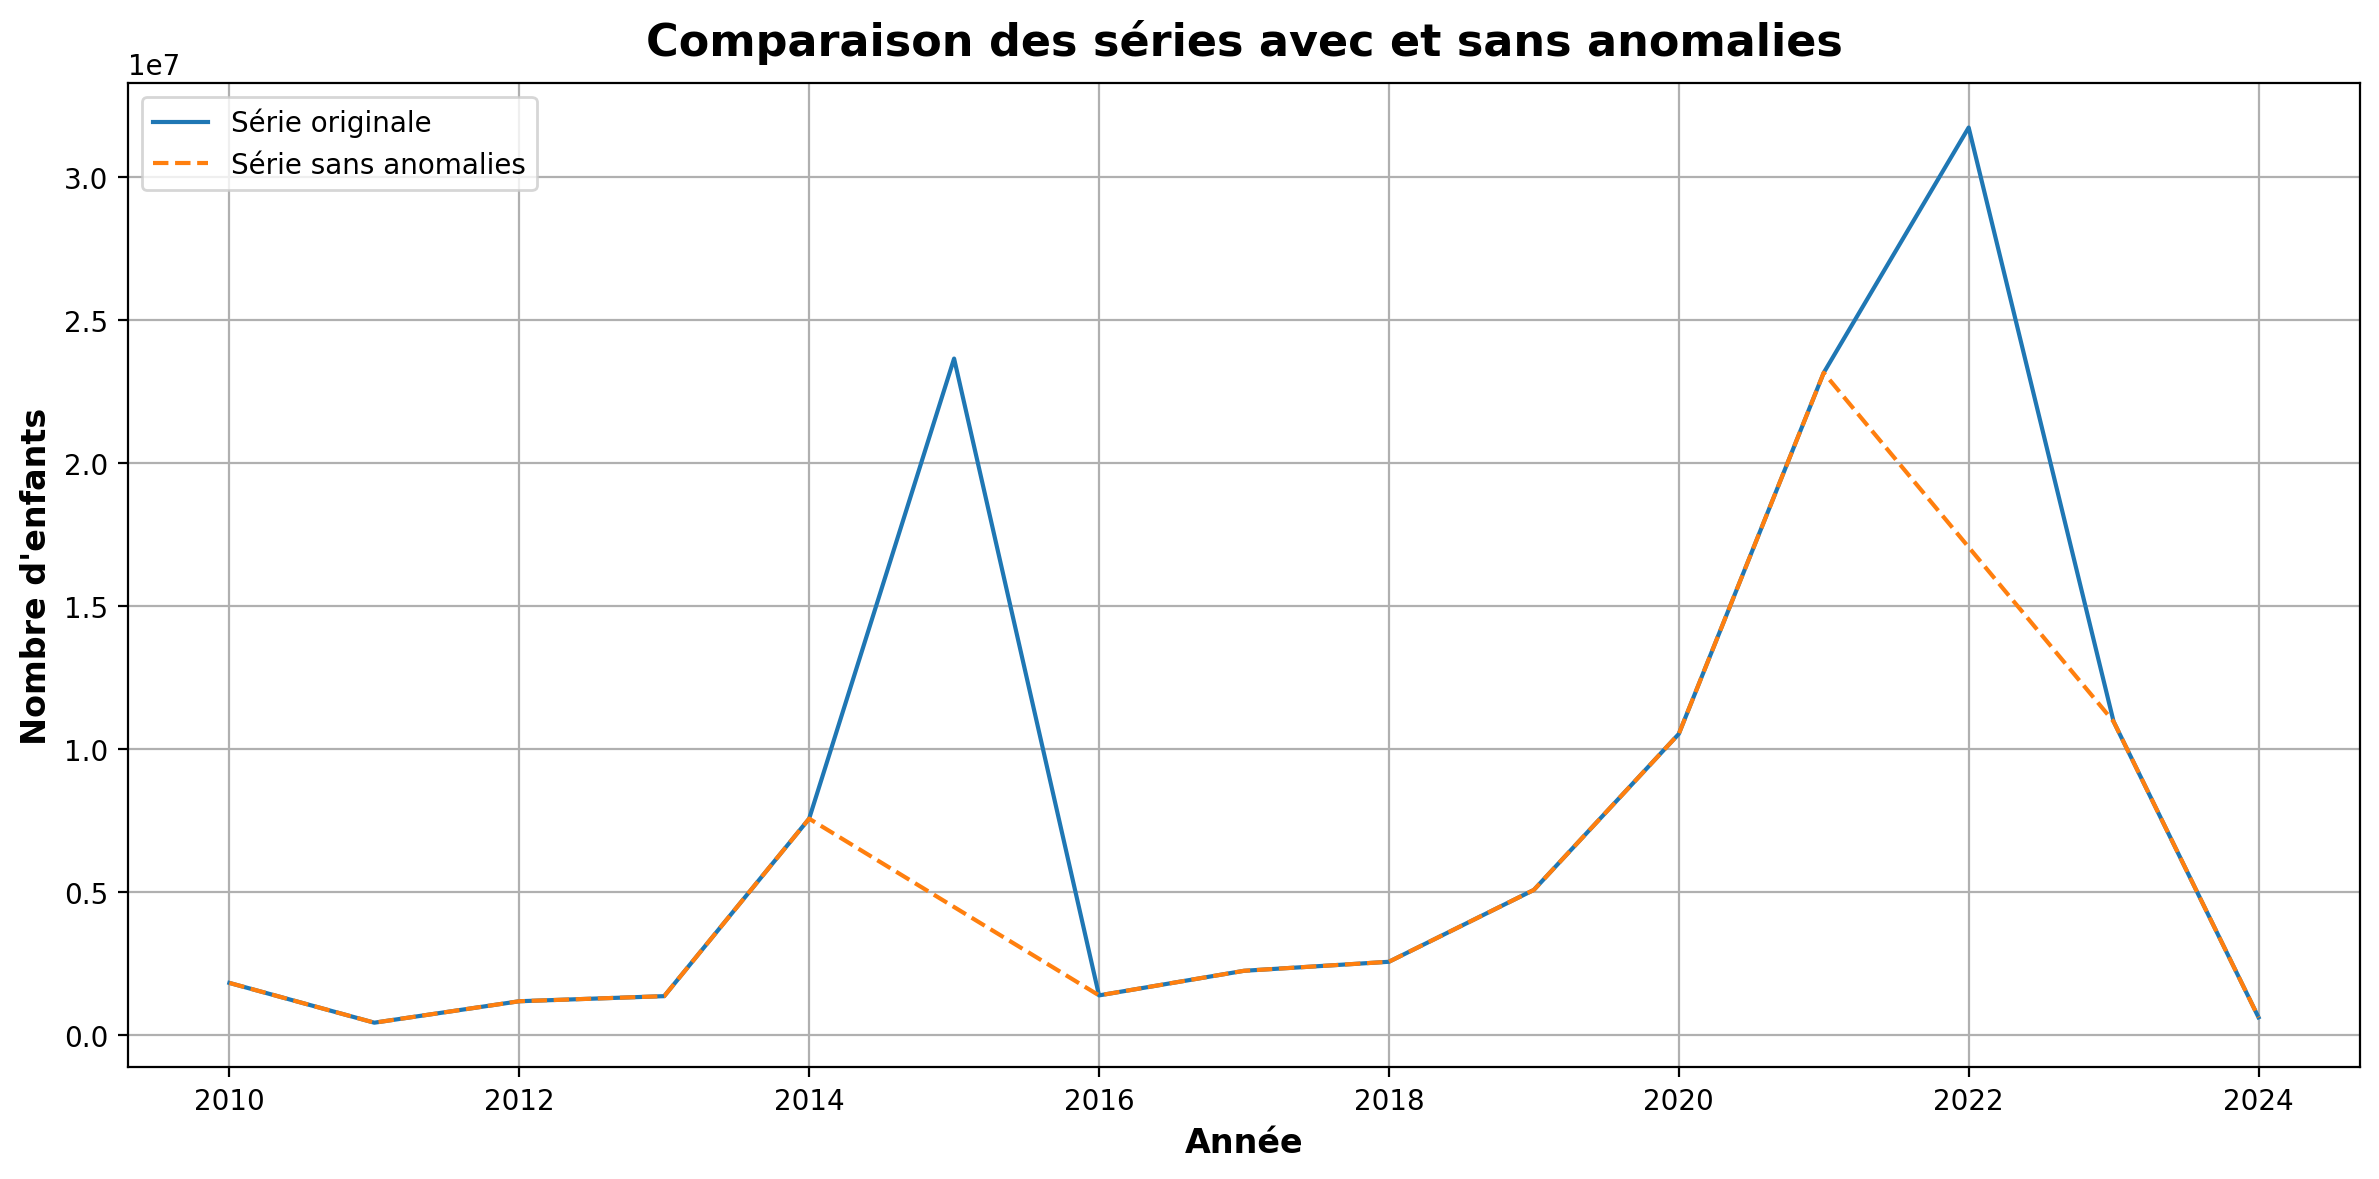

In [57]:
# Crée une version sans anomalies pour comparaison
df_no_anomalies = df_yearly.copy()
anomaly_years = [2015, 2022]  # Années à traiter comme anomalies

# Méthode 1: Remplacer par la moyenne des années adjacentes
for year in anomaly_years:
    if year in df_no_anomalies.index:
        prev_year = year - 1
        next_year = year + 1
        if prev_year in df_no_anomalies.index and next_year in df_no_anomalies.index:
            df_no_anomalies.loc[year, 'Value'] = (df_no_anomalies.loc[prev_year, 'Value'] +
                                                 df_no_anomalies.loc[next_year, 'Value']) / 2

# Visualisation de la série avec et sans anomalies
plt.figure(figsize=(12, 6))
plt.plot(df_yearly.index, df_yearly['Value'], label='Série originale')
plt.plot(df_no_anomalies.index, df_no_anomalies['Value'], label='Série sans anomalies', linestyle='--')
plt.title('Comparaison des séries avec et sans anomalies')
plt.ylabel('Nombre d\'enfants')
plt.xlabel('Année')
plt.legend()
plt.grid(True)
plt.show()


Statistique ADF : -2.3020
p-value : 0.1713
Valeurs critiques :
	1%: -4.0689
	5%: -3.1271
	10%: -2.7017
La série n'est pas stationnaire (non-rejet de l'hypothèse nulle)


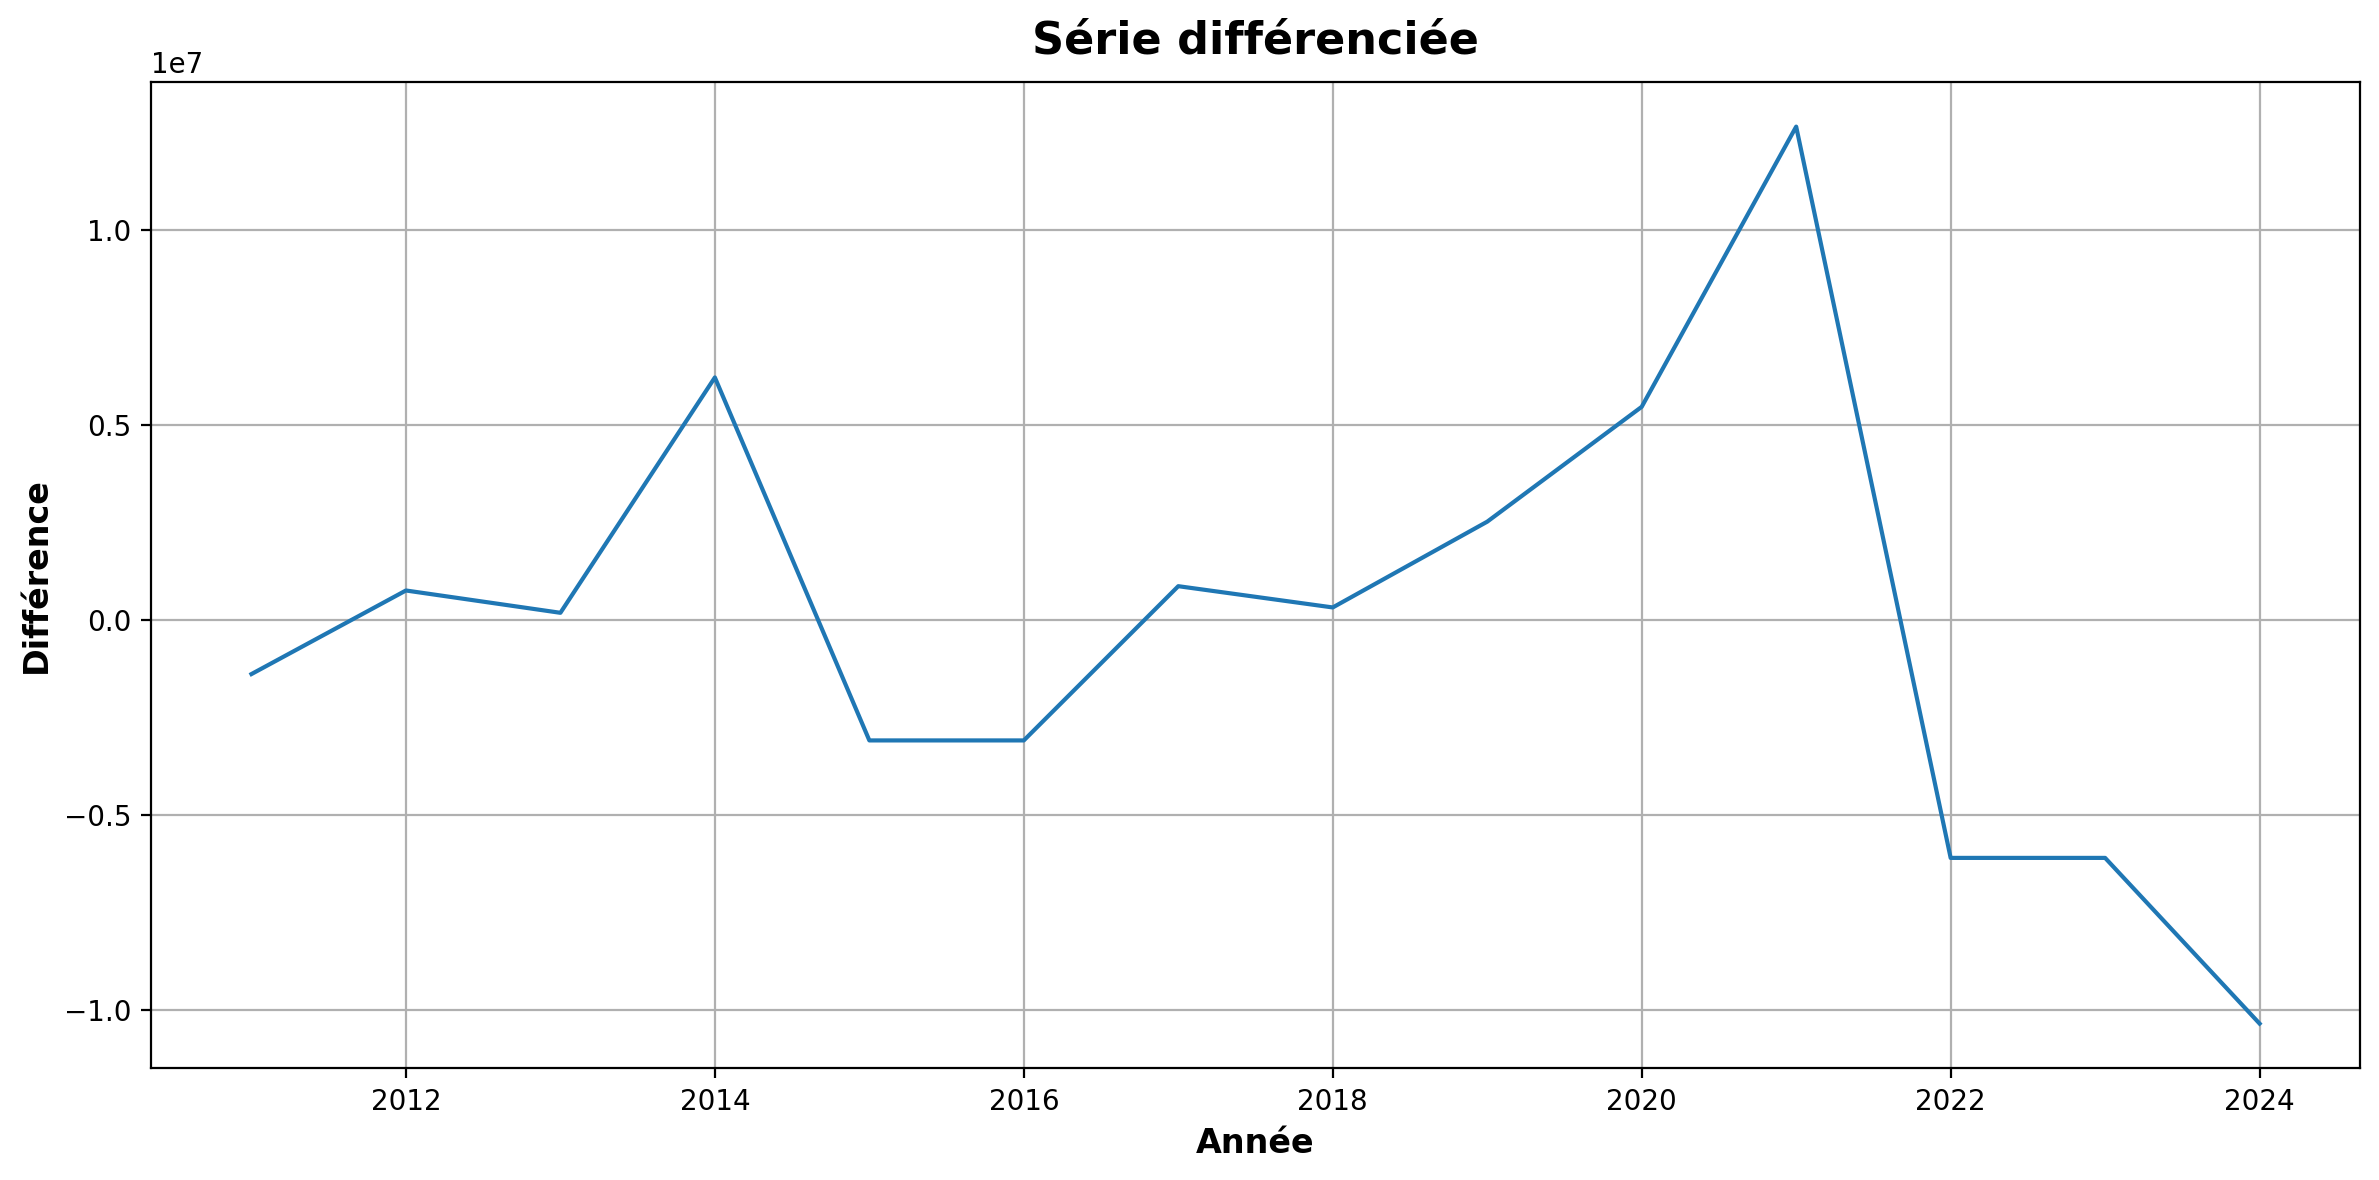

Statistique ADF : -3.5959
p-value : 0.0058
Valeurs critiques :
	1%: -4.6652
	5%: -3.3672
	10%: -2.8030
La série est stationnaire (rejet de l'hypothèse nulle)


In [58]:
# Test de Dickey-Fuller augmenté
def test_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print('Statistique ADF : {:.4f}'.format(result[0]))
    print('p-value : {:.4f}'.format(result[1]))
    print('Valeurs critiques :')
    for key, value in result[4].items():
        print('\t{}: {:.4f}'.format(key, value))

    # Interprétation
    if result[1] <= 0.05:
        print("La série est stationnaire (rejet de l'hypothèse nulle)")
    else:
        print("La série n'est pas stationnaire (non-rejet de l'hypothèse nulle)")

# Test sur la série sans anomalies
test_stationarity(df_no_anomalies['Value'])

# Différenciation si nécessaire
df_diff = df_no_anomalies.diff().dropna()
plt.figure(figsize=(12, 6))
plt.plot(df_diff.index, df_diff['Value'])
plt.title('Série différenciée')
plt.ylabel('Différence')
plt.xlabel('Année')
plt.grid(True)
plt.show()

# Test de stationnarité sur la série différenciée
test_stationarity(df_diff['Value'])


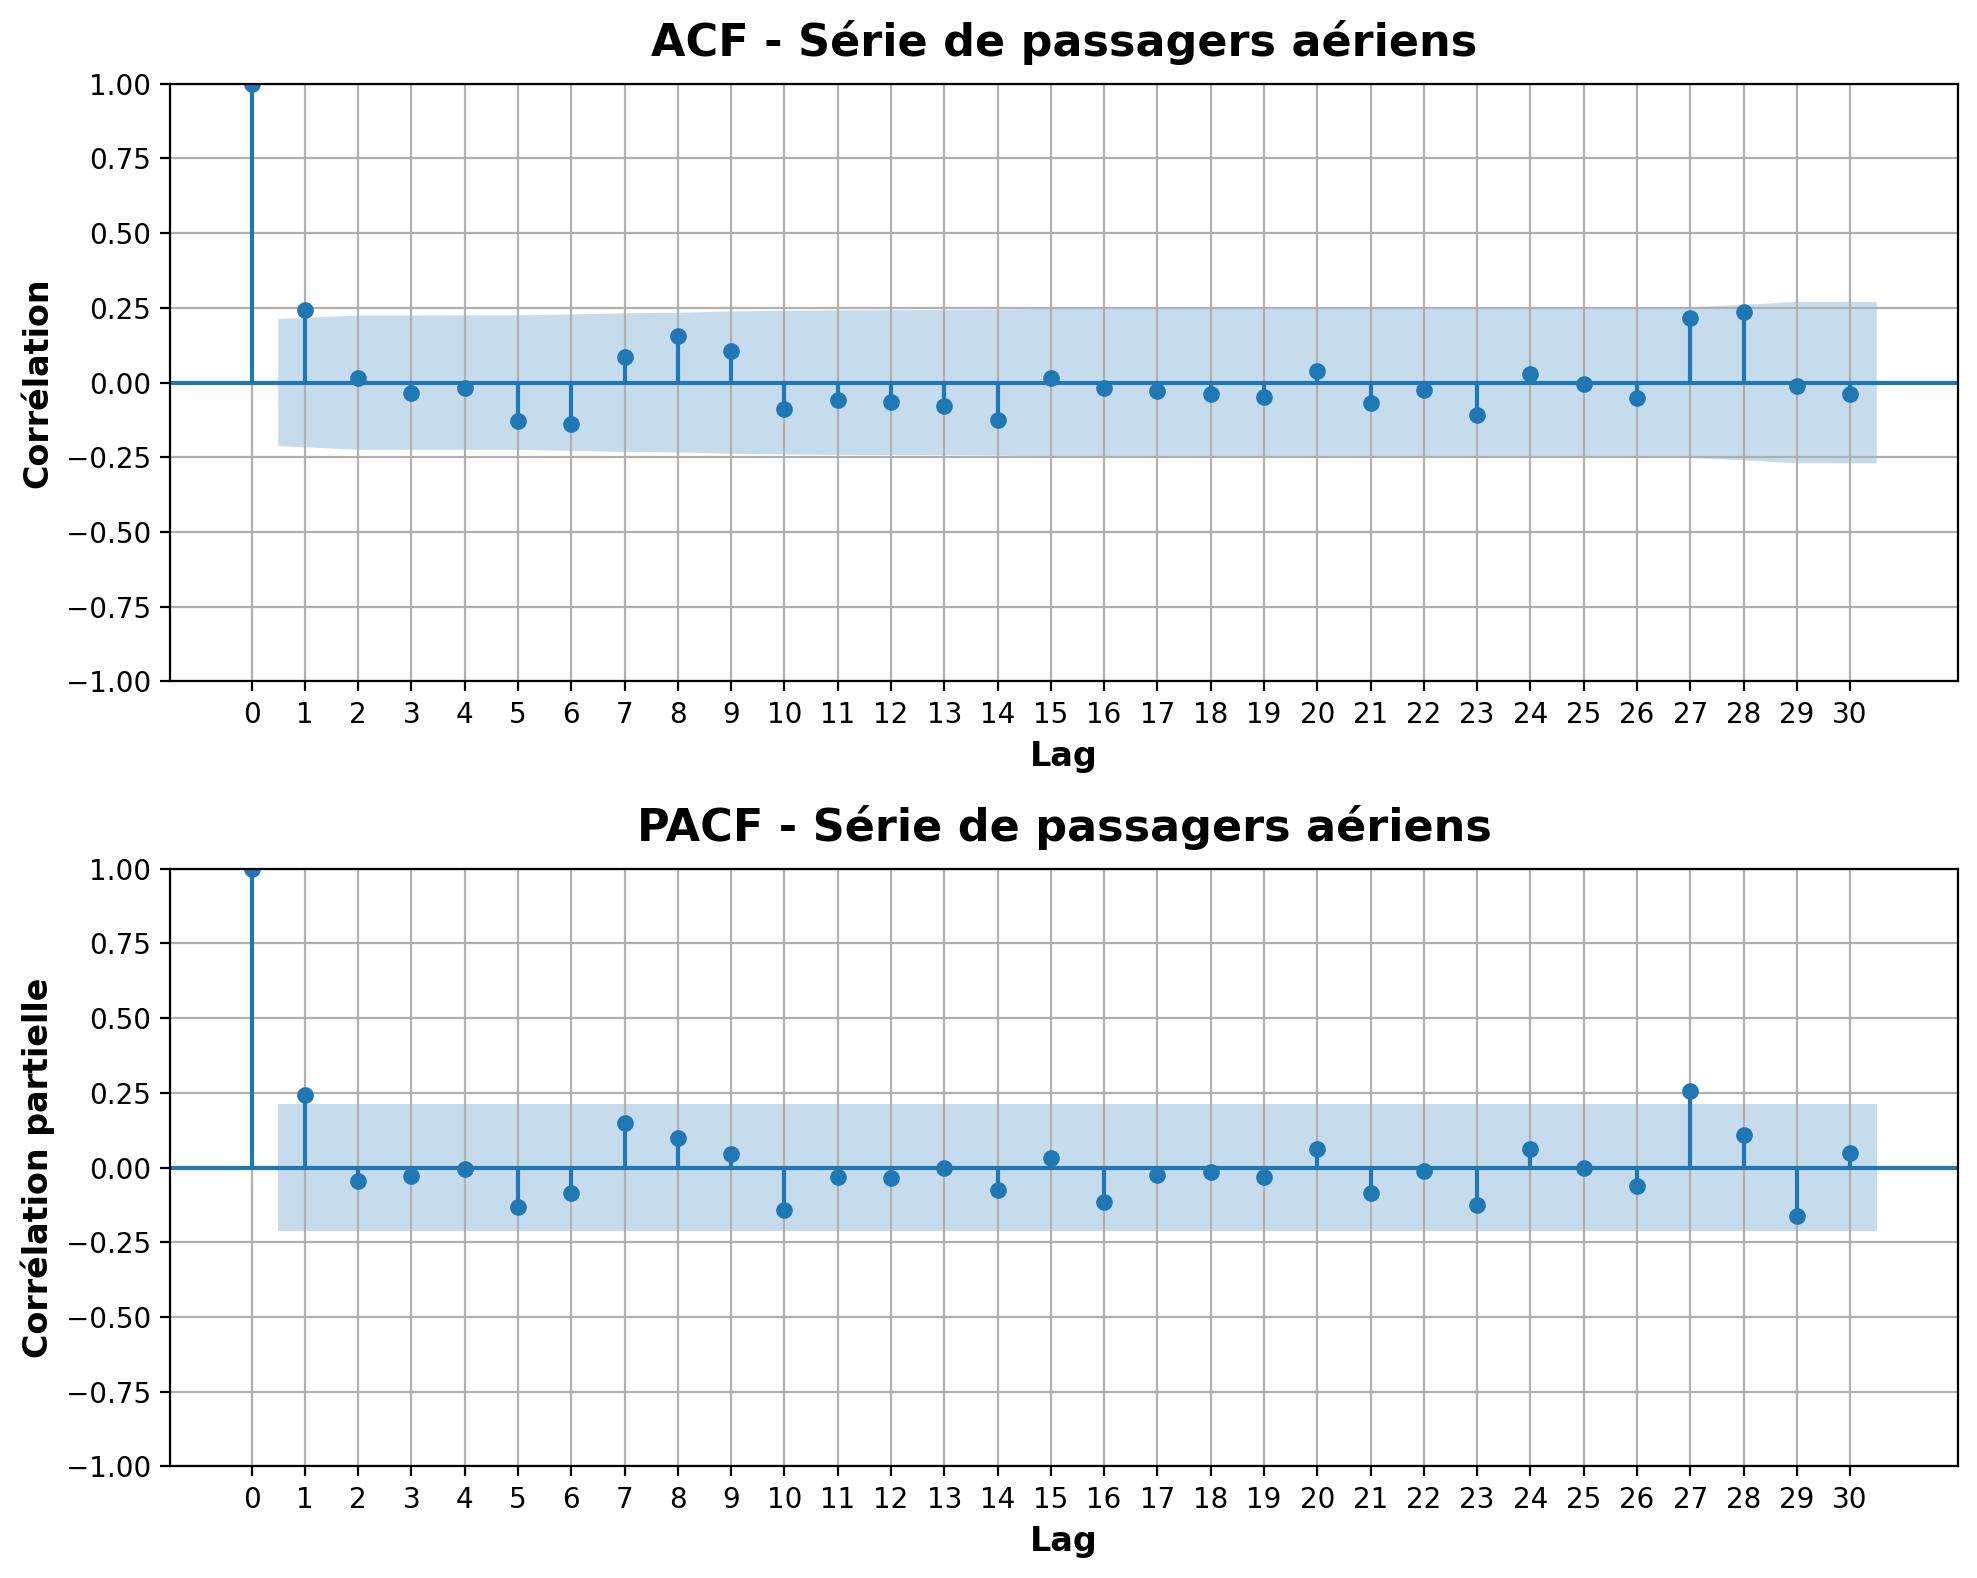

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracé ACF
plot_acf(df['Value'], lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série de passagers aériens')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

ax1.set_xticks(np.arange(0, 31, 1))

# Tracé PACF
plot_pacf(df['Value'], lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série de passagers aériens')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)


ax2.set_xticks(np.arange(0, 31, 1))

plt.tight_layout()

plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -183.815
Date:                Mon, 15 Dec 2025   AIC                            373.631
Time:                        00:12:21   BIC                            374.825
Sample:                             0   HQIC                           372.879
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8780      1.358      0.647      0.518      -1.783       3.539
ma.L1         -0.1982      1.616     -0.123      0.902      -3.366       2.970
sigma2      2.273e+13   2.37e-13   9.57e+25      0.0

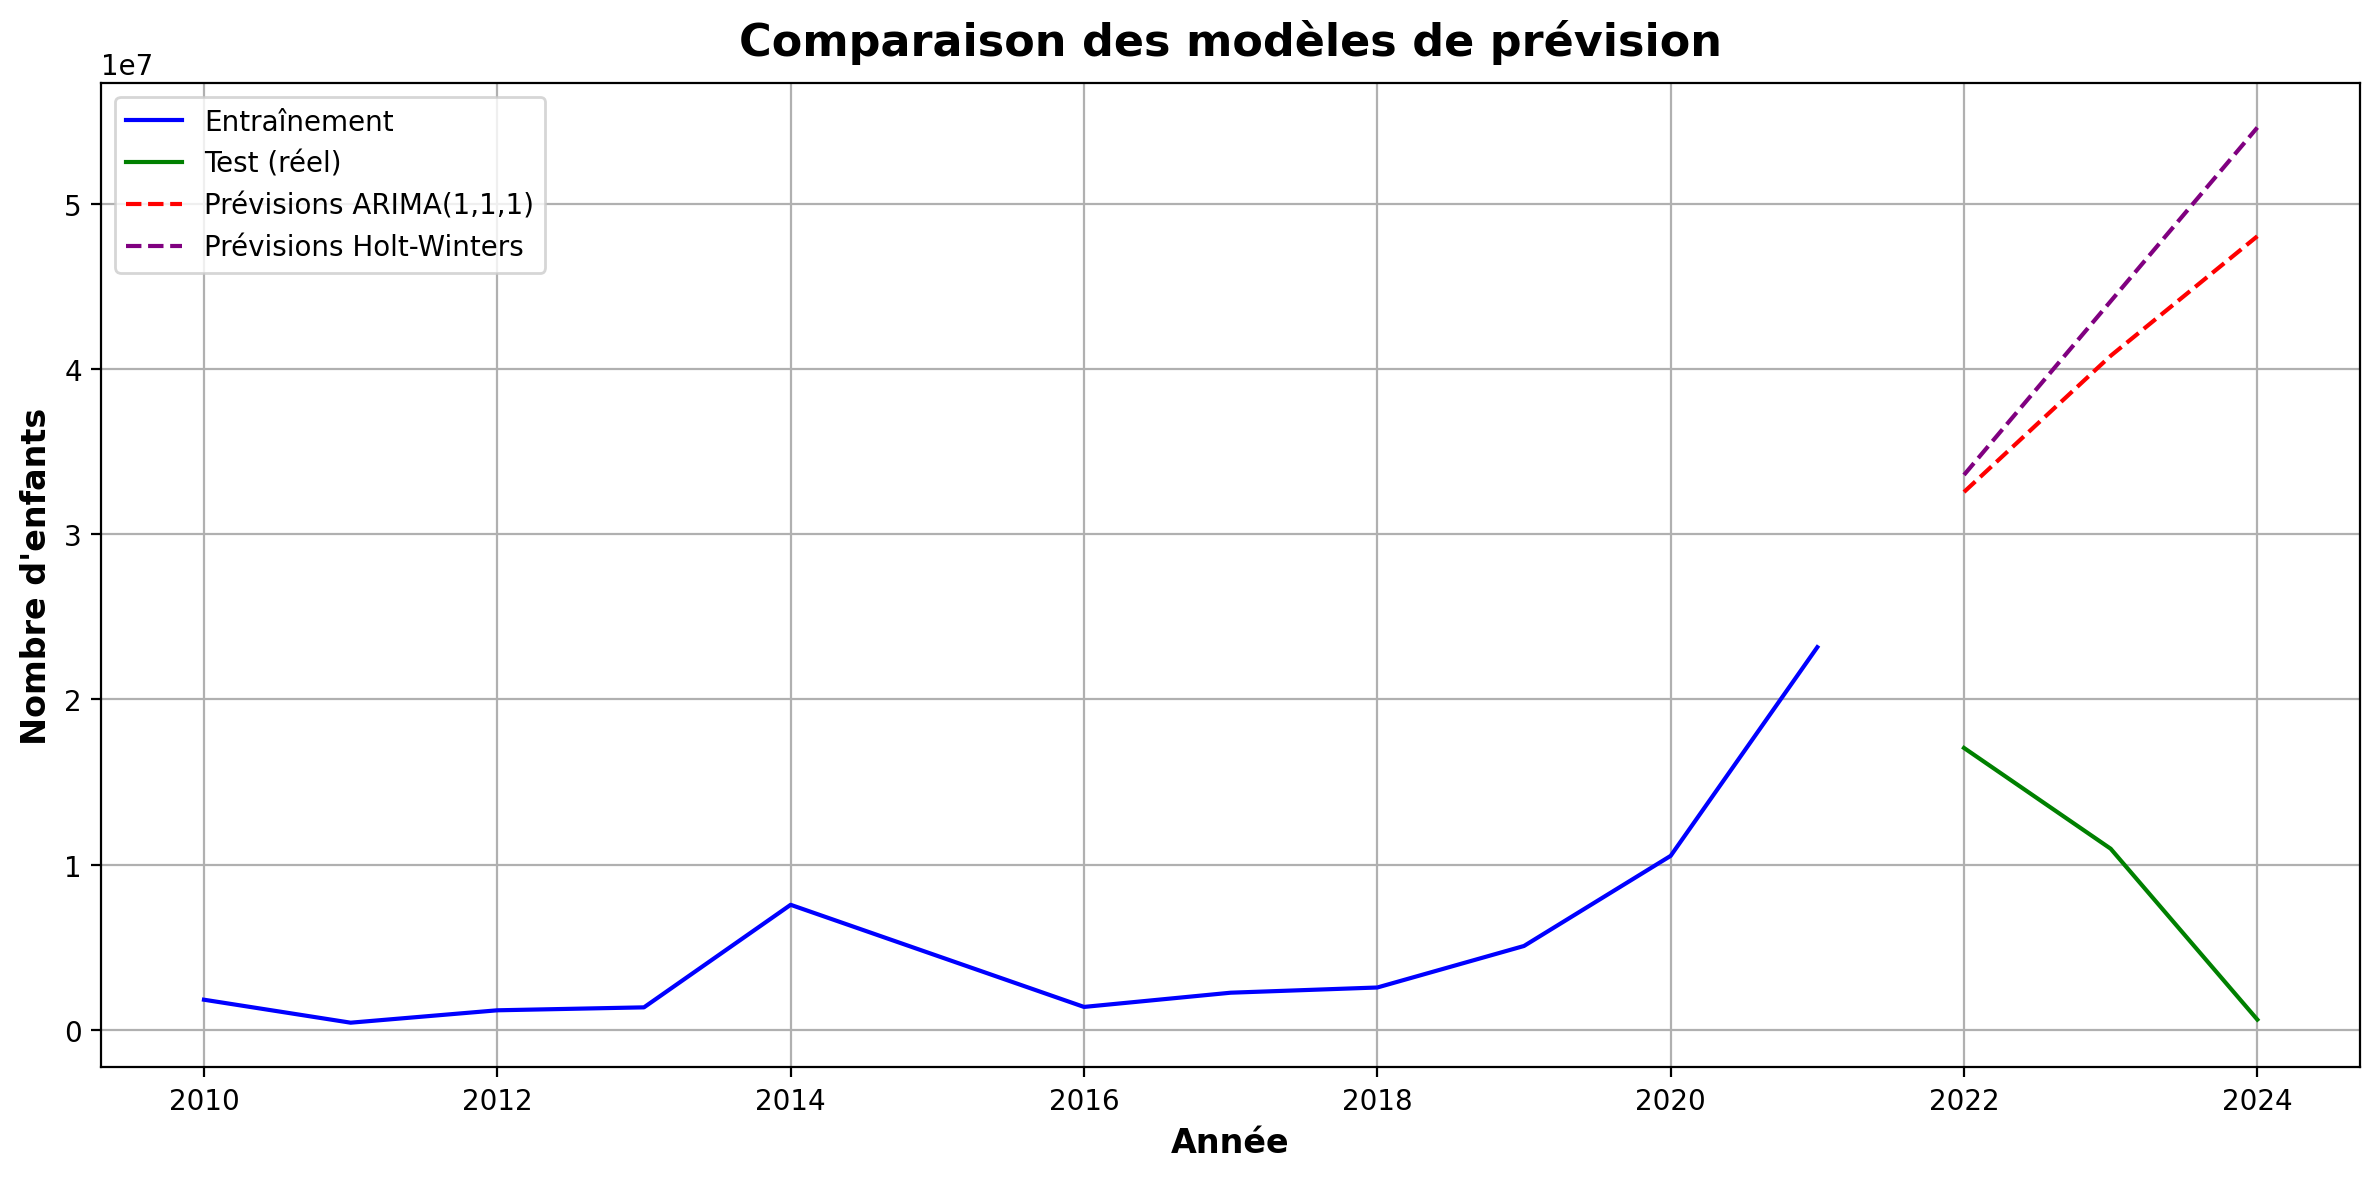

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give


Comparaison des RMSE pour différents ordres ARIMA:
ARIMA(0, 1, 1): 19205600.14
ARIMA(0, 1, 2): 24713276.50
ARIMA(1, 1, 0): 29731420.12
ARIMA(2, 1, 0): 33527325.45
ARIMA(1, 1, 1): 33576091.56
ARIMA(2, 1, 2): 34794629.42


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [60]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

train_size = int(len(df_no_anomalies) * 0.8)
train, test = df_no_anomalies.iloc[:train_size], df_no_anomalies.iloc[train_size:]

# Approche 1: ARIMA avec paramètres manuels
model = ARIMA(train['Value'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

# Prévisions sur l'ensemble de test
arima_predictions = model_fit.forecast(steps=len(test))

# Approche 2: Lissage exponentiel avec tendance
model_hwes = ExponentialSmoothing(train['Value'], trend='add', seasonal=None)
model_hwes_fit = model_hwes.fit()
hwes_predictions = model_hwes_fit.forecast(len(test))

# Évaluation des modèles
models = {'ARIMA(1,1,1)': arima_predictions, 'Holt-Winters': hwes_predictions}
metrics = {}

for name, predictions in models.items():
    mse = mean_squared_error(test['Value'], predictions)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(test['Value'], predictions)
    mape = np.mean(np.abs((test['Value'] - predictions) / test['Value'])) * 100

    metrics[name] = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}
    print(f'\n{name}:')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MAPE: {mape:.2f}%')

# Visualisation comparative
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Value'], label='Entraînement', color='blue')
plt.plot(test.index, test['Value'], label='Test (réel)', color='green')

colors = ['red', 'purple']
for i, (name, predictions) in enumerate(models.items()):
    plt.plot(test.index, predictions, label=f'Prévisions {name}', color=colors[i], linestyle='--')

plt.title('Comparaison des modèles de prévision')
plt.ylabel("Nombre d'enfants")
plt.xlabel('Année')
plt.legend()
plt.grid(True)
plt.show()

# Essai différentes configurations ARIMA pour trouver la meilleure
orders = [(1,1,0), (0,1,1), (1,1,1), (2,1,0), (0,1,2), (2,1,2)]
results = {}

for order in orders:
    try:
        model = ARIMA(train['Value'], order=order)
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=len(test))
        mse = mean_squared_error(test['Value'], predictions)
        results[f'ARIMA{order}'] = math.sqrt(mse)
    except:
        results[f'ARIMA{order}'] = None

print("\nComparaison des RMSE pour différents ordres ARIMA:")
for model, rmse in sorted(results.items(), key=lambda x: x[1] if x[1] is not None else float('inf')):
    if rmse is not None:
        print(f"{model}: {rmse:.2f}")
    else:
        print(f"{model}: Échec de convergence")


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Lissage exponentiel - RMSE: 37821983.88369743
Lissage exponentiel - MAE: 34572136.06509114
Lissage exponentiel - MAPE: nan%


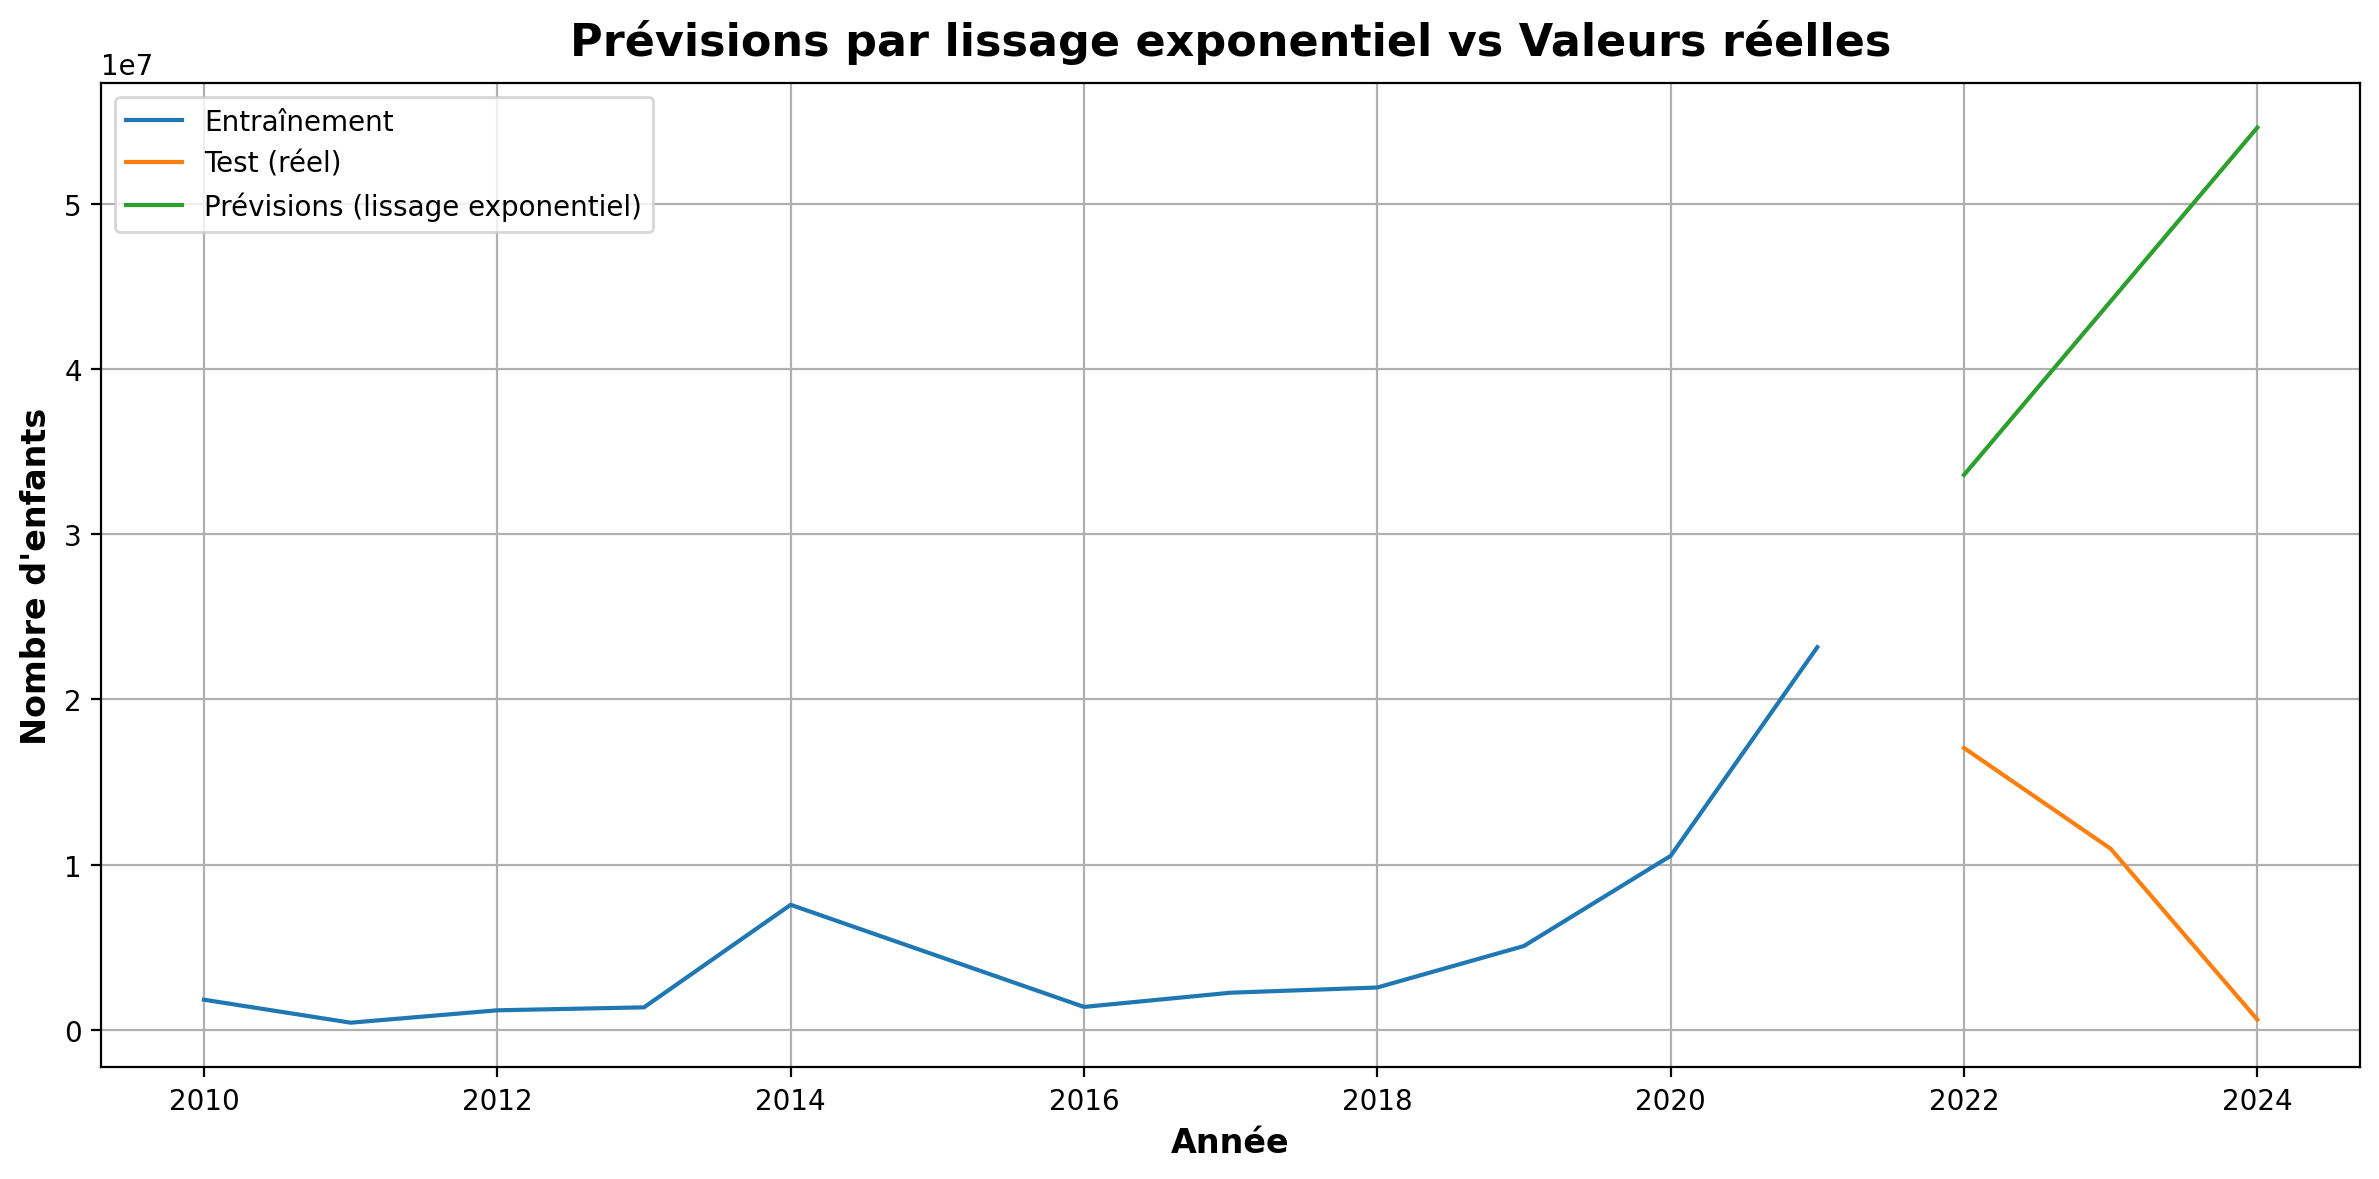

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Modèle de lissage exponentiel (Holt)
model_es = ExponentialSmoothing(train['Value'], trend='add', seasonal=None)
model_es_fit = model_es.fit()

# Prévisions
es_predictions = model_es_fit.forecast(len(test))

# Évaluation
es_mse = mean_squared_error(test['Value'], es_predictions)
es_rmse = math.sqrt(es_mse)
es_mae = mean_absolute_error(test['Value'], es_predictions)
es_mape = np.mean(np.abs((test['Value'] - es_predictions) / test['Value'])) * 100

print(f'Lissage exponentiel - RMSE: {es_rmse}')
print(f'Lissage exponentiel - MAE: {es_mae}')
print(f'Lissage exponentiel - MAPE: {es_mape}%')

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Value'], label='Entraînement')
plt.plot(test.index, test['Value'], label='Test (réel)')
plt.plot(test.index, es_predictions, label='Prévisions (lissage exponentiel)')
plt.title('Prévisions par lissage exponentiel vs Valeurs réelles')
plt.ylabel('Nombre d\'enfants')
plt.xlabel('Année')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

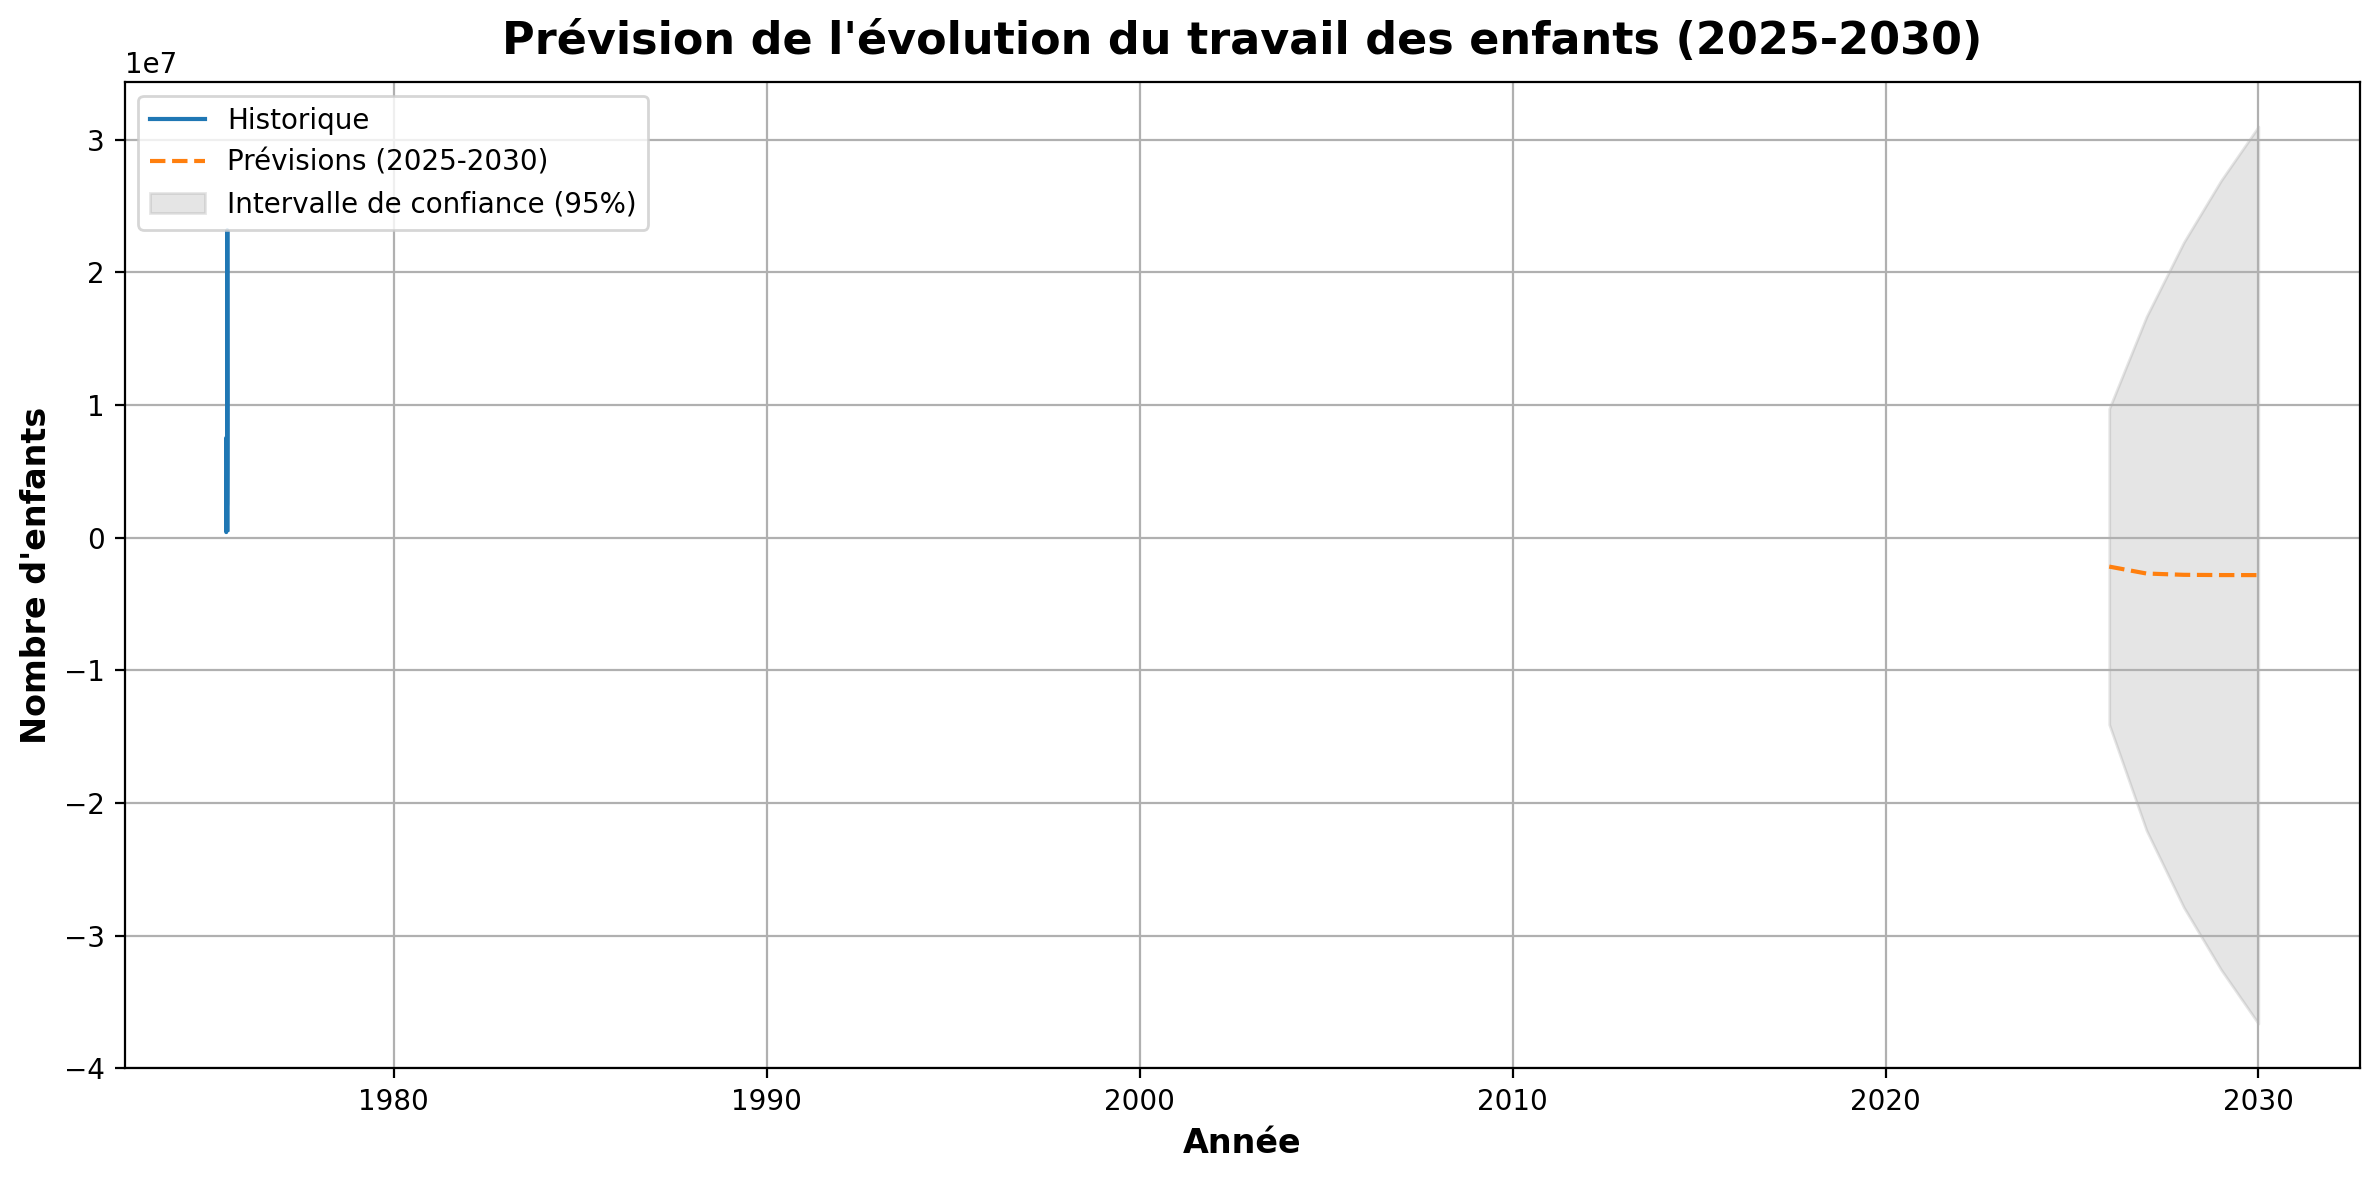

Prévisions 2025-2030:
    Année     Prévision  Limite inférieure  Limite supérieure
15   2025 -2.177173e+06      -1.407833e+07       9.723985e+06
16   2026 -2.699286e+06      -2.206544e+07       1.666687e+07
17   2027 -2.797044e+06      -2.786048e+07       2.226640e+07
18   2028 -2.815348e+06      -3.256572e+07       2.693503e+07
19   2029 -2.818775e+06      -3.662269e+07       3.098514e+07


In [62]:

p, d, q = 1, 1, 1

# Réentraîner le modèle sur toutes les données
full_model_arima = ARIMA(df_no_anomalies['Value'], order=(p, d, q))
full_model_fit = full_model_arima.fit()

# Générer les prévisions
forecast_years = 5  # 2025-2030
forecast = full_model_fit.forecast(steps=forecast_years)
forecast_index = pd.date_range(start=str(df_no_anomalies.index[-1] + 1), periods=forecast_years, freq='A')

plt.figure(figsize=(12, 6))
plt.plot(df_no_anomalies.index, df_no_anomalies['Value'], label='Historique')
plt.plot(forecast_index, forecast, label='Prévisions (2025-2030)', linestyle='--')

pred_conf = full_model_fit.get_forecast(steps=forecast_years).conf_int()
lower = pred_conf.iloc[:, 0]
upper = pred_conf.iloc[:, 1]
plt.fill_between(forecast_index, lower, upper, color='gray', alpha=0.2, label='Intervalle de confiance (95%)')

plt.title('Prévision de l\'évolution du travail des enfants (2025-2030)')
plt.ylabel('Nombre d\'enfants')
plt.xlabel('Année')
plt.legend()
plt.grid(True)
plt.show()

forecast_df = pd.DataFrame({
    'Année': forecast_index.year,
    'Prévision': forecast,
    'Limite inférieure': lower,
    'Limite supérieure': upper
})
print("Prévisions 2025-2030:")
print(forecast_df)

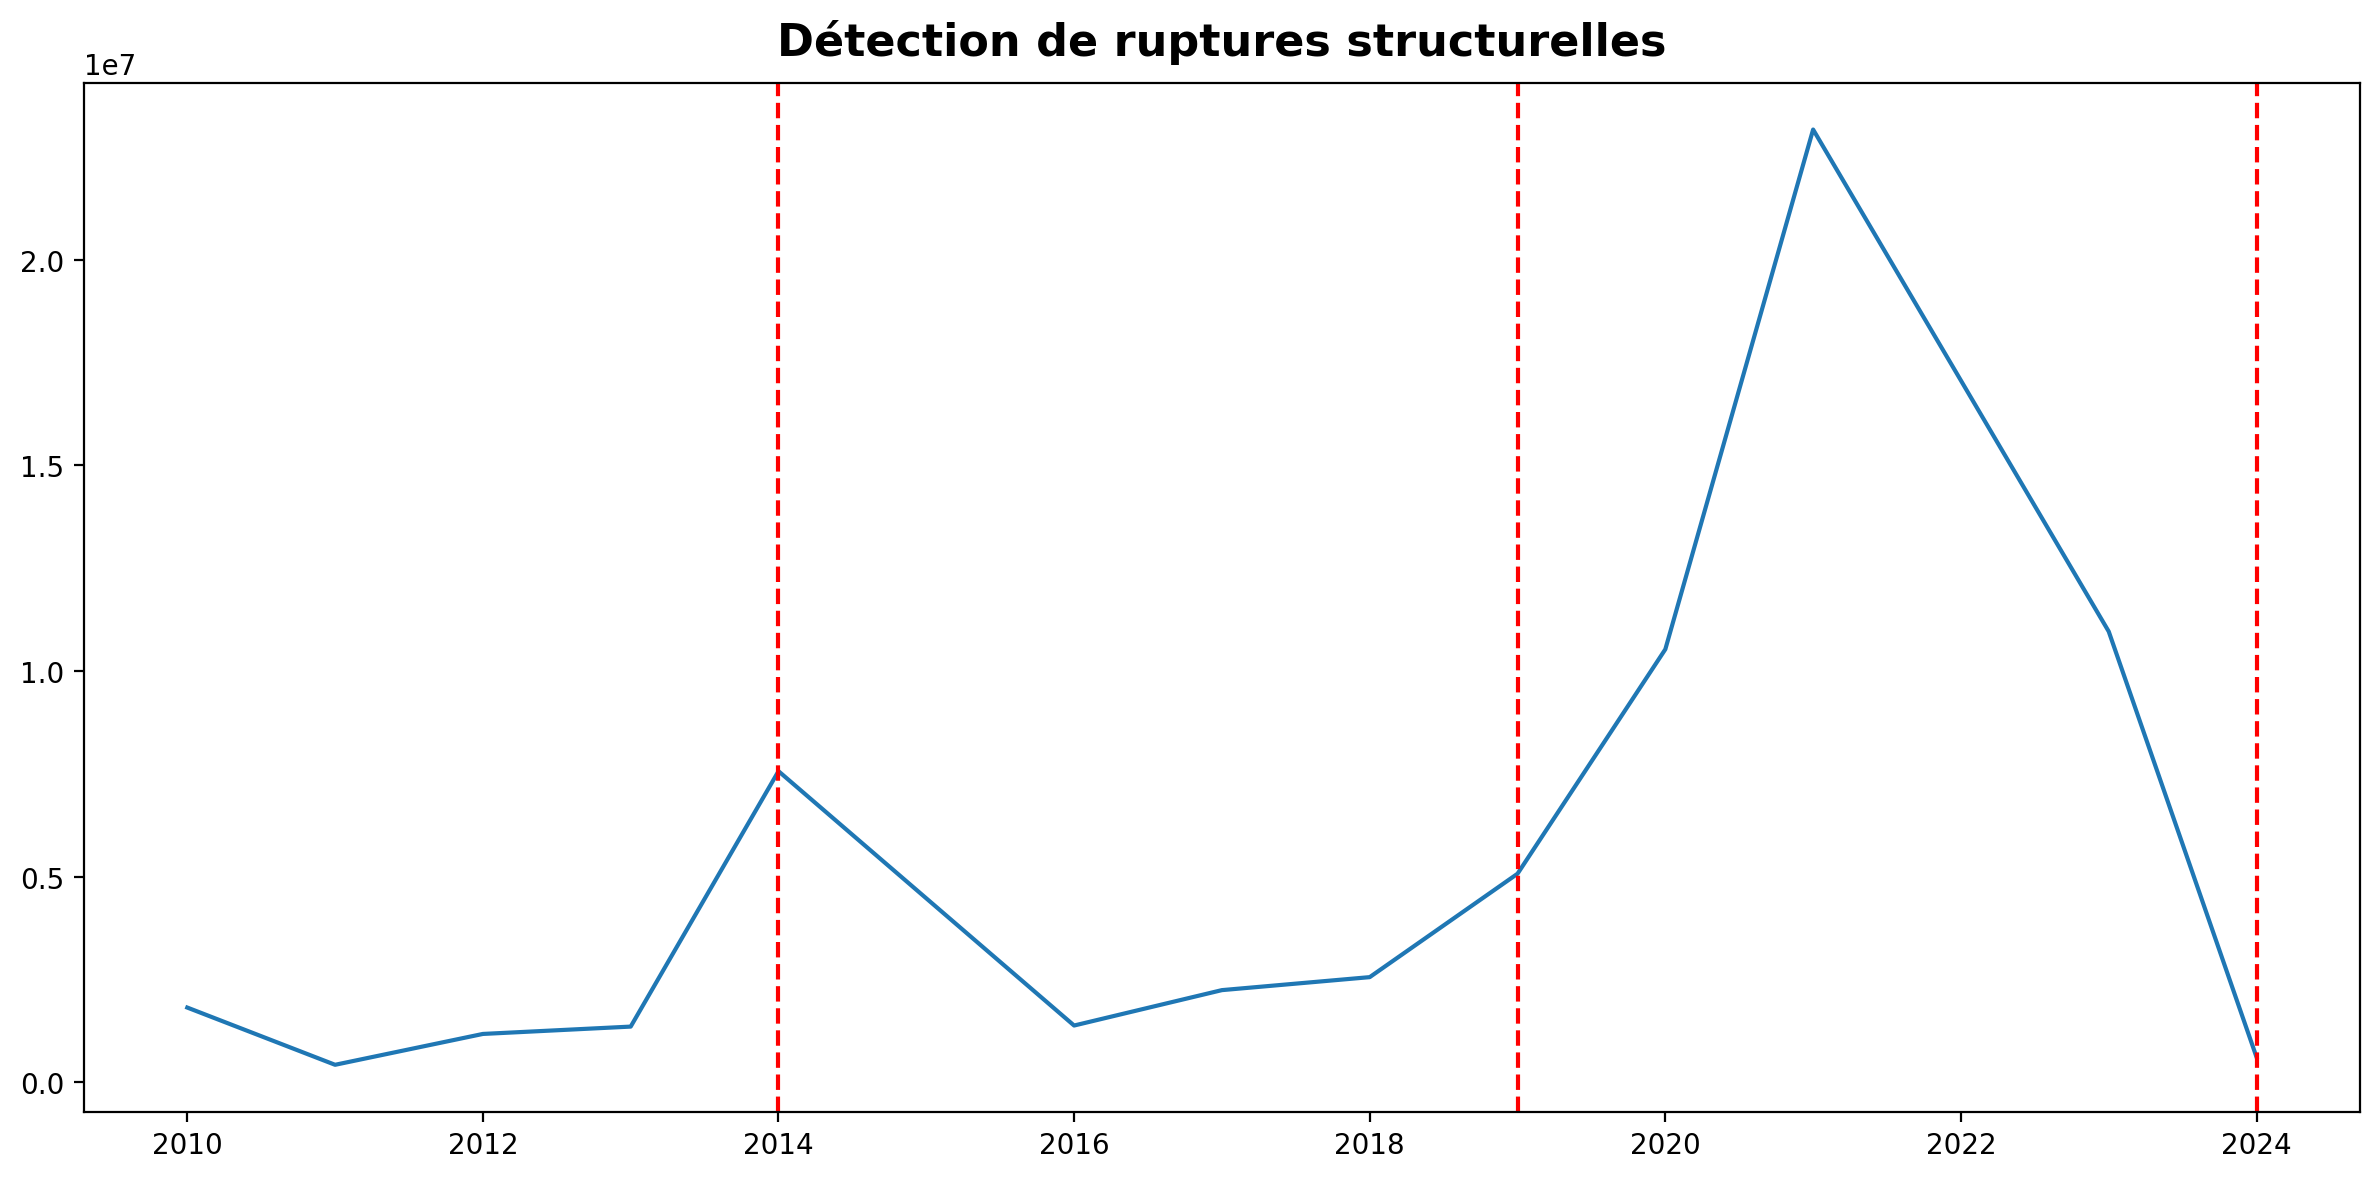

In [63]:
!pip install ruptures
from ruptures import Binseg

# Conversion en array numpy
data_array = df_no_anomalies['Value'].values.reshape(-1, 1)

# Détection des ruptures
algo = Binseg(model="l2").fit(data_array)
result = algo.predict(n_bkps=2)  # On cherche 2 ruptures

# Visualisation des ruptures
plt.figure(figsize=(12,6))
plt.plot(df_no_anomalies.index, df_no_anomalies['Value'])
for bkp in result:
    plt.axvline(x=df_no_anomalies.index[bkp-1], color='red', linestyle='--')
plt.title('Détection de ruptures structurelles')
plt.show()



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-i

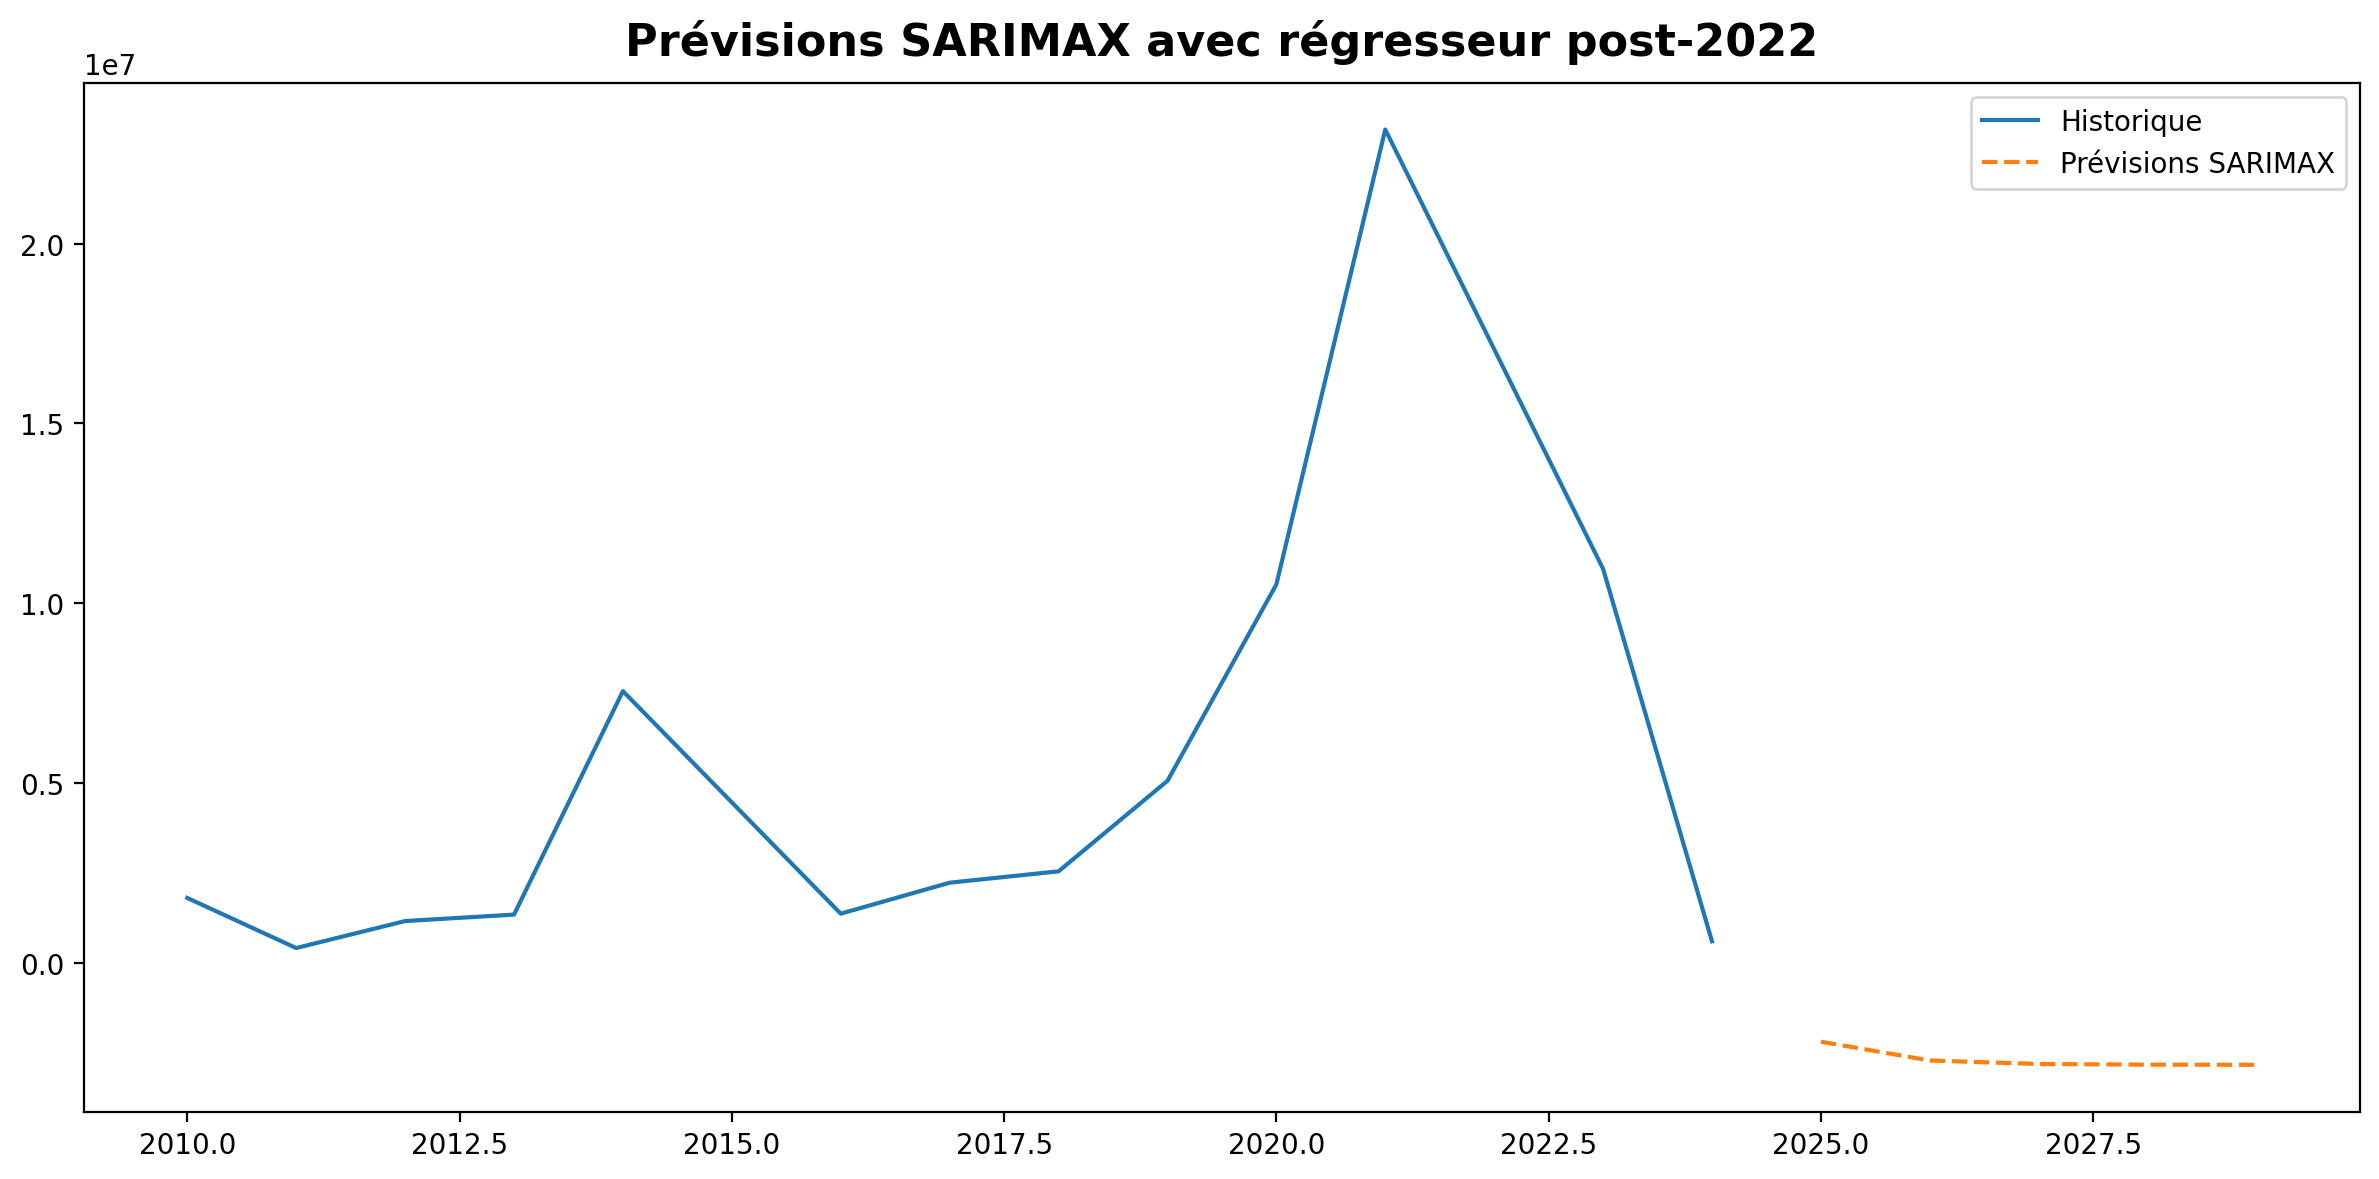

In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajout d'une variable indicatrice pour le pic 2022
df_no_anomalies['post_2022'] = (df_no_anomalies.index > 2022).astype(int)

# Modèle SARIMAX(1,1,1) avec régresseur externe
model_sarimax = SARIMAX(
    df_no_anomalies['Value'],
    exog=df_no_anomalies['post_2022'],
    order=(1,1,1)
)
results_sarimax = model_sarimax.fit()

# Prévisions avec extension de la variable exogène
future_exog = pd.DataFrame({'post_2022': [1]*6}, index=range(2025, 2031))
forecast_sarimax = results_sarimax.forecast(steps=6, exog=future_exog)

# Visualisation
plt.figure(figsize=(12,6))

forecast_index = range(df_no_anomalies.index[-1] + 1, df_no_anomalies.index[-1] + 1 + forecast_years)
plt.plot(df_no_anomalies.index, df_no_anomalies['Value'], label='Historique')
plt.plot(forecast_index, forecast, label='Prévisions SARIMAX', linestyle='--')
plt.title('Prévisions SARIMAX avec régresseur post-2022')
plt.legend()
plt.show()




In [65]:
!pip install numpy==1.26.4
!pip install pmdarima

from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=417.574, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=410.226, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=417.484, Time=0.74 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=409.709, Time=0.39 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=411.633, Time=0.79 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=412.107, Time=0.78 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=410.023, Time=1.70 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=413.401, Time=2.48 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=410.607, Time=0.55 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0]          
Total fit time: 9.594 seconds
Meilleurs paramètres ARIMA: (2, 0, 0)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                   12
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -201.087
Date:                Mon, 15 Dec 2025   AIC                            410.175
Time:                        00:13:11   BIC                            412.114
Sample:                             0   HQIC                           409.457
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.146e+06   3.97e-08    1.3e+14      0.000    5.15e+06    5.15e+06
ar.L1          1.2813      0.283      4.528      0.000       0.727       1.836
ar.L2         -0.5657      0.525     -1.077      0.2

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


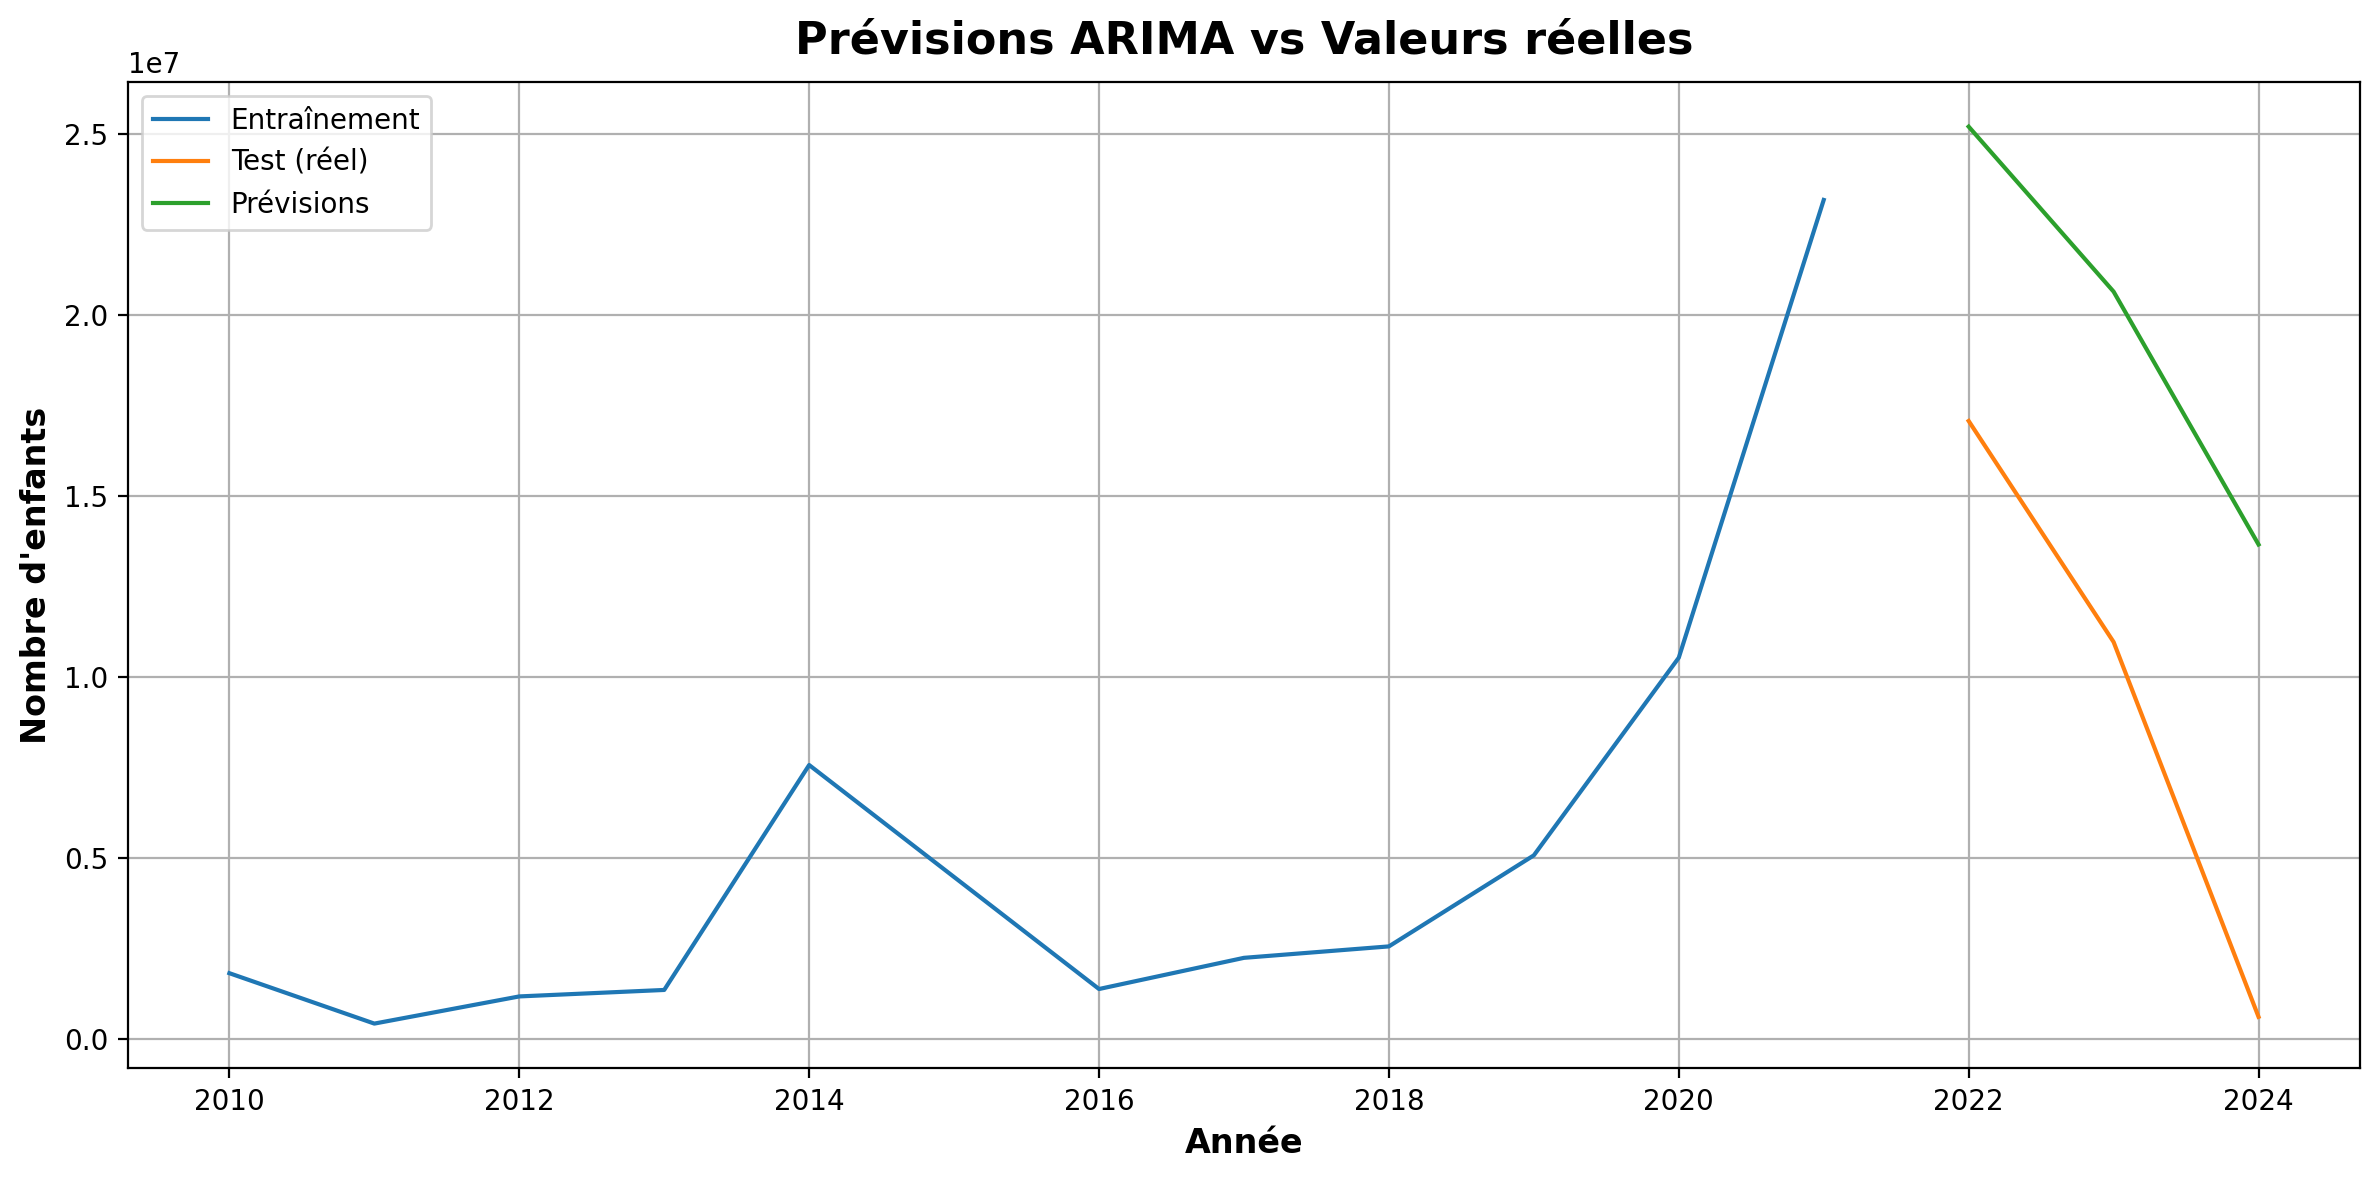

In [66]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

# Division en ensembles d'entraînement et de test
train_size = int(len(df_no_anomalies) * 0.8)
train, test = df_no_anomalies.iloc[:train_size], df_no_anomalies.iloc[train_size:]

# Détermination automatique des paramètres p, d, q
from pmdarima import auto_arima

# Recherche automatique des meilleurs paramètres
model_auto = auto_arima(train['Value'], seasonal=False, stepwise=True,
                         trace=True, error_action='ignore', suppress_warnings=True)
print(f"Meilleurs paramètres ARIMA: {model_auto.order}")


p, d, q = model_auto.order
model = ARIMA(train['Value'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

# Prévisions sur l'ensemble de test
predictions = model_fit.forecast(steps=len(test))

# Évaluation du modèle
mse = mean_squared_error(test['Value'], predictions)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test['Value'], predictions)
mape = np.mean(np.abs((test['Value'] - predictions) / test['Value'])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Value'], label='Entraînement')
plt.plot(test.index, test['Value'], label='Test (réel)')
plt.plot(test.index, predictions, label='Prévisions')
plt.title('Prévisions ARIMA vs Valeurs réelles')
plt.ylabel('Nombre d\'enfants')
plt.xlabel('Année')
plt.legend()
plt.grid(True)
plt.show()


#Visualisation de l'evolution globale

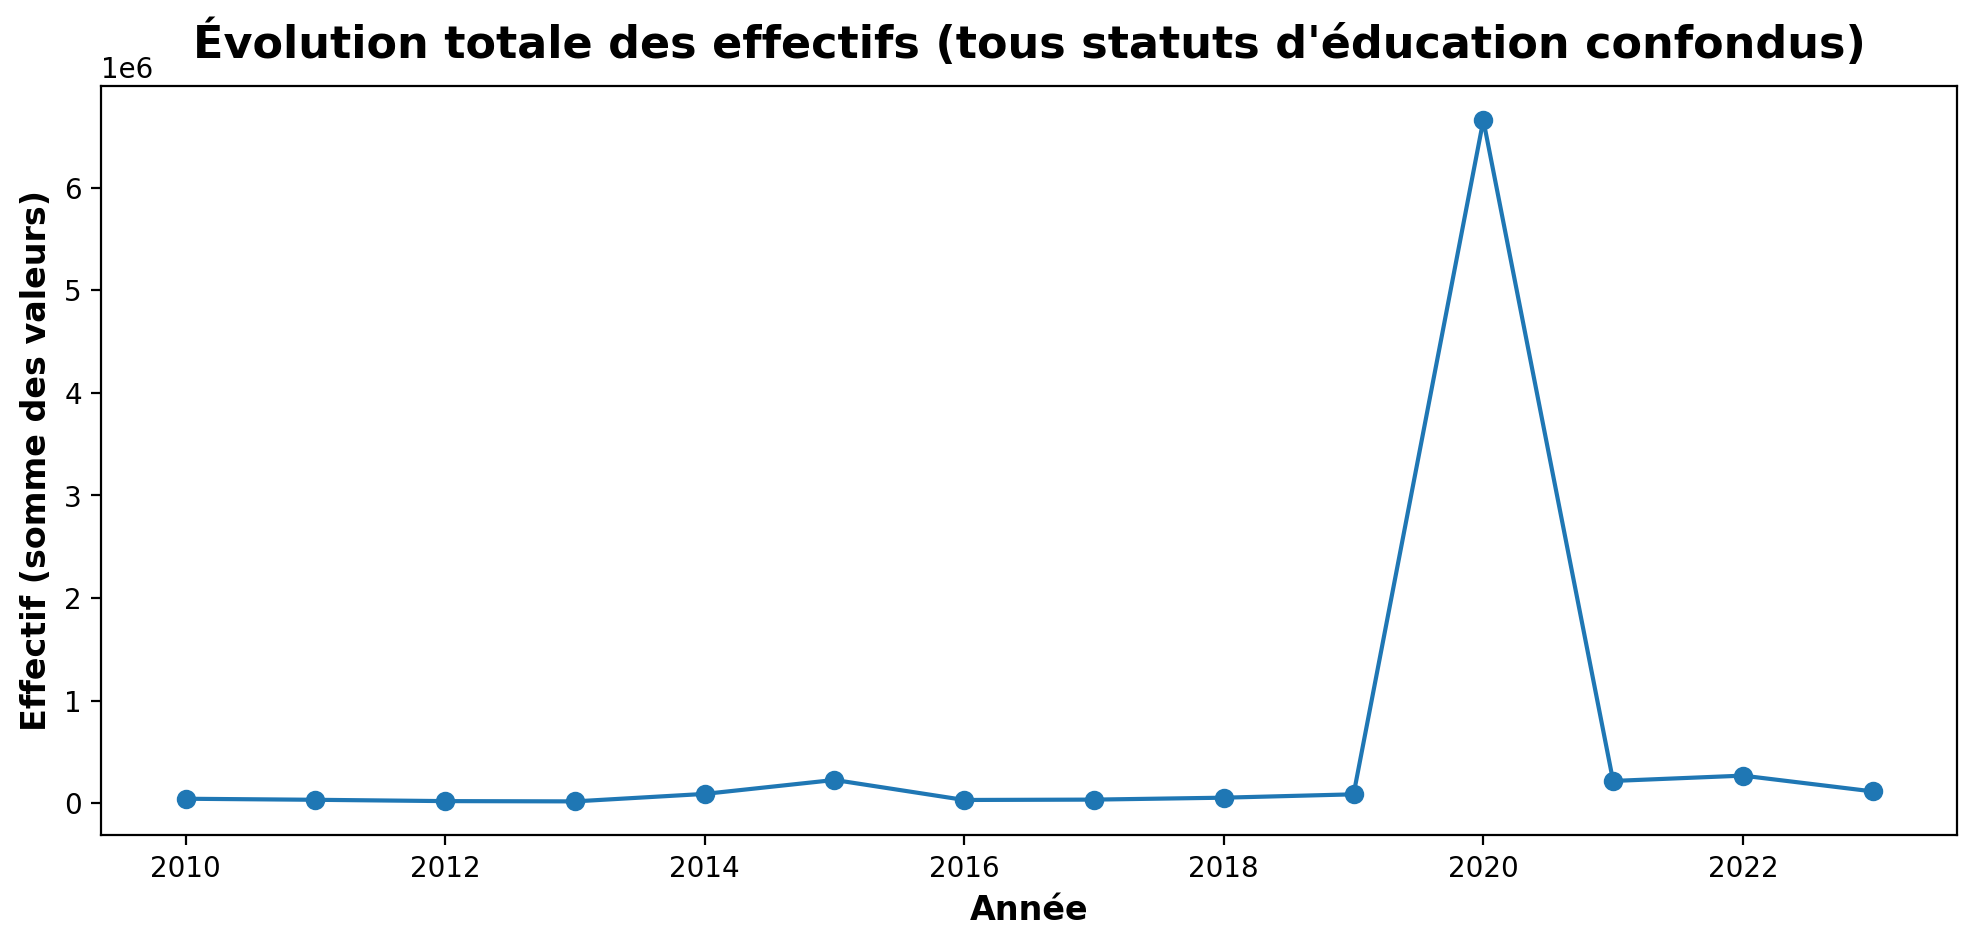

In [69]:
df = pd.read_csv(r"cleaned_data.csv")

# Nettoie les années et les données fiables
df['Year'] = pd.to_datetime(df['Year']).dt.year
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2023)]
df = df[df['Fiability_data'].isna()]

# Agréger par année
df_total = df.groupby('Year', as_index=False)['Value'].sum()

# Visualisation
plt.figure(figsize=(10,5))
plt.plot(df_total['Year'], df_total['Value'], marker='o')
plt.title("Évolution totale des effectifs (tous statuts d'éducation confondus)")
plt.xlabel("Année")
plt.ylabel("Effectif (somme des valeurs)")
plt.tight_layout()
plt.show()

# Visualisation de l'evolution selon education status dans le monde

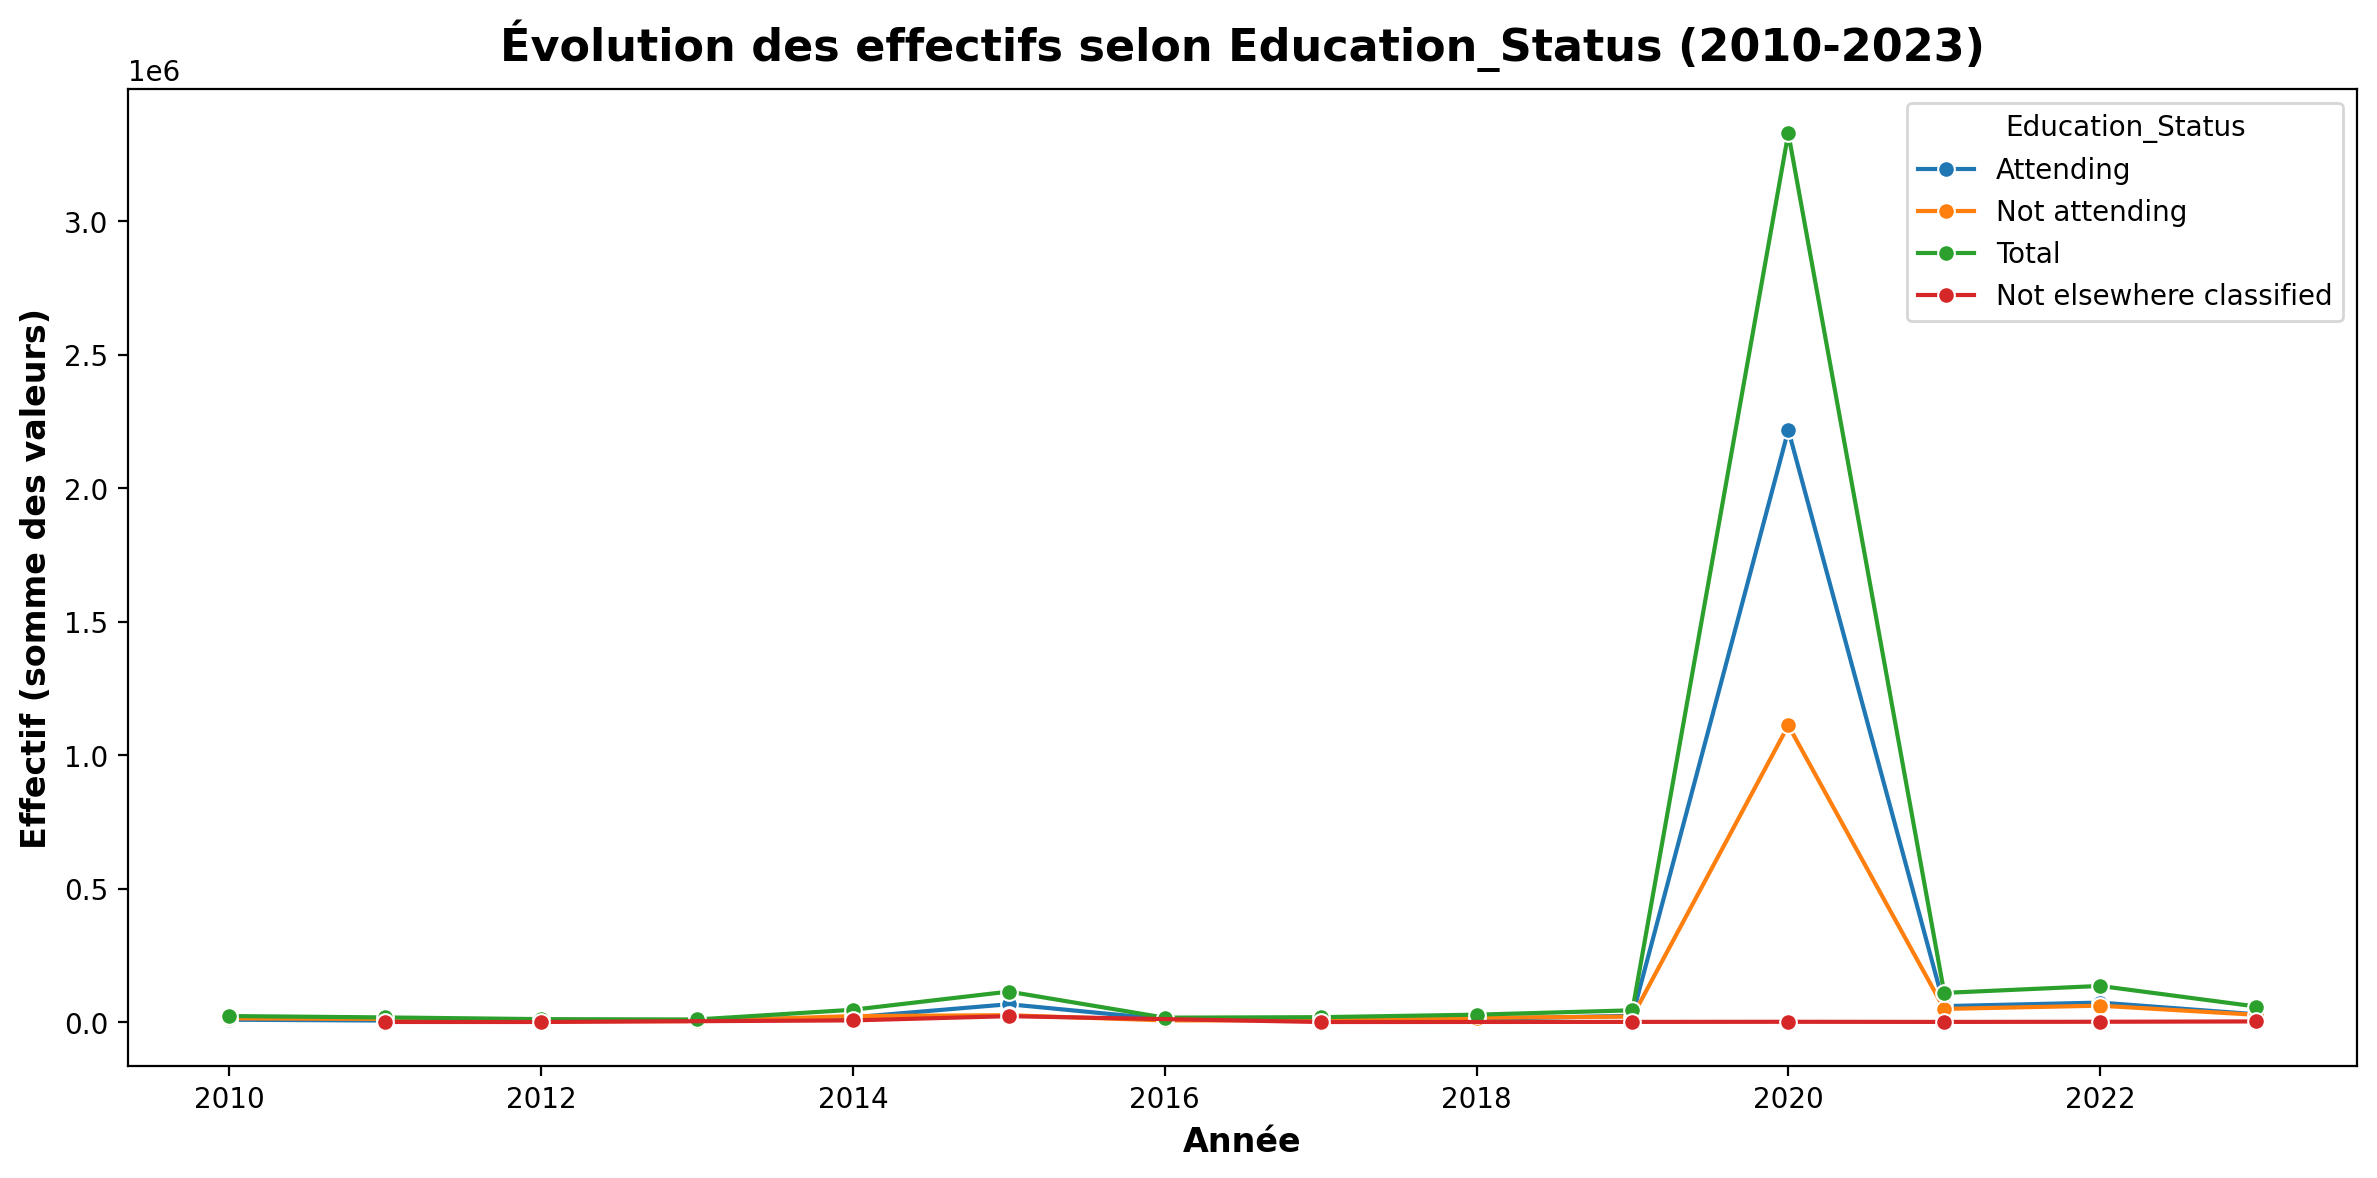

In [70]:

df = pd.read_csv(r"cleaned_data.csv")

df['Year'] = pd.to_datetime(df['Year']).dt.year
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2023)]
df = df[df['Fiability_data'].isna()]

# AGREGATION
df_grouped = df.groupby(['Year', 'Education_Status'], as_index=False)['Value'].sum()

# Visualisation
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_grouped,
    x='Year',
    y='Value',
    hue='Education_Status',
    marker='o'
)
plt.title("Évolution des effectifs selon Education_Status (2010-2023)")
plt.xlabel("Année")
plt.ylabel("Effectif (somme des valeurs)")
plt.legend(title="Education_Status")
plt.tight_layout()
plt.show()


#Visualisation selon le sexe


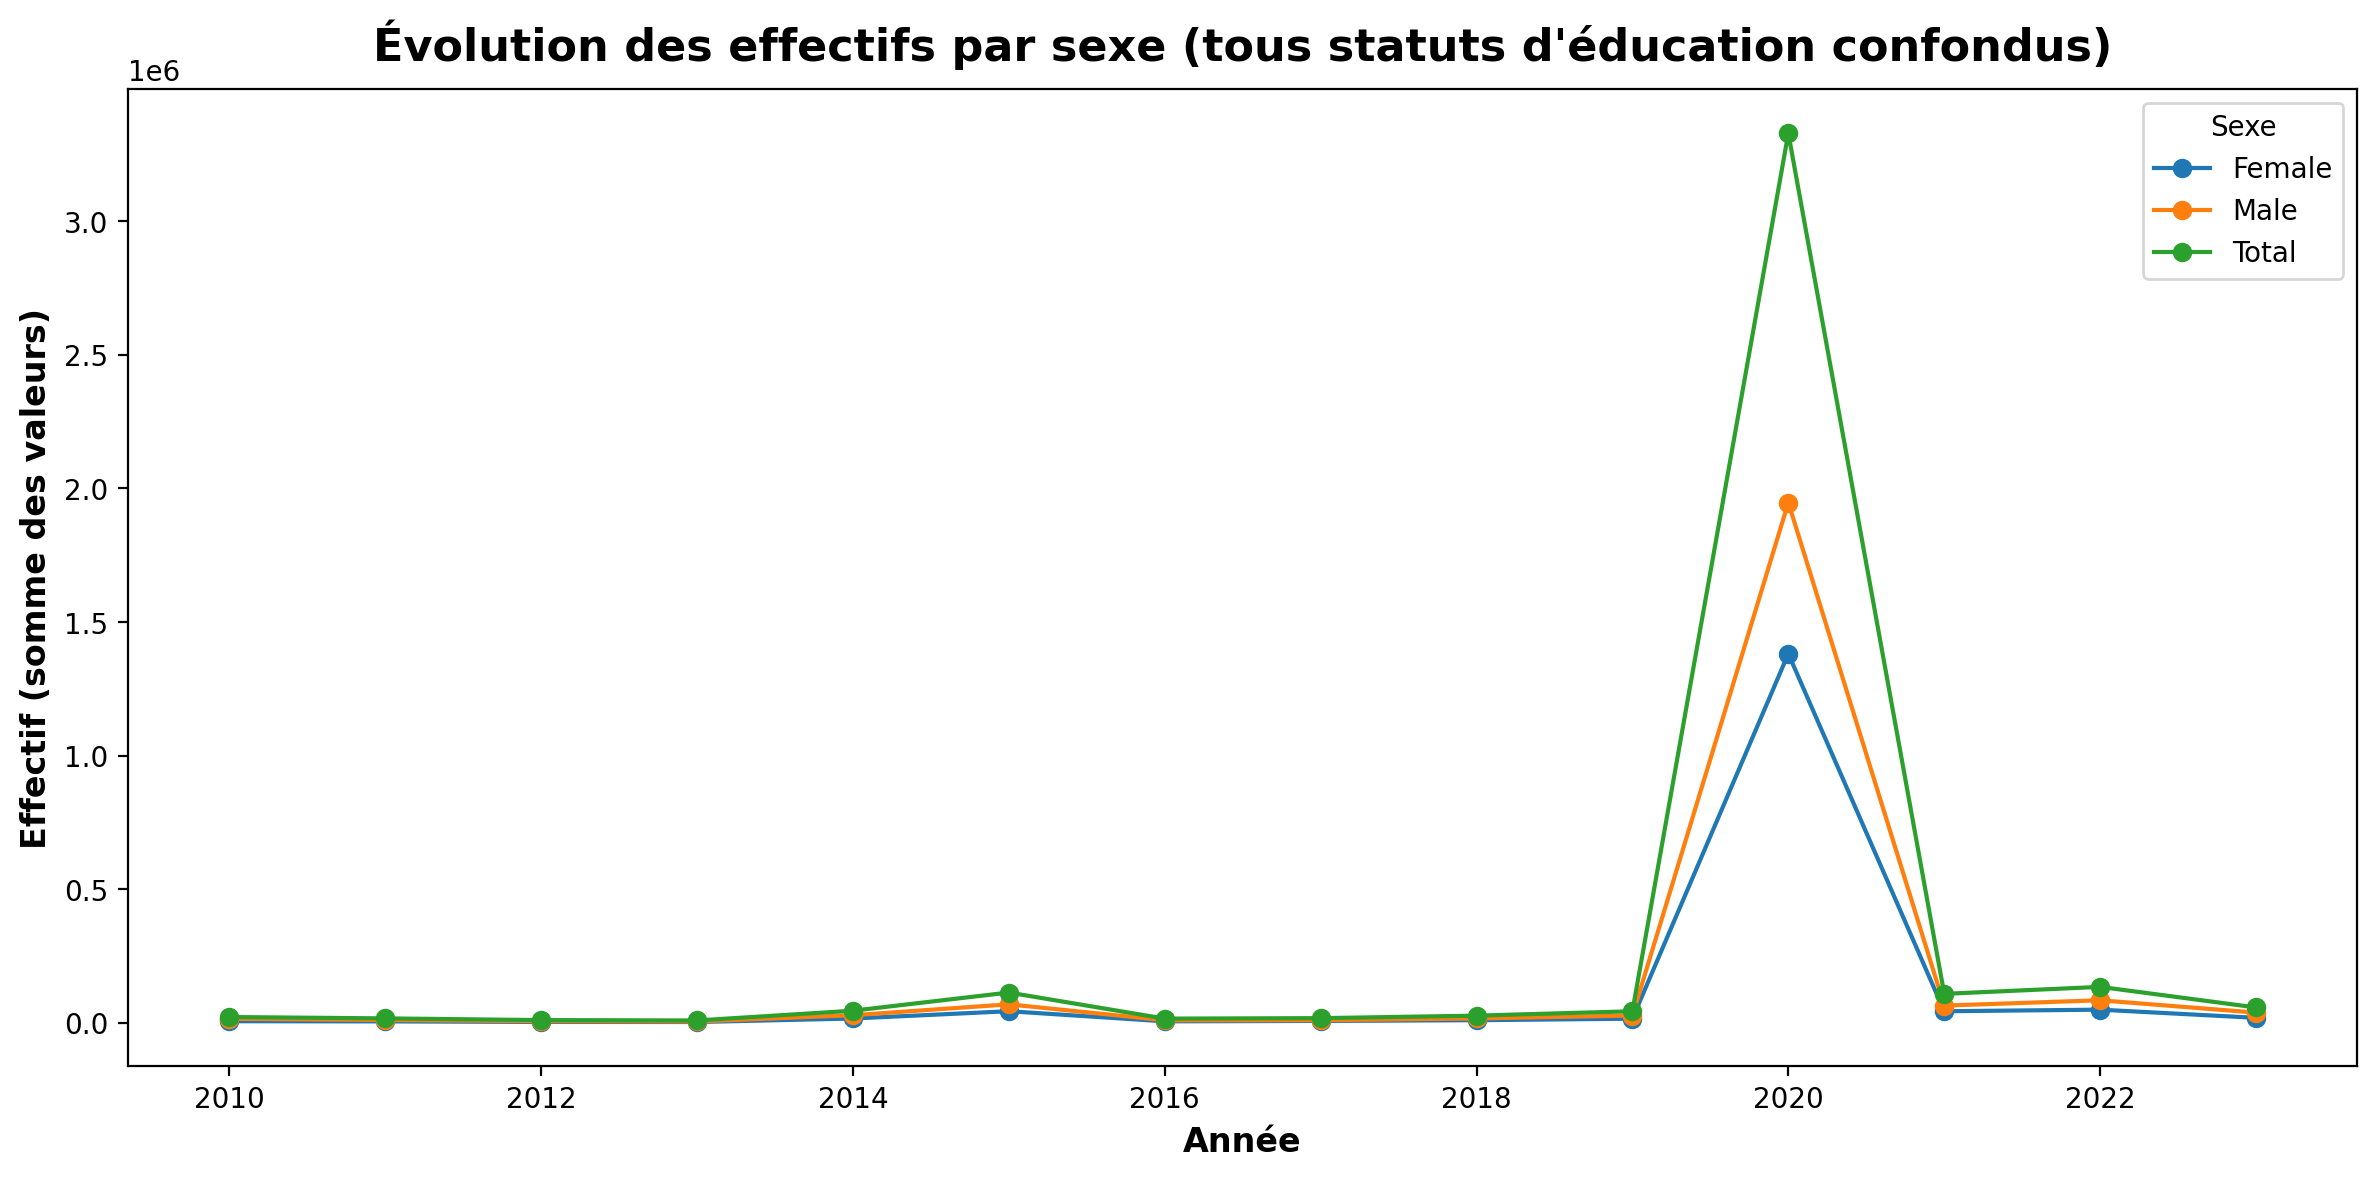

In [72]:
# Agréger par année et sexe
df_sex = df.groupby(['Year', 'Sex'], as_index=False)['Value'].sum()

plt.figure(figsize=(12,6))
for sex in df_sex['Sex'].unique():
    data = df_sex[df_sex['Sex'] == sex]
    plt.plot(data['Year'], data['Value'], marker='o', label=sex)

plt.title("Évolution des effectifs par sexe (tous statuts d'éducation confondus)")
plt.xlabel("Année")
plt.ylabel("Effectif (somme des valeurs)")
plt.legend(title="Sexe")
plt.tight_layout()
plt.show()

# Visualisation selon l'age

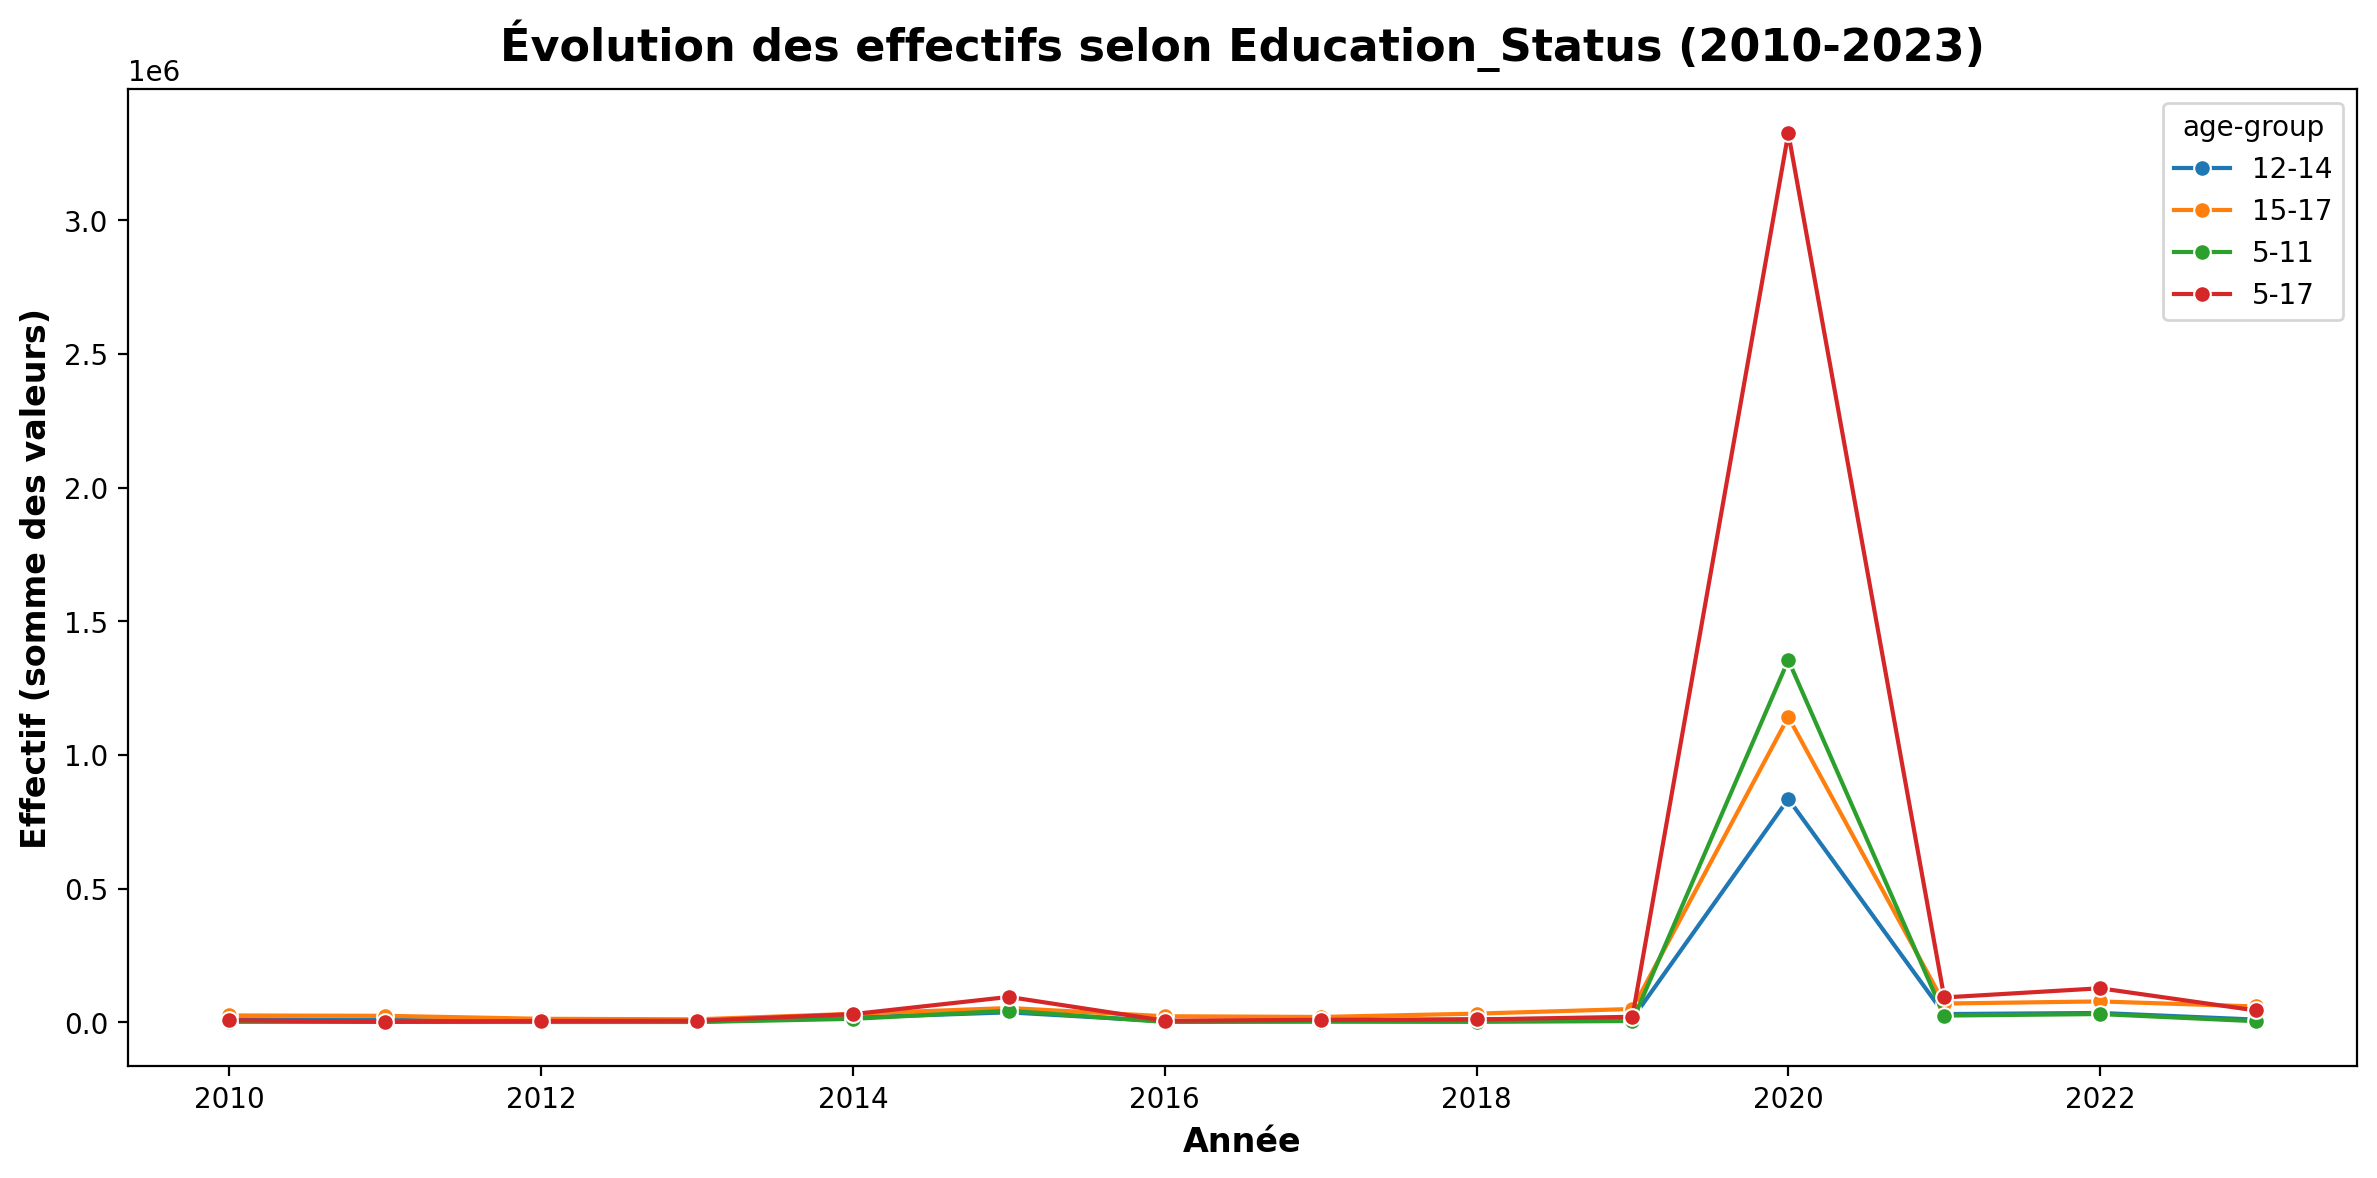

In [77]:

df = pd.read_csv(r"cleaned_data.csv")

df['Year'] = pd.to_datetime(df['Year']).dt.year
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2023)]
df = df[df['Fiability_data'].isna()]

df_grouped = df.groupby(['Year', 'Age_group'], as_index=False)['Value'].sum()

# Visualisation
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_grouped,
    x='Year',
    y='Value',
    hue='Age_group',
    marker='o'
)
plt.title("Évolution des effectifs selon Education_Status (2010-2023)")
plt.xlabel("Année")
plt.ylabel("Effectif (somme des valeurs)")
plt.legend(title="age-group")
plt.tight_layout()
plt.show()


# Visualisation selon pays

Country
Afghanistan                                                  [2014]
Africa                                                       [2020]
Albania           [2023, 2022, 2021, 2020, 2019, 2018, 2017, 201...
Americas                                                     [2020]
Angola                                           [2022, 2021, 2016]
                                        ...                        
Western Africa                                               [2020]
Western Asia                                                 [2020]
Western Europe                                               [2020]
World                                                        [2020]
Zambia                                     [2022, 2021, 2020, 2019]
Name: Year, Length: 115, dtype: object
['Albania' 'Egypt' 'Iran (Islamic Republic of)' 'Pakistan' 'Panama'
 'Romania' 'Switzerland' 'United States of America' 'Austria' 'Guatemala'
 'Malawi' 'Chile' 'Colombia' 'Niger' 'Costa Rica' 'Ecuador' 'So

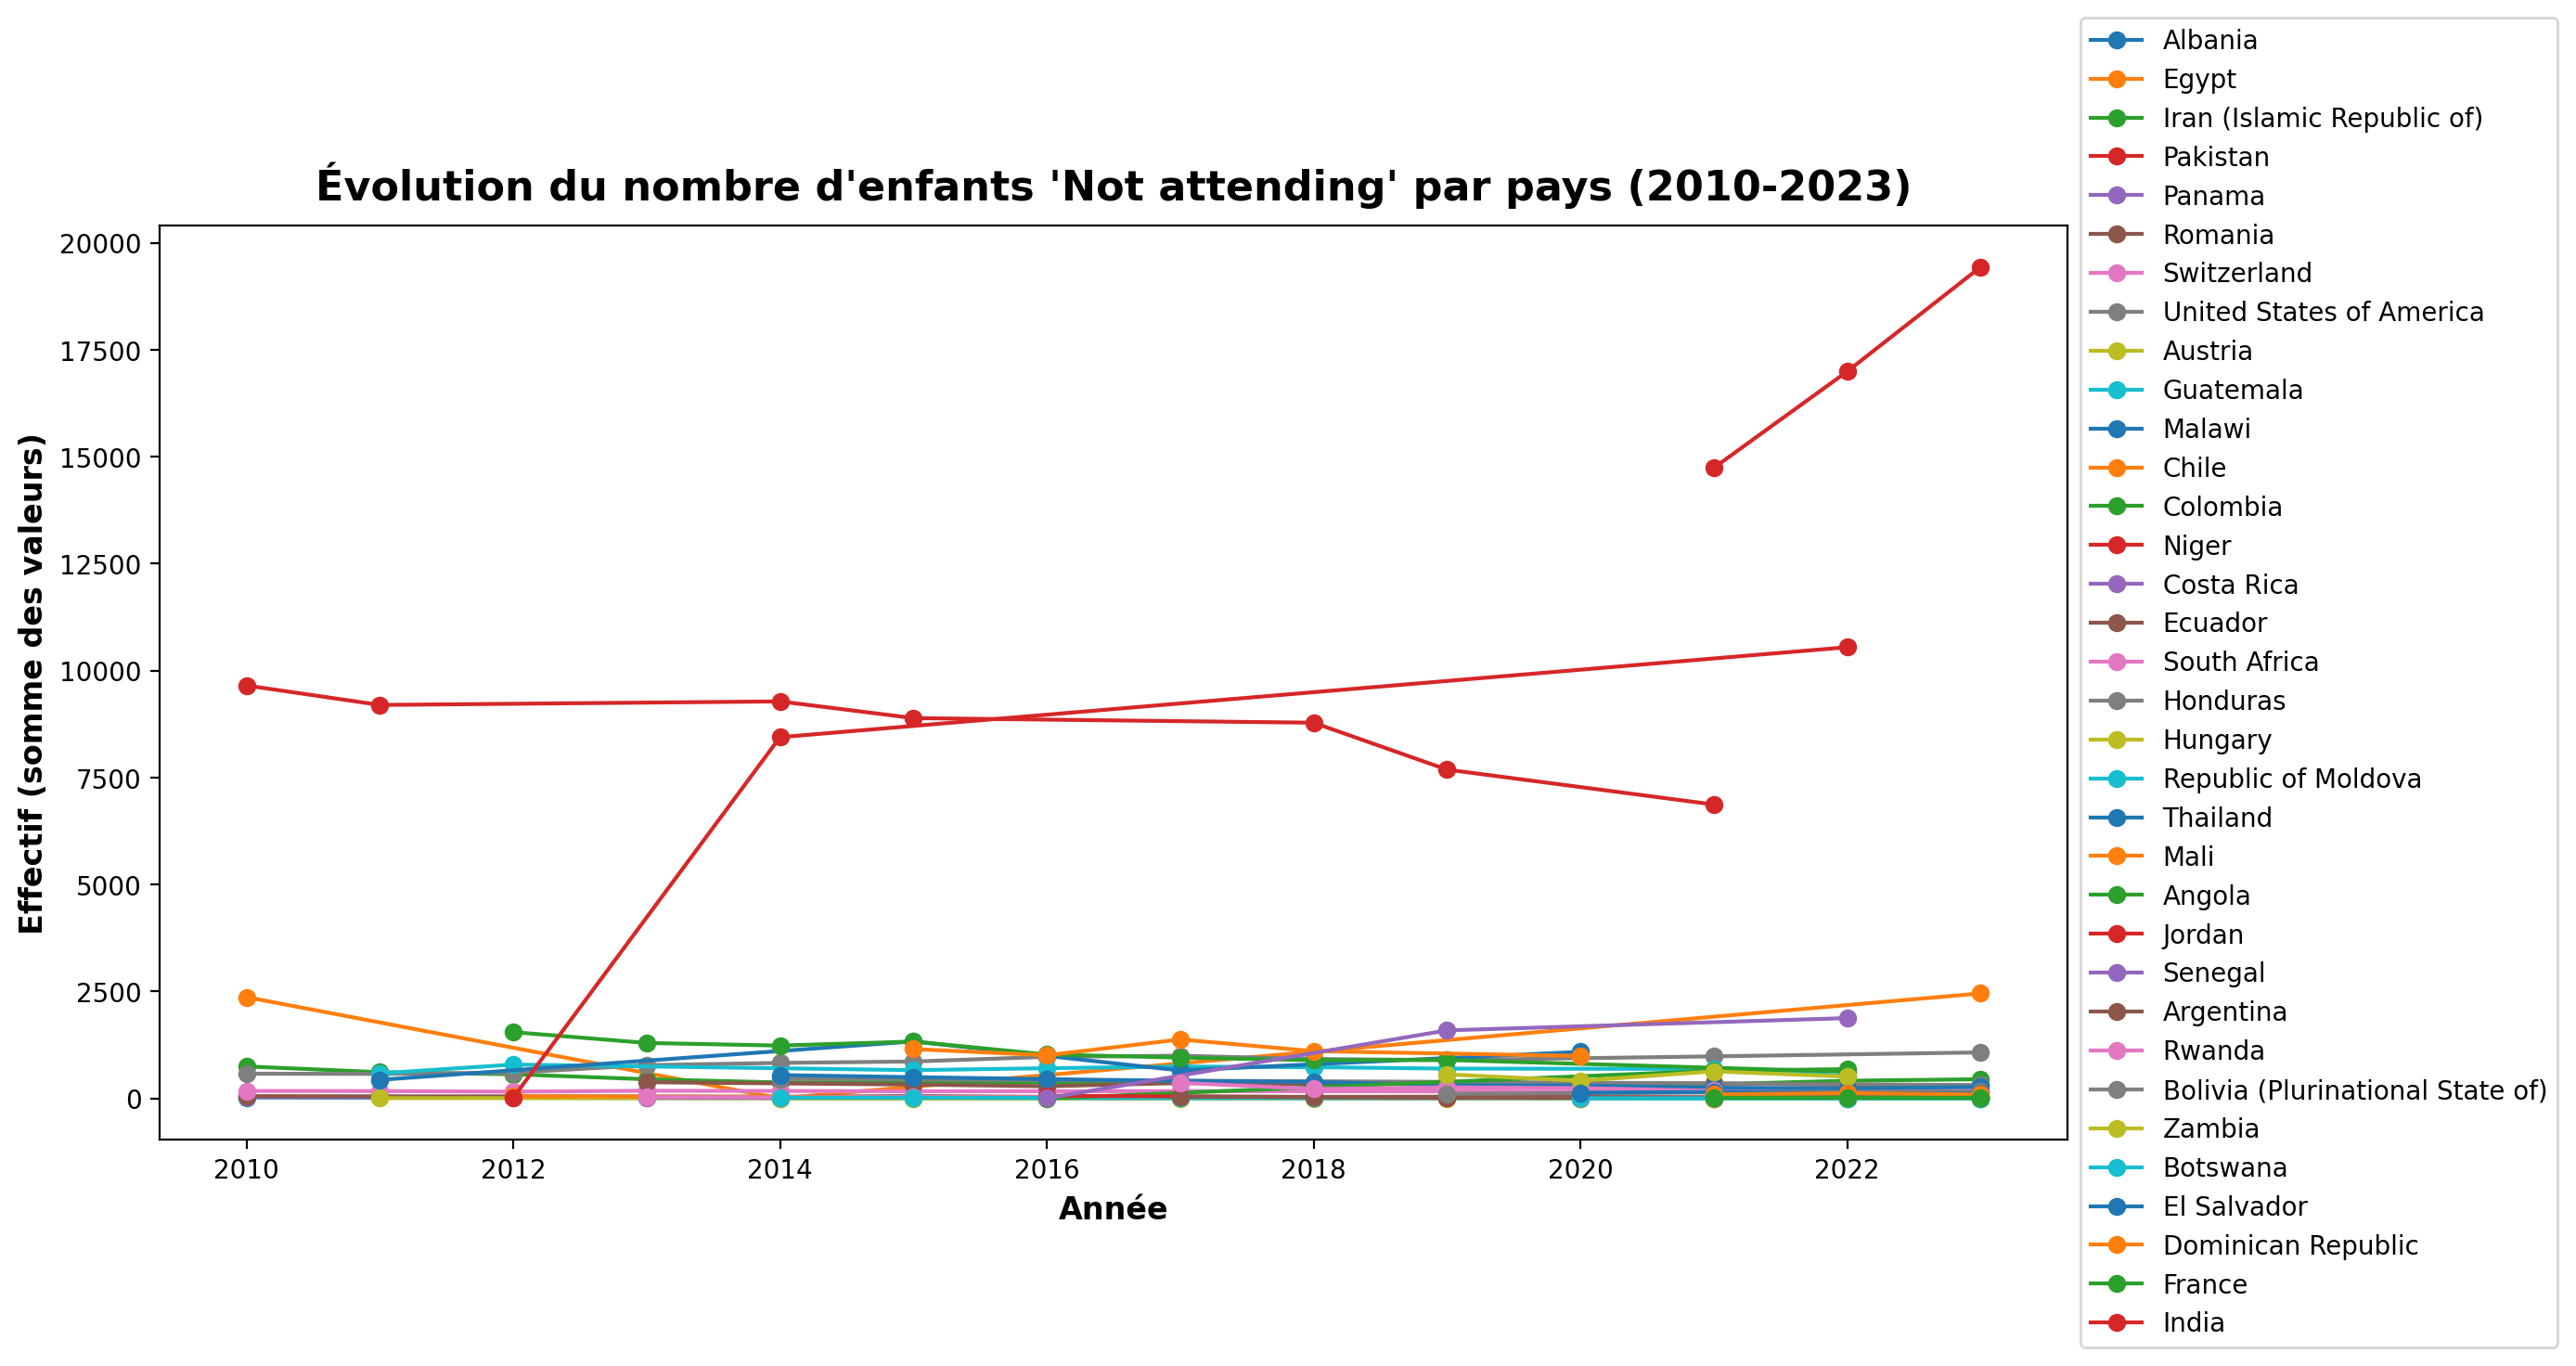

In [80]:

df = pd.read_csv(r"cleaned_data.csv")

df['Year'] = pd.to_datetime(df['Year']).dt.year
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2023)]
df = df[df['Fiability_data'].isna()]

status = "Not attending"
df_status = df[df['Education_Status'] == status]

df_grouped = df_status.groupby(['Year', 'Country'], as_index=False)['Value'].sum()

top_countries = (
    df_grouped.groupby('Country')['Value']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)
df_top = df_grouped[df_grouped['Country'].isin(top_countries)]
print(df_status.groupby('Country')['Year'].unique())

country_counts = df_status.groupby('Country')['Year'].nunique()
multi_year_countries = country_counts[country_counts >= 3].index
df_top = df_grouped[df_grouped['Country'].isin(multi_year_countries)]
print(df_top['Country'].unique())
# Visualisation
plt.figure(figsize=(14,7))
for country in df_top['Country'].unique():
    data = df_top[df_top['Country'] == country]
    if len(data) > 1:
        plt.plot(data['Year'], data['Value'], marker='o', label=country)


plt.title(f"Évolution du nombre d'enfants '{status}' par pays (2010-2023)")
plt.xlabel("Année")
plt.ylabel("Effectif (somme des valeurs)")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()





Connexion a influxDB

In [85]:
!pip install influxdb-client

import influxdb_client
from influxdb_client.client.write_api import SYNCHRONOUS
from influxdb_client import WriteOptions
from influxdb_client import InfluxDBClient, Point, WritePrecision



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.3/746.3 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.6/218.6 kB 8.0 MB/s eta 0:00:00


In [94]:
INFLUXDB_URL = "http://localhost:8088"
INFLUXDB_TOKEN = "KlMhSkSNp2q-qvRYv_0g3diQ5TTJCIX7022xJvLkHb5MnKrbKxjXM1ldSJNnUUZ0aNoddR2IdeHZEP2a37BZWA=="
INFLUXDB_ORG = "uha"
INFLUXDB_BUCKET = "projet"


client = InfluxDBClient(
    url=INFLUXDB_URL,
    token=INFLUXDB_TOKEN,
    org=INFLUXDB_ORG
)
write_api = client.write_api(write_options=SYNCHRONOUS)

df = pd.read_csv("cleaned_data.csv")

df['Year'] = pd.to_datetime(df['Year'], errors='coerce')


df = df.dropna(subset=['Year', 'Value', 'Country', 'Sex', 'Age_group'])


for _, row in df.iterrows():
    point = (
        Point("Child_labour")
        .tag("Country", row["Country"])
        .tag("Sex", row["Sex"])
        .tag("Age_group", row["Age_group"])
        .field("Value", float(row["Value"]))
        .time(row["Year"], WritePrecision.NS)
    )
    write_api.write(bucket=INFLUXDB_BUCKET, org=INFLUXDB_ORG, record=point)

print("Données envoyées avec succès à InfluxDB !")


NewConnectionError: <urllib3.connection.HTTPConnection object at 0x79eb686cbf50>: Failed to establish a new connection: [Errno 111] Connection refused

In [ ]:

df = pd.read_csv("cleaned_data.csv")
df["year"] = pd.to_datetime(df["year"])

df_subset = df[(df["country"] == "Argentina") & (df["age_group"] == "15-17")& (df["Education_Status"] == "Not attending")]


df_fiable = df_subset[~df_subset["Fiability_data"].isin(["Unreliable", "Break in series"])]
df_non_fiable = df_subset[df_subset["Fiability_data"].isin(["Unreliable", "Break in series"])]

plt.figure(figsize=(10, 6))

# données fiables
plt.plot(df_fiable["year"], df_fiable["value"], label="Fiables", color="blue", marker="o")

# Donneés douteuses
plt.scatter(df_non_fiable["year"], df_non_fiable["value"],
            label="Données douteuses", color="red", marker="x", s=100)

plt.title("Évolution du travail des enfants (15-19 ans) - Algérie")
plt.xlabel("Année")
plt.ylabel("Valeur")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [96]:

df = pd.read_csv("cleaned_data.csv")
df["Year"] = pd.to_datetime(df["Year"]).dt.year


# Crée le DataFrame des données fiables
df_fiables = df[~df["Fiability_data"].isin(["Unreliable", "Break in series"])]

# Crée le DataFrame des données non fiable
df_non_fiables = df[df["Fiability_data"].isin(["Unreliable", "Break in series"])]

# Vérification
print("Nombre de lignes FIABLES :", len(df_fiables))
print("Nombre de lignes NON FIABLES :", len(df_non_fiables))


Nombre de lignes FIABLES : 6851
Nombre de lignes NON FIABLES : 1302


/tmp/ipython-input-2505394671.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_fiables = df_subset[~df["Fiability_data"].isin(["Unreliable", "Break in series"])]
/tmp/ipython-input-2505394671.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_non_fiables = df_subset[df["Fiability_data"].isin(["Unreliable", "Break in series"])]


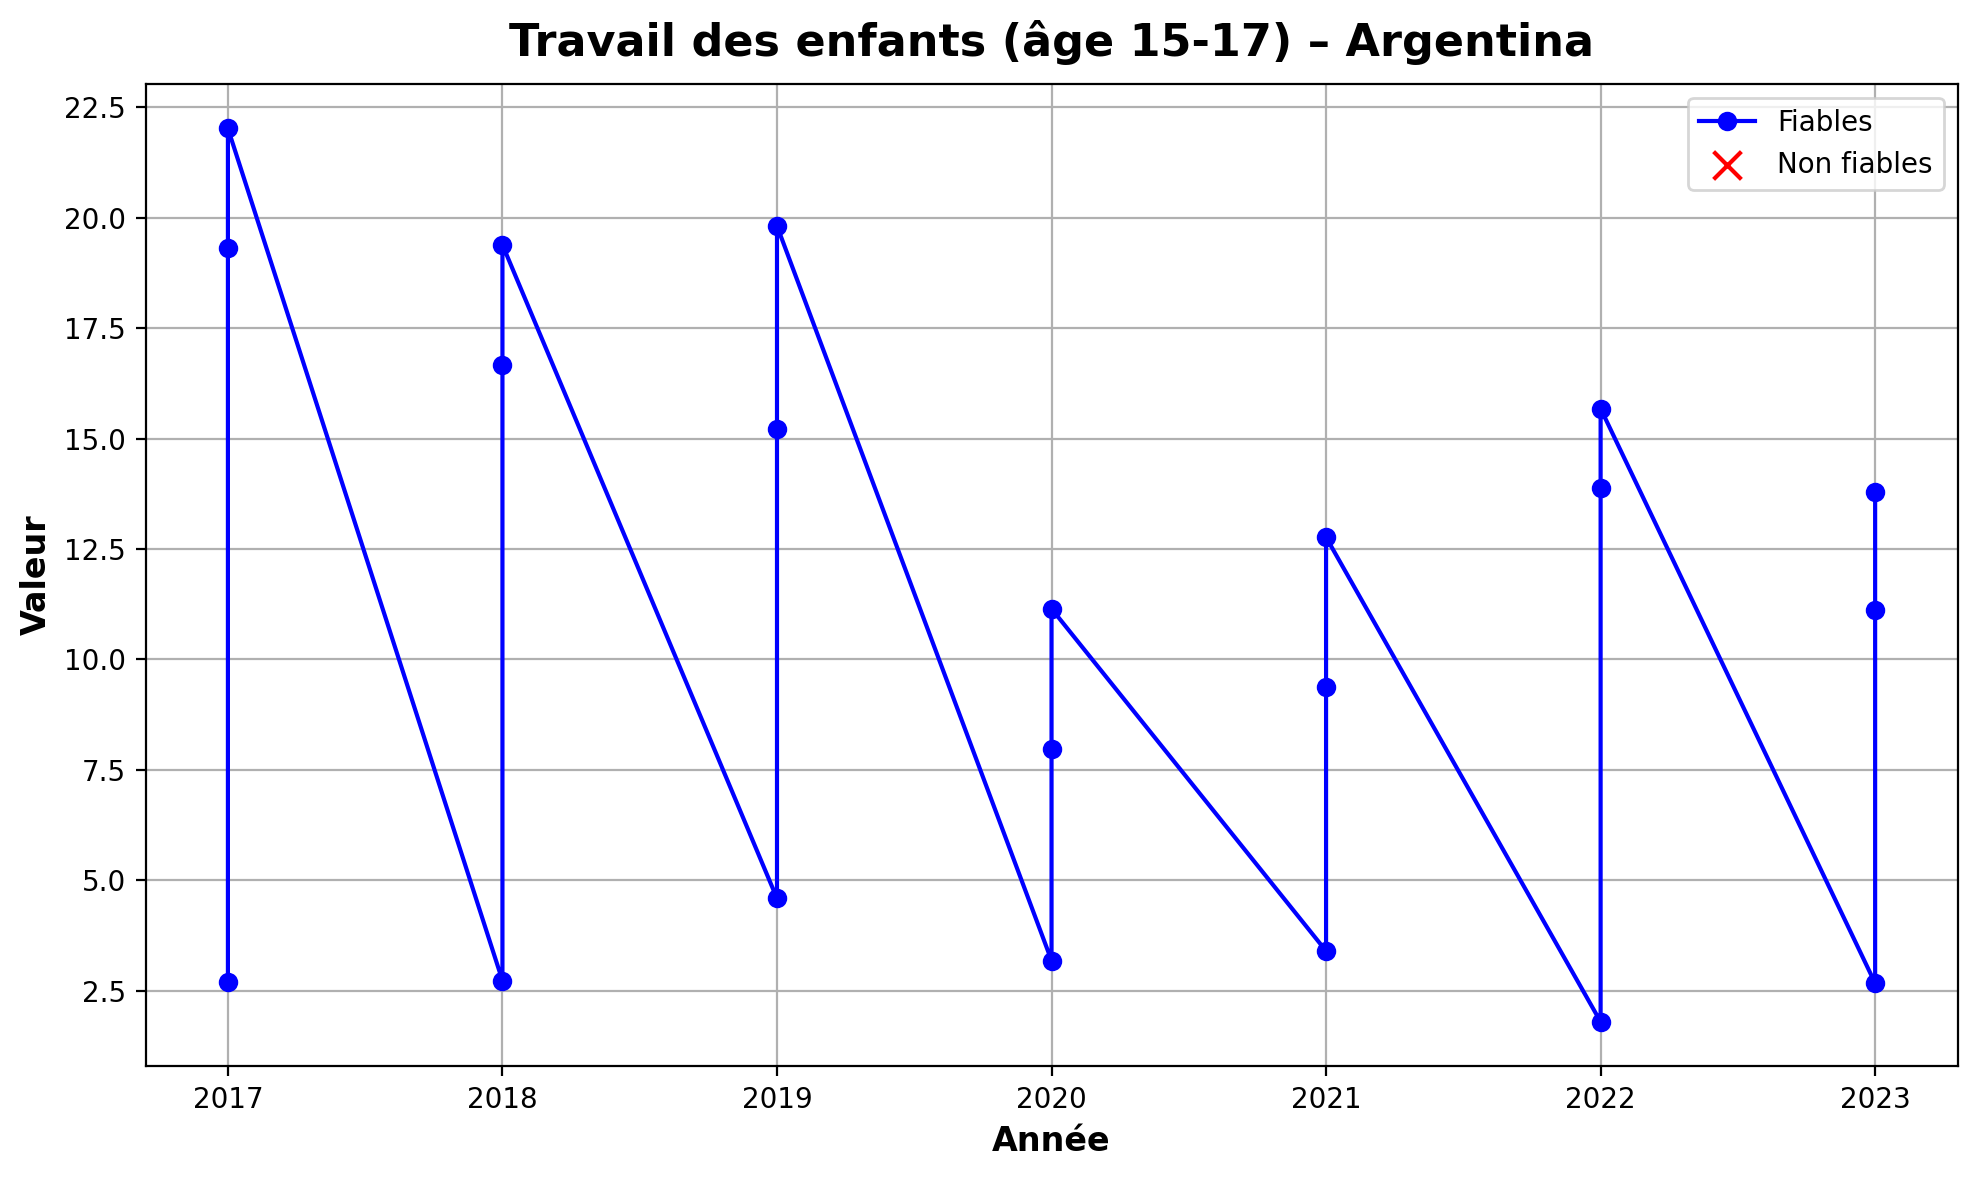

In [97]:


country = "Argentina"
age_group = "15-17"
Education="Not attending"
df_subset = df[(df["Country"] == country) & (df["Age_group"] == age_group)&( df["Education_Status"]==Education)]


df_fiables = df_subset[~df["Fiability_data"].isin(["Unreliable", "Break in series"])]

df_non_fiables = df_subset[df["Fiability_data"].isin(["Unreliable", "Break in series"])]

plt.figure(figsize=(10, 6))

plt.plot(df_fiables["Year"], df_fiables["Value"], label="Fiables", color="blue", marker="o")

# Points NON fiable
plt.scatter(df_non_fiables["Year"], df_non_fiables["Value"],
            label="Non fiables", color="red", marker="x", s=100)

plt.title(f"Travail des enfants (âge {age_group}) – {country}")
plt.xlabel("Année")
plt.ylabel("Valeur")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


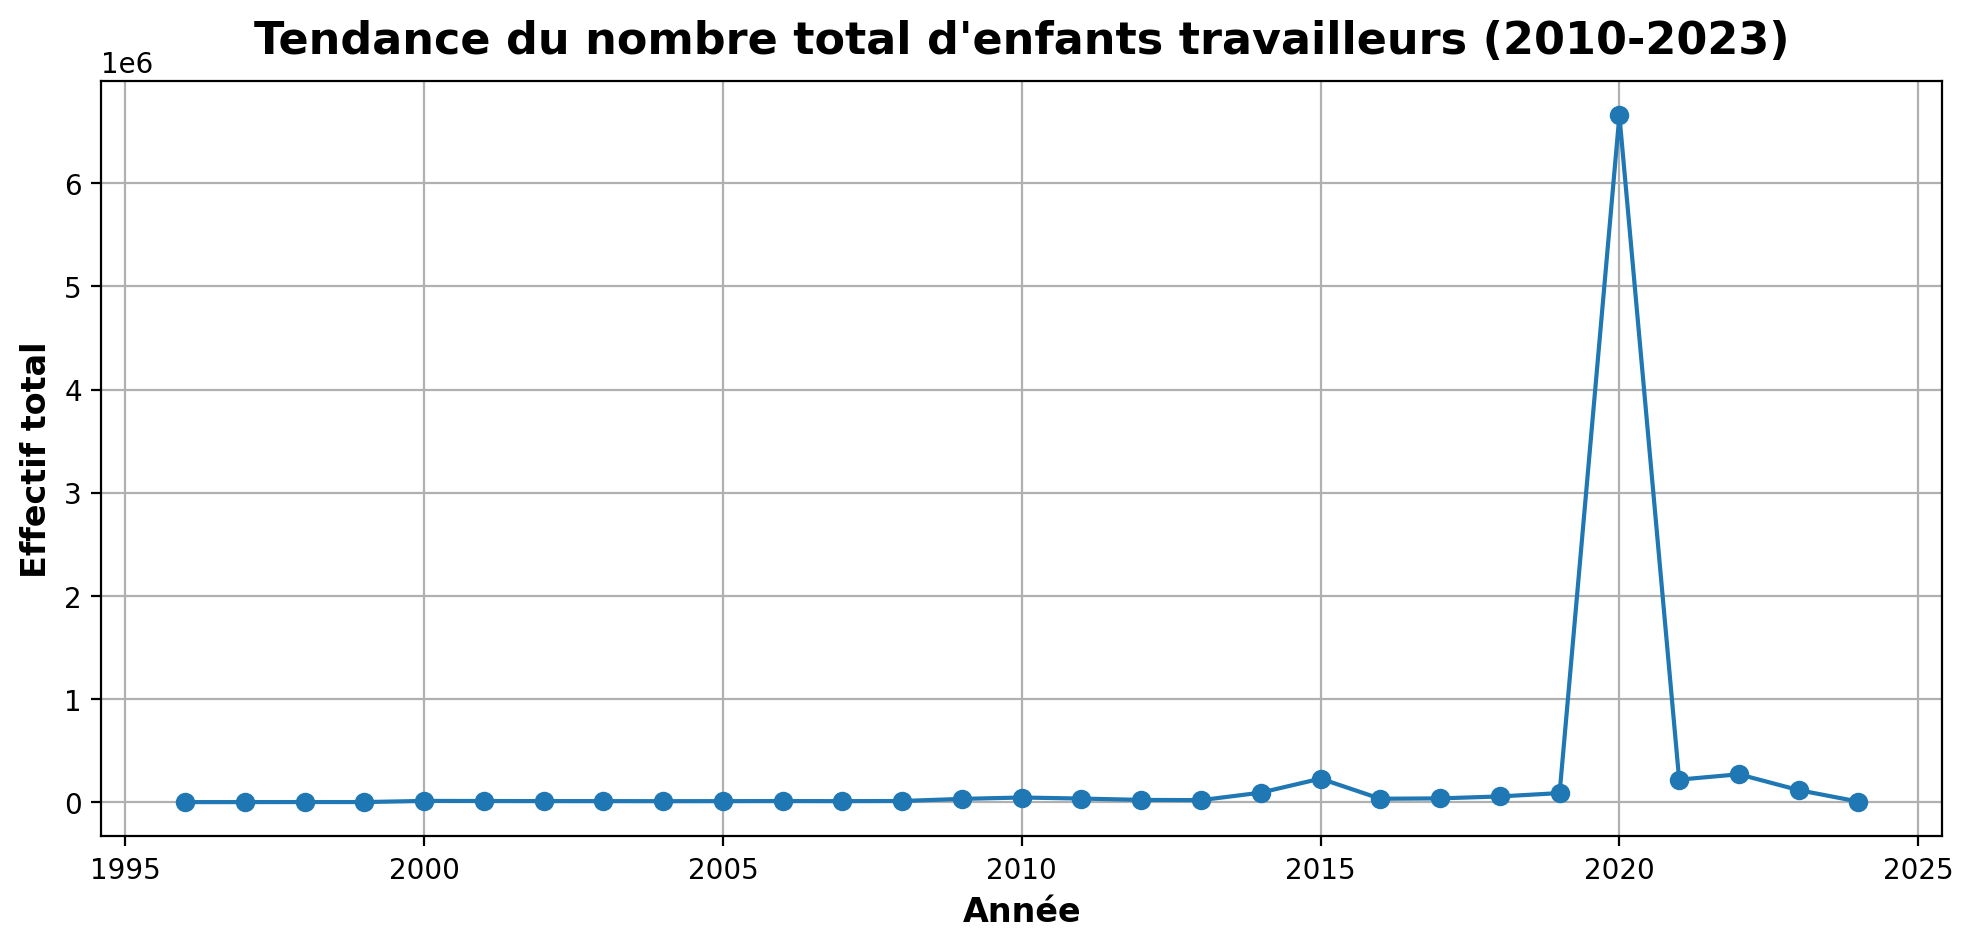

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Données nettoyées
df = pd.read_csv("cleaned_data.csv")
df['Year'] = pd.to_datetime(df['Year']).dt.year
df = df[df['Fiability_data'].isna()]  # Garder les données fiables

# Agréger par année
df_total = df.groupby('Year', as_index=False)['Value'].sum()

# Visualisation de la tendance
plt.figure(figsize=(10,5))
plt.plot(df_total['Year'], df_total['Value'], marker='o')
plt.title("Tendance du nombre total d'enfants travailleurs (2010-2023)")
plt.xlabel("Année")
plt.ylabel("Effectif total")
plt.grid(True)
plt.tight_layout()
plt.show()


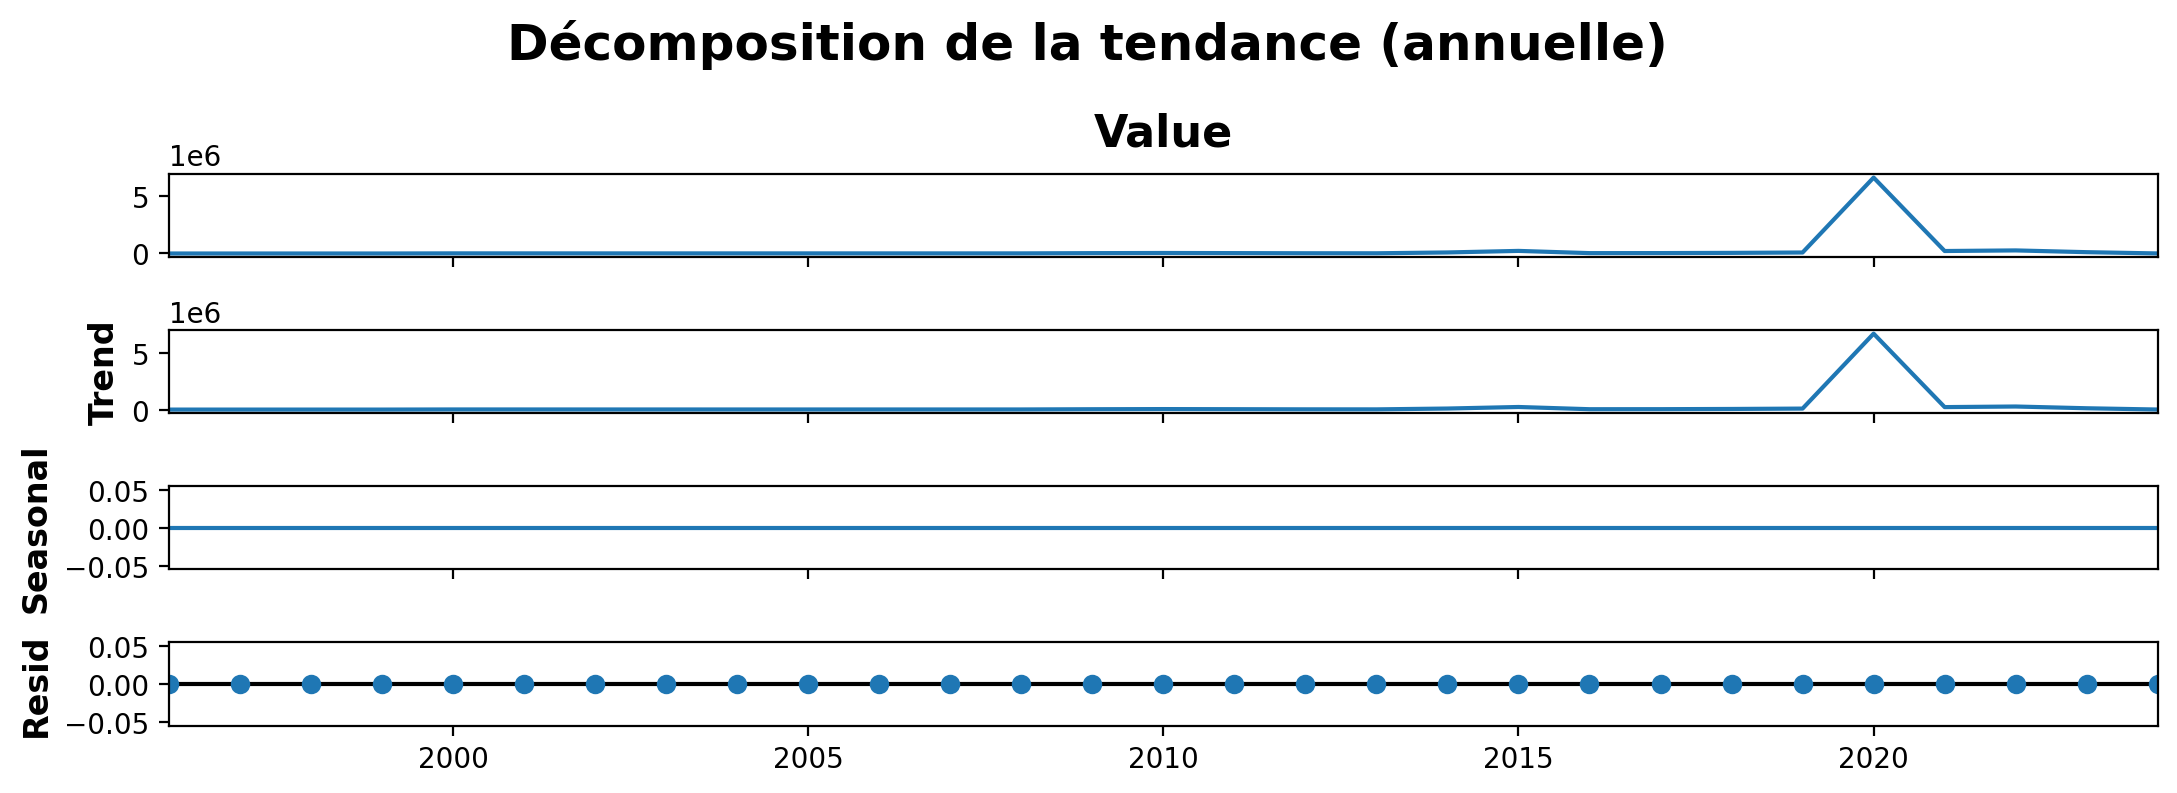

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Pour des données annuelles
df_total.set_index('Year', inplace=True)
result = seasonal_decompose(df_total['Value'], model='additive', period=1)  # period=1 pour annuel

result.plot()
plt.suptitle("Décomposition de la tendance (annuelle)")
plt.tight_layout()
plt.show()


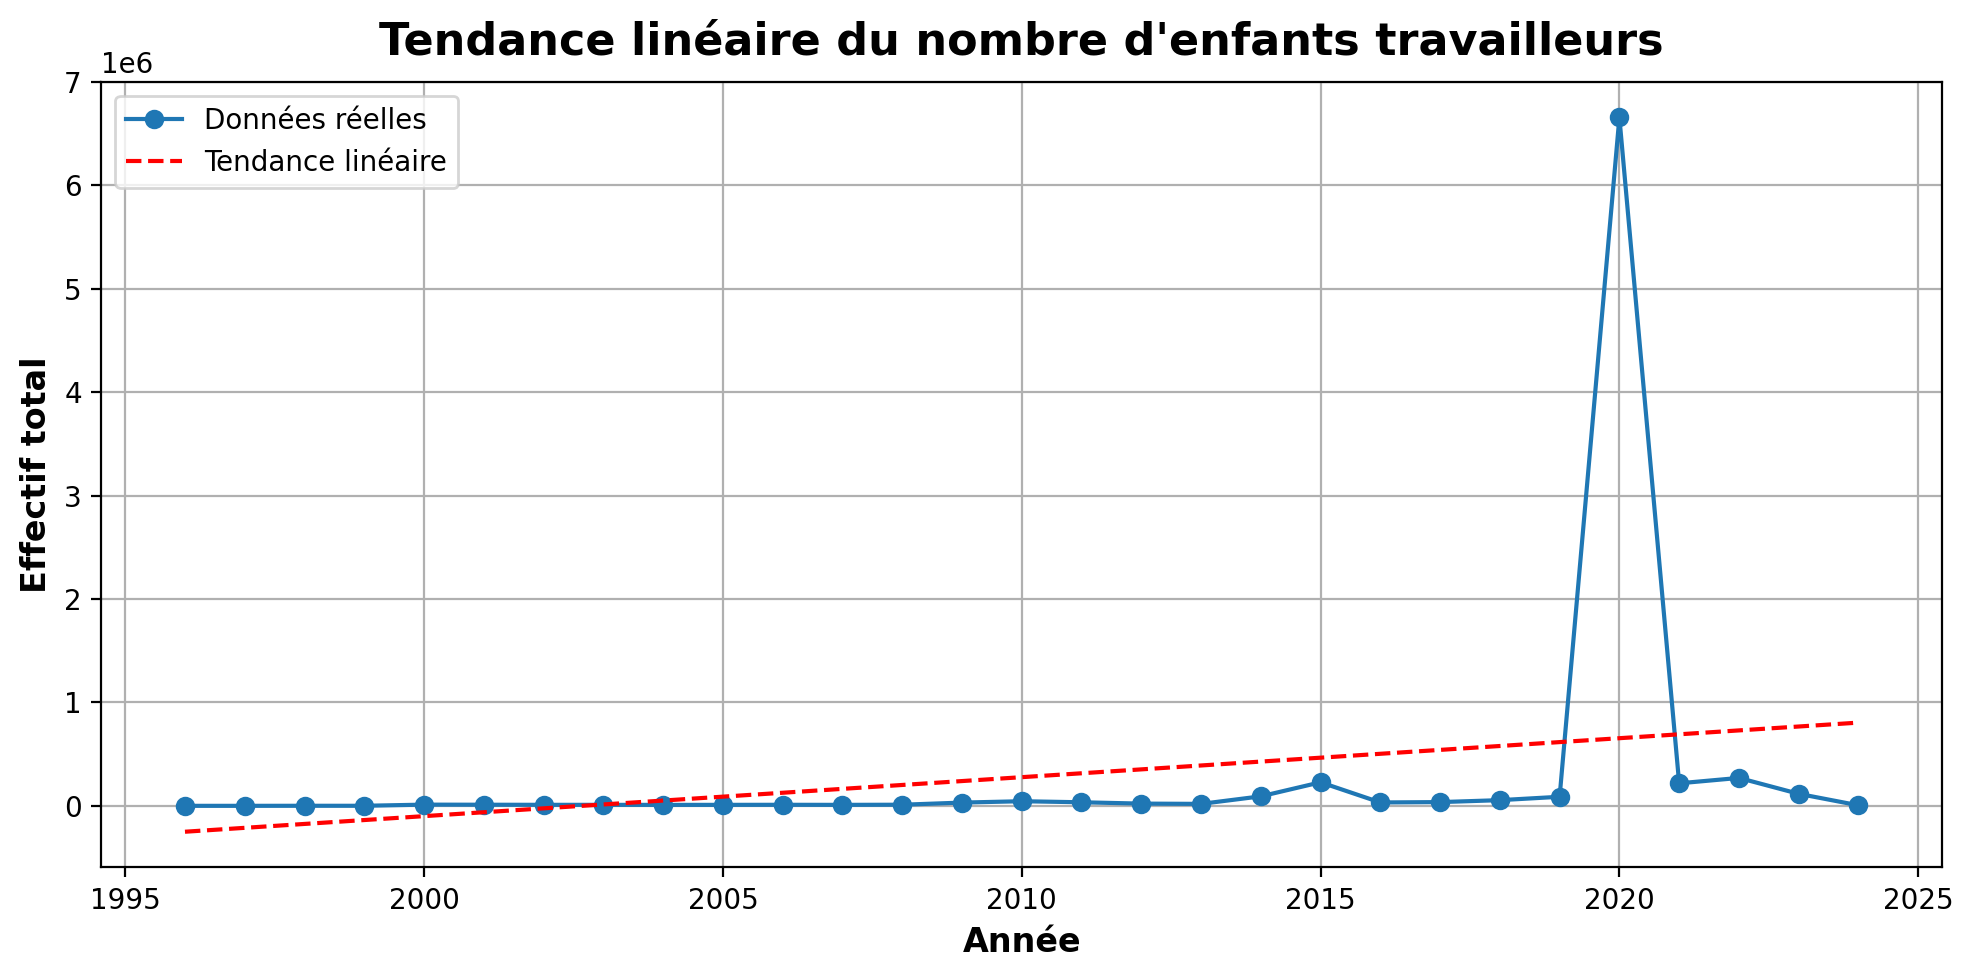

In [101]:
from sklearn.linear_model import LinearRegression

X = df_total.index.values.reshape(-1, 1)
y = df_total['Value'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10,5))
plt.plot(df_total.index, df_total['Value'], marker='o', label='Données réelles')
plt.plot(df_total.index, y_pred, color='red', linestyle='--', label='Tendance linéaire')
plt.title("Tendance linéaire du nombre d'enfants travailleurs")
plt.xlabel("Année")
plt.ylabel("Effectif total")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


           Value
Year            
1996      15.288
1997      31.190
1998     569.298
1999     492.527
2000   11585.876
2001   10694.712
2002    9755.014
2003    9560.344
2004    9111.119
2005    9425.353
2006   10026.598
2007    9373.900
2008   10717.843
2009   31358.079
2010   44578.626
2011   34422.707
2012   21541.970
2013   18886.003
2014   91805.709
2015  227702.625
2016   32633.494
2017   36158.530
2018   54933.596
2019   87642.397
2021  217941.886
2022  269914.242
2023  116118.461
2024    4980.176


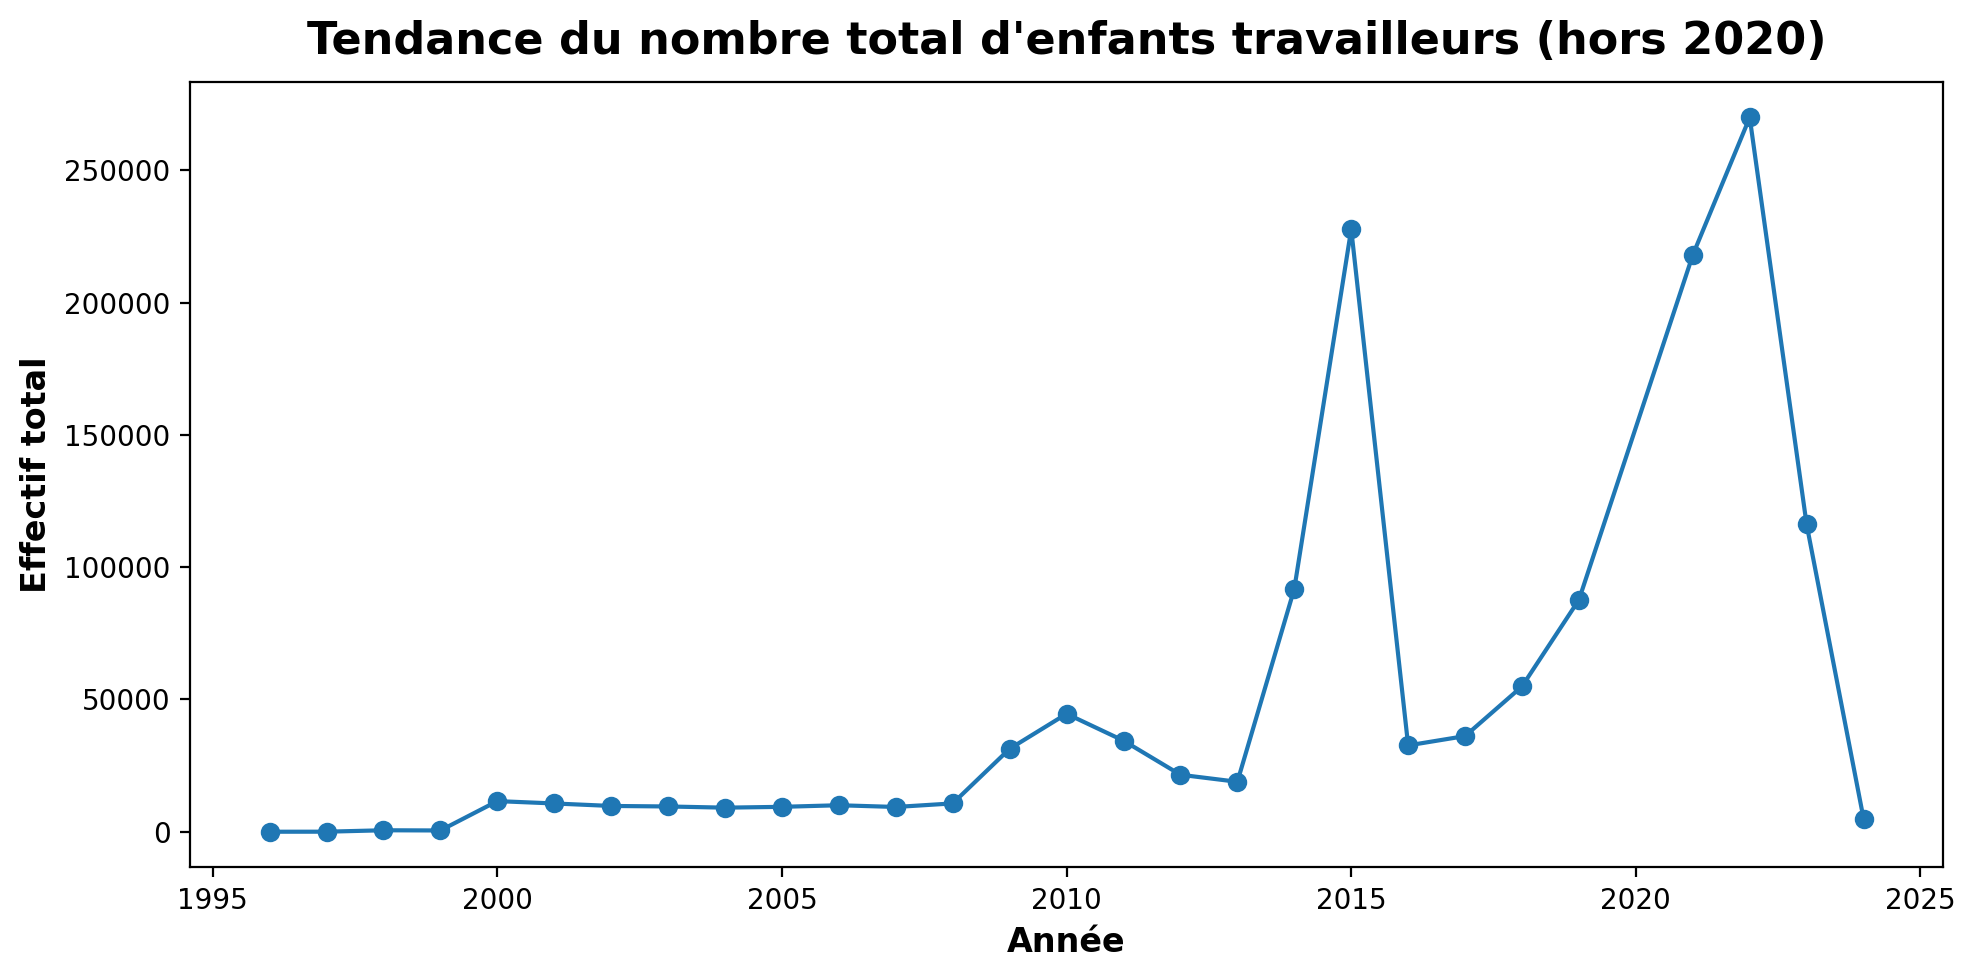

In [103]:
df_no2020 = df_total[df_total.index != 2020]
print(df_no2020)
plt.figure(figsize=(10,5))
plt.plot(df_no2020.index, df_no2020['Value'], marker='o')
plt.title("Tendance du nombre total d'enfants travailleurs (hors 2020)")
plt.xlabel("Année")
plt.ylabel("Effectif total")
plt.tight_layout()
plt.show()

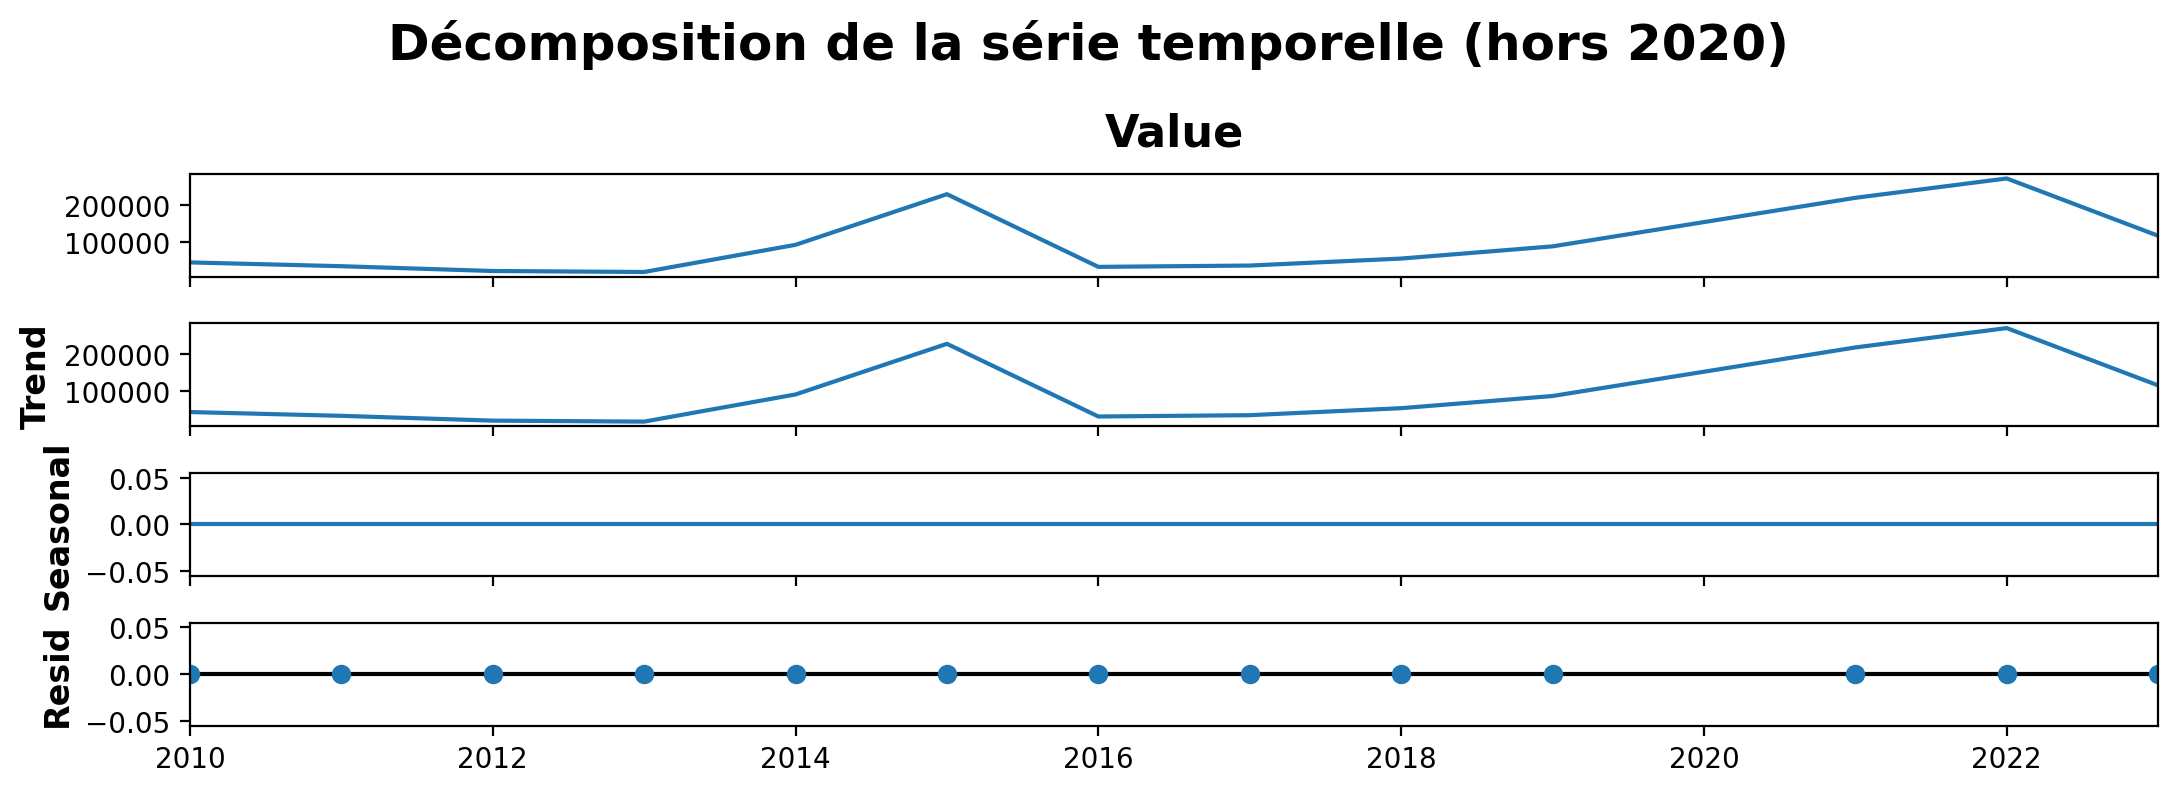

In [104]:

df = pd.read_csv("cleaned_data.csv")
df['Year'] = pd.to_datetime(df['Year']).dt.year
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2023)]
df = df[df['Fiability_data'].isna()]


df_total = df.groupby('Year', as_index=False)['Value'].sum()

# Exclure 2020
df_total_no2020 = df_total[df_total['Year'] != 2020]


df_total_no2020 = df_total_no2020.set_index('Year')

result = seasonal_decompose(df_total_no2020['Value'], model='additive', period=1)  # period=1 pour annuel

# Visualisation
result.plot()
plt.suptitle("Décomposition de la série temporelle (hors 2020)")
plt.tight_layout()
plt.show()
